# MACHINE LEARNING PROJECT NOTEBOOK

In [1]:
!pip install imblearn
!pip install missingno
from xgboost import XGBClassifier as XGBC
import lightgbm as lgbm
import seaborn as sb
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as mano
import numpy as np
import math
import warnings
from scipy.stats import skew, kurtosis, spearmanr as spm, pearsonr as pe, chi2_contingency
from sklearn.impute import KNNImputer, SimpleImputer
import statsmodels.api as sm
import pylab as py
from sklearn.feature_selection import RFE, RFECV, mutual_info_regression
from sklearn import svm, tree
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder as ordenc, OneHotEncoder as ohot, StandardScaler as StdSclr
from sklearn.metrics import confusion_matrix as confm, accuracy_score as acs, classification_report as crep, log_loss as logloss, mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as r2, precision_score as pscore, recall_score as rscore, roc_auc_score as rascore, f1_score as f1score, roc_curve as roccurve, auc 
from sklearn.model_selection import train_test_split as tts, KFold, RepeatedKFold as RKFold, StratifiedKFold as SKFold, StratifiedShuffleSplit as SSS, cross_val_score as cvl, LeaveOneOut as lvo, RepeatedStratifiedKFold as rskfold
from sklearn.tree import DecisionTreeClassifier as dtc, DecisionTreeRegressor as dtr
from sklearn.linear_model import LinearRegression as LR, LogisticRegression as LogR, Ridge as rdg, Lasso as lso
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC, AdaBoostClassifier as ABC, GradientBoostingRegressor as GBR, AdaBoostRegressor as ABR, VotingRegressor as VR, RandomForestRegressor as RFR
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier as mlpc
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures as PF
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from statistics import mean, median, mode
warnings.filterwarnings("ignore")
import graphviz
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter

## Dataset Information
These are datasets which contain information about shipping products bought from the Pakistani E-Commerce giant Daraz.pk via TCS. The datasets encompass orders which were placed in 2019. Details in the dataset include which products were ordered, which were received, returned, cancelled, the COD amount for each order, the booking date, the number of return attempts, mentioned reasons for returns, etc.
### Objective
At the moment, Daraz has a contract with TCS which rewards every successful delivery, but penalizes every return. The relationship is profitable, but TCS wants to make returns less frequent. The objective of this project is to find out how to reduce returns for TCS. In this regard, any insights gained will be extremely valuable to TCS in their relationship with Daraz.

In [129]:
dataset1 = loadfile() #01-Jan-19 Till 31-Mar-19.csv

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:01-Jan-19 Till 31-Mar-19.csv


In [131]:
#changed the encoding to latin1 after much research and finally imported the file. This worked for the subsequent 
#datasets too.
dataset2 = loadfile() # 01-Apr-19 Till 30-Jun-19.csv
dataset3 = loadfile() #01-Jul-2019 Till 30-Sep-2019.csv
dataset4 = loadfile() #Oct-2019.csv
dataset5 = loadfile() #Nov-2019.csv
dataset6 = loadfile() #Dec-2019.csv

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:01-Apr-19 Till 30-Jun-19.csv
What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:01-Jul-2019 Till 30-Sep-2019.csv
What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:Oct-2019.csv
What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:Nov-2019.csv
What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:Dec-2019.csv


In [132]:
combine = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]

In [247]:
FullData = pd.concat(combine)

## Wrangling the Dataset

In [ ]:
null(FullData)

In [37]:
FullData.dtypes

                        int64
CNSG_NO               float64
MONTH                  object
BKG_DAT                object
CUS_NO                 object
CUS_NAM                object
DIVISION               object
CUS_TYPE               object
ORIGIN_AREA            object
ORGN                   object
DSTN                   object
AREA                   object
PR_TR                  object
REGION                 object
NO_PCS                float64
WTT_BKG               float64
RCVD_BY                object
TIME                   object
DAT                    object
ST                     object
DLVRY_SHT_NO           object
DLVRD_BY               object
DLVRY_RUT              object
REMARKS                object
MR_STATUS              object
PAY_MODE              float64
COD_AMOUNT            float64
COD_ST                 object
KPI                    object
KPI_DAYS               object
SUB_CODE               object
REASON                 object
CHILD_CODE             object
RTN_AREA  

The closest thing that we have to a label right now, is 'RO_STATUS', which has several types of values which elaborate on whether a package has been delivered or returned. 

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)missingval


<AxesSubplot:>

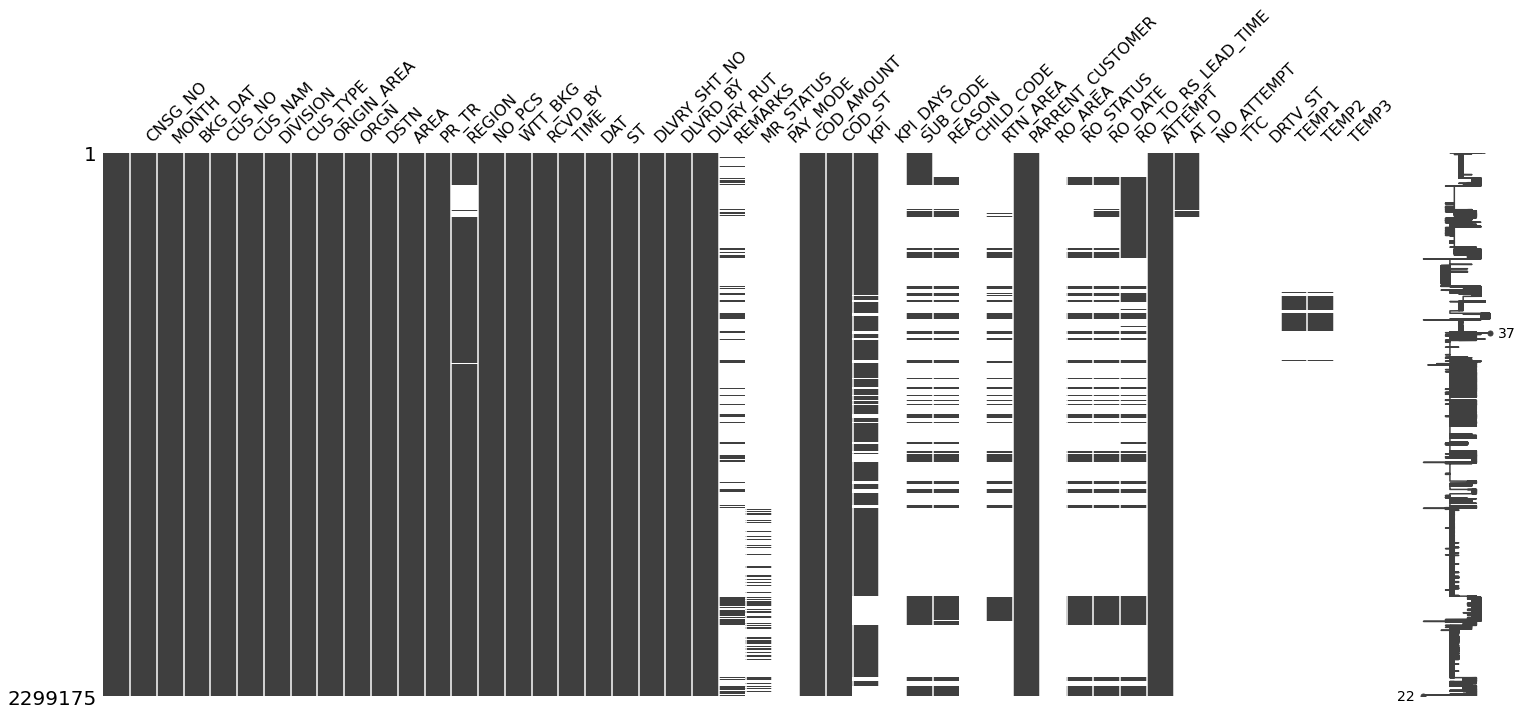

In [137]:
missval(FullData)

The Missing Number Analysis shows that there is a definite relation between the columns "REMARKS", 'SUB_CODE', 'REASON', "RTN_AREA", "RO_STATUS", "RO_DATE", and "RO_TO_RS_LEAD_TIME". Also, the values present in these columns correspond to missing values in the 'KPI' column. 

This useful information can help us fill up the KPI column later. 
Hence, the relationship between all these columns shows a pattern which means that under certain circumstances, columns other than KPI are filled, while KPI is left blank. This shows that the missing values are MNAR (Missing Not at Random). 

The values missing in the REGION column show a relation to the columns mentioned above as well, though the REGION column shows far less missing values than them. Hence, REGION's relationship to those columns can be classified as MAR (Missing At Random). 

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)totalmissingval


<AxesSubplot:>

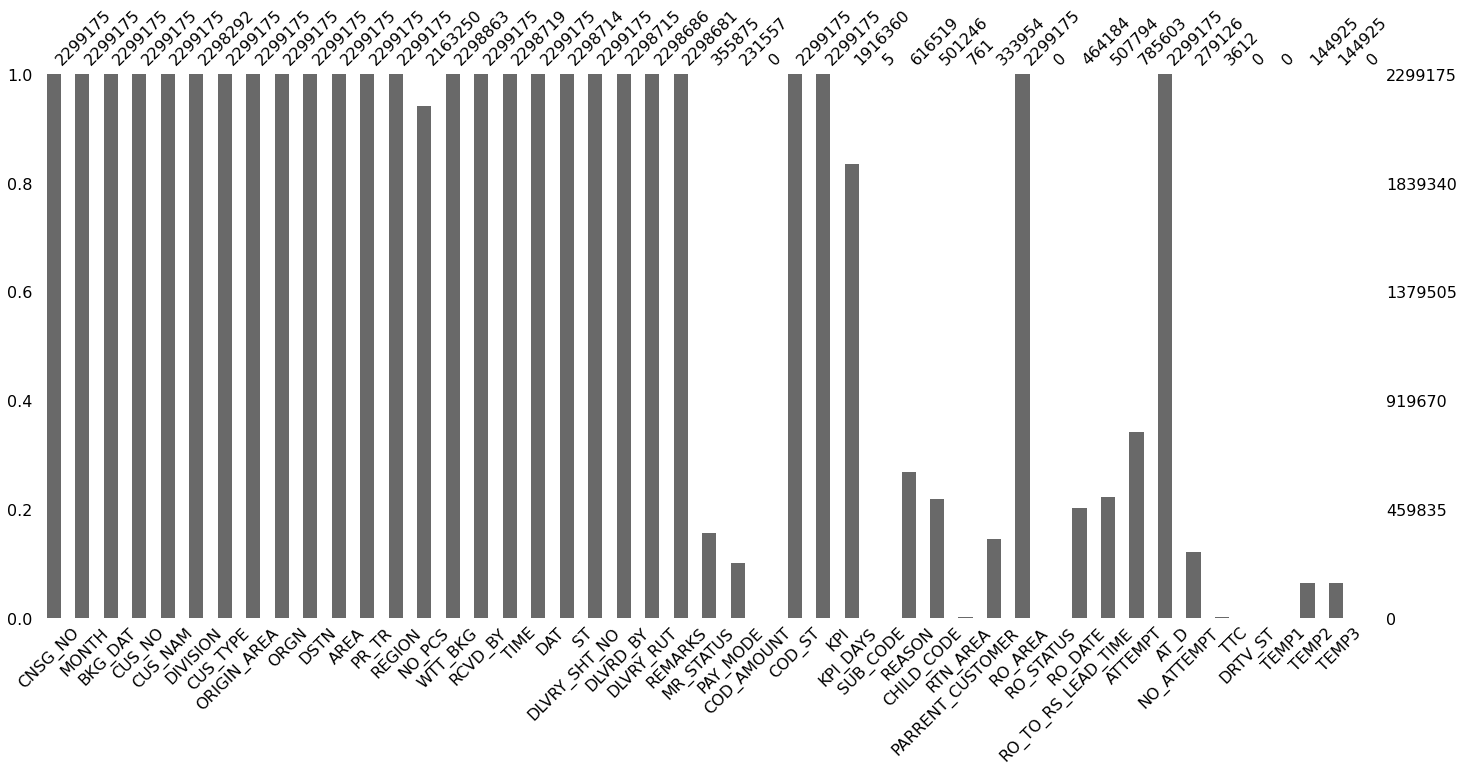

In [139]:
missval(FullData)

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)correlation


<AxesSubplot:>

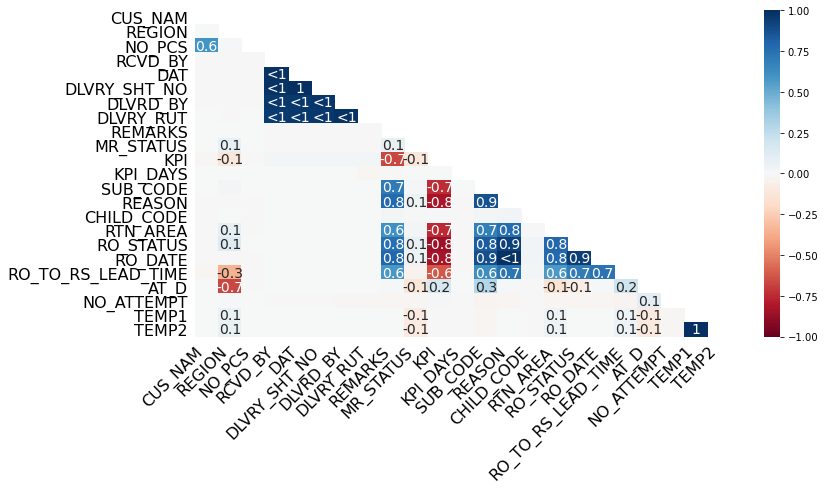

In [140]:
missval(FullData)

The correlation matrix here shows very strong relationships between certain features. 
For instance, with our label: 'RO_STATUS', the columns 'REMARKS', 'SUB_CODE', 'REASON', 'RO_DATE', and 'RTN_AREA' have a very strong relation. 
More or less the same was identified in the missing number analysis above. 

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)dendo


<AxesSubplot:>

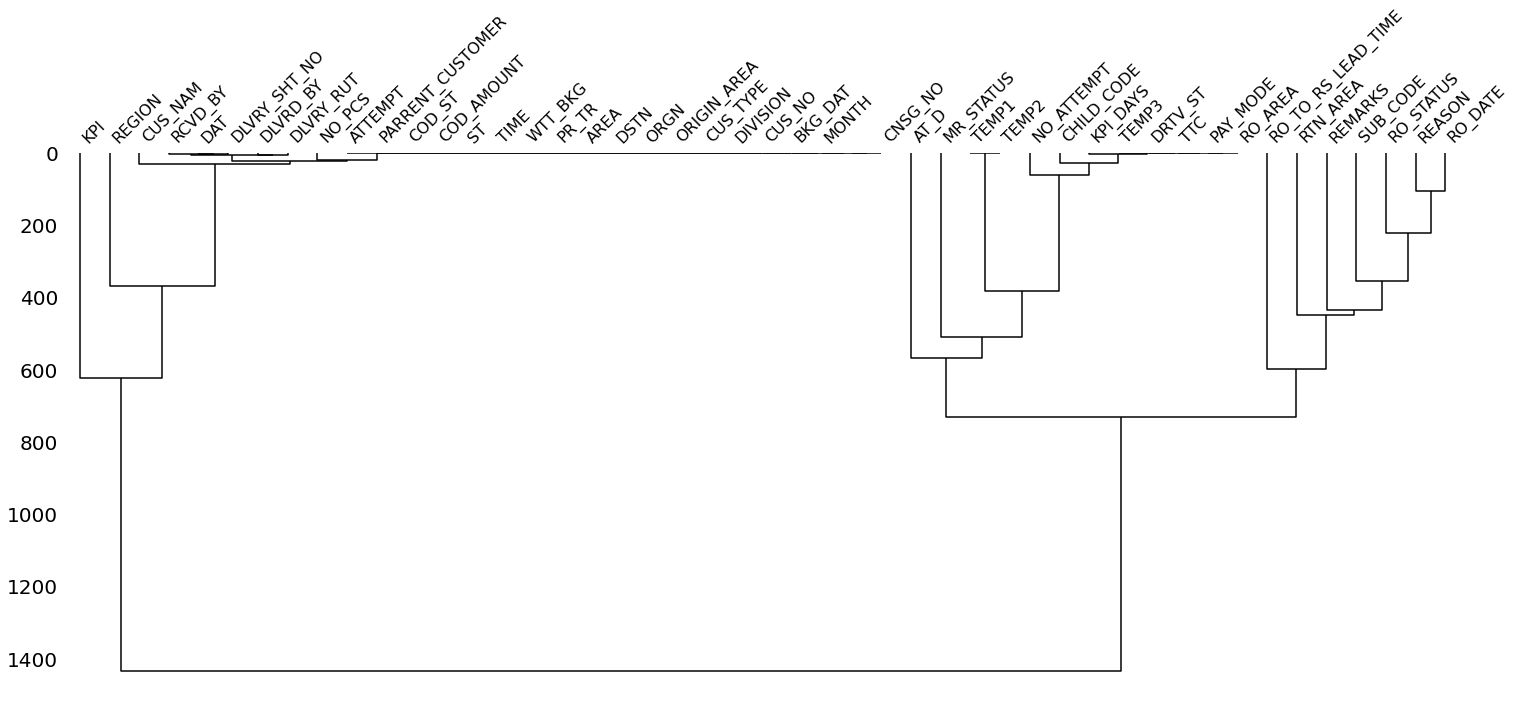

In [141]:
missval(FullData)

We'll begin by working with pre-determined knowledge of dataset obtained from TCS; outlining potentially useless columns to delete. This will help us get rid of useless features which will only hamper our study of the dataset.

In [138]:
#CUS_TYPE, PARRENT_CUSTOMER= 'DARAZ'
#RCVD_BY = random names which don't have anything to do with the shipment or returns
#REMARKS = remarks about the shipment 
#REASON = elaboration of why the shipment wasn't delivered or returned\
#RO_AREA = Blank column
#AT_D = mostly blank column 
#NO_ATTEMPT = no attempt made to deliver package
#TTC=blank column 
#DRTV_ST = Blank Column
#TEMP1, TEMP2, TEMP3 = Unimportant columns as per Business head

In [40]:
FullData[['CUS_TYPE','PARRENT_CUSTOMER']].isnull().sum()
#no null values for both columns

CUS_TYPE            0
PARRENT_CUSTOMER    0
dtype: int64

In [41]:
FullData[['CUS_TYPE','PARRENT_CUSTOMER']].value_counts()
#there is only one customer, which is Daraz

CUS_TYPE  PARRENT_CUSTOMER
DARAZ     DARAZ.PK            2298354
          INTERNAL                441
          DARAZ                   304
          ROCKET                   76
dtype: int64

In [42]:
FullData[['CUS_TYPE','PARRENT_CUSTOMER']].value_counts().sum()
#both columns have full values
#we can delete these columns since the entire dataset represents deliveries for one vendor (DARAZ). 

2299175

In [248]:
remcol(FullData)

which column do you want to remove?
CUS_TYPE
which column do you want to remove?
PARRENT_CUSTOMER
which column do you want to remove?



In [ ]:
#RCVD_BY 
FullData['RCVD_BY'].value_counts()

In [46]:
FullData['RCVD_BY'].value_counts().sum()
#just seems to be filled with a lot of random names

2298719

In [39]:
null(FullData['RCVD_BY']).sum()
#null values are much less than 5%

456

In [249]:
remcol(FullData)
#column deleted

which column do you want to remove?
RCVD_BY
which column do you want to remove?



In [ ]:
#REMARKS
FullData['REMARKS'].value_counts()
#could be valuable later on to find out why certain things were returned specifically.
#Replacing string values with specific codes taken from TCS supplemental data

In [250]:
FullData['REMARKS']=FullData['REMARKS'].replace('Hold in Dead Hold', 'DH')
FullData['REMARKS']=FullData['REMARKS'].replace('Hold in Dead Dox', 'DH')
FullData['REMARKS']=FullData['REMARKS'].replace('Dead Hold', 'DH')
FullData['REMARKS']=FullData['REMARKS'].replace('DEAD HOLD', 'DH')
FullData['REMARKS']=FullData['REMARKS'].replace('OKV Shipments', 'OKV')
FullData['REMARKS']=FullData['REMARKS'].replace('OKV Shipment', 'OKV')
FullData['REMARKS']=FullData['REMARKS'].replace('OKV SHIpments', 'OKV')
FullData['REMARKS']=FullData['REMARKS'].replace('VAC Shipments', 'VAC')
FullData['REMARKS']=FullData['REMARKS'].replace('VAS Shipments', 'VAC')
FullData['REMARKS']=FullData['REMARKS'].replace('3.0', np.NaN)
FullData['REMARKS']=FullData['REMARKS'].replace('3', np.NaN)
FullData['REMARKS']=FullData['REMARKS'].replace('8', np.NaN)
FullData['REMARKS']=FullData['REMARKS'].replace(3.0, np.NaN)
FullData['REMARKS']=FullData['REMARKS'].replace('Only Booked', 'OB')

In [ ]:
remspace(FullData)

In [175]:
FullData['REMARKS'].value_counts()
#column values corrected

VAC    325875
RO      19280
OKV      6966
ABC      2904
DH        523
RS        221
CHK        41
OB         24
OK          2
Name: REMARKS, dtype: int64

In [252]:
print('Number of null values:',FullData['REMARKS'].isnull().sum(), 'This is a large amount of null values.')
print('This column has ',(FullData['REMARKS'].isnull().sum()/len(FullData['REMARKS']))*100, 'percent null values.\nIt may be a useless column in the overall analysis, but it will come in handy when filling values for the RO_STATUS column at the end.')

Number of null values: 1943339 This is a large amount of null values.
This column has  84.52331814672654 percent null values.
It may be a useless column in the overall analysis, but it will come in handy when filling values for the RO_STATUS column at the end.


In [ ]:
#REASON
print(FullData['REASON'].value_counts())
print('\nThis column has a ridiculous amount of different values which may take months to correct for. It is also made redundant by the REMARKS column which specifies why packages were returned.')

In [253]:
print('Number of null values:',FullData['REASON'].isnull().sum())
print('The REASON column has',(FullData['REASON'].isnull().sum()/len(FullData['REASON']))*100, 'percent null values.\nIt seems like it will serve no purpose after all.\nDeleting this column.')

Number of null values: 1797929
The REASON column has 78.19887568366914 percent null values.
It seems like it will serve no purpose after all.
Deleting this column.


In [254]:
remcol(FullData)

which column do you want to remove?
REASON
which column do you want to remove?



In [164]:
#RO_AREA = Blank column
len(FullData['RO_AREA'])-FullData['RO_AREA'].isnull().sum()
#there are no values in the column; deleting

0

In [255]:
remcol(FullData)
#column deleted

which column do you want to remove?
RO_AREA
which column do you want to remove?



In [ ]:
FullData['AT_D'].value_counts()

In [172]:
null(FullData['AT_D'])

2020049

In [256]:
#AT_D = mostly blank column 
print('Total number of null values in the AT_D column are',null(FullData['AT_D']).sum())
print('Total number of non-null values in AT_D column are',len(FullData['AT_D'])-null(FullData['AT_D']).sum())
print('\nThat is',(len(FullData['AT_D'])-null(FullData['AT_D']).sum())*100/(len(FullData['AT_D'])), 'percent of the total values in the column.')
print('Hence, these values are not below the 5% threshold.\n\nThat being said, the column does not have any significant relation to the RO_STATUS or to any other column for that matter.\nValues from it are missing completely at random.\n\nIt can be deleted.')
#not deleting

Total number of null values in the AT_D column are 2020049
Total number of non-null values in AT_D column are 279126

That is 12.140267704720172 percent of the total values in the column.
Hence, these values are not below the 5% threshold.

That being said, the column does not have any significant relation to the RO_STATUS or to any other column for that matter.
Values from it are missing completely at random.

It can be deleted.


In [257]:
remcol(FullData)

which column do you want to remove?
AT_D
which column do you want to remove?



In [57]:
#NO_ATTEMPT = no attempt made to deliver package
print('Total number of null values in the NO_ATTEMPT column are',FullData['NO_ATTEMPT'].isnull().sum())
print('Total number of non-null values in NO_ATTEMPT column are',len(FullData['NO_ATTEMPT'])-FullData['NO_ATTEMPT'].isnull().sum())
print('That is',(len(FullData['NO_ATTEMPT'])-FullData['NO_ATTEMPT'].isnull().sum())*100/(len(FullData['NO_ATTEMPT'])), 'percent of the total values in the column.')
print('This is clearly below the 5% threshold. Also, this column is made redundant by the ATTEMPT column.')
#deleting

Total number of null values in the NO_ATTEMPT column are 2295563
Total number of non-null values in NO_ATTEMPT column are 3612
That is 0.15709982928659194 percent of the total values in the column.
This is clearly below the 5% threshold. Also, this column is made redundant by the ATTEMPT column.


In [258]:
remcol(FullData)

which column do you want to remove?
NO_ATTEMPT
which column do you want to remove?



In [59]:
#TTC=blank column; checking if true
FullData['TTC'].value_counts()

Series([], Name: TTC, dtype: int64)

In [259]:
#It is a blank column; deleting
remcol(FullData)

which column do you want to remove?
TTC
which column do you want to remove?



In [260]:
#DRTV_ST = Blank Column
FullData['DRTV_ST'].value_counts()

Series([], Name: DRTV_ST, dtype: int64)

In [261]:
#It is a blank column; deleting
remcol(FullData)

which column do you want to remove?
DRTV_ST
which column do you want to remove?



In [262]:
#TEMP1, TEMP2, TEMP3 = Unimportant columns as per Business head of TCS; deleting them
remcol(FullData)

which column do you want to remove?
TEMP1
which column do you want to remove?
TEMP2
which column do you want to remove?
TEMP3
which column do you want to remove?



In [65]:
null(FullData)
#looking at further columns which can be deleted
#CNSG_NO, CUS_NAM, and CUS_NO come to mind

                            0
CNSG_NO                     0
MONTH                       0
BKG_DAT                     0
CUS_NO                      0
CUS_NAM                   883
DIVISION                    0
ORIGIN_AREA                 0
ORGN                        0
DSTN                        0
AREA                        0
PR_TR                       0
REGION                 135925
NO_PCS                    312
WTT_BKG                     0
TIME                        0
DAT                       461
ST                          0
DLVRY_SHT_NO              460
DLVRD_BY                  489
DLVRY_RUT                 494
REMARKS               1943300
MR_STATUS             2067618
PAY_MODE              2299175
COD_AMOUNT                  0
COD_ST                      0
KPI                    382815
KPI_DAYS              2299170
SUB_CODE              1682656
REASON                1797929
CHILD_CODE            2298414
RTN_AREA              1965221
RO_STATUS             1834991
RO_DATE   

In [ ]:
FullData['CUS_NAM'].value_counts()
#useless column since the only vendor is Daraz, and the name of the customer doesn't matter; deleting

In [264]:
remcol(FullData)

which column do you want to remove?
CUS_NAM
which column do you want to remove?



In [ ]:
#CUS_NO
#no null values as established by previous analysis
FullData['CUS_NO'].value_counts()

In [265]:
#Replacing blank values in CUS_NO with NA
FullData['CUS_NO']=FullData['CUS_NO'].replace('', np.NaN)
FullData['CUS_NO']=FullData['CUS_NO'].replace(' ', np.NaN)

In [266]:
null(FullData['CUS_NO']).sum()
#No null values in the CUS_NO column

0

In [267]:
print("The CUS_NO column is useless since it does not relate to whether a package was returned or received.\nHence we can delete this column.")
remcol(FullData)

The CUS_NO column is useless since it does not relate to whether a package was returned or received.
Hence we can delete this column.
which column do you want to remove?
CUS_NO
which column do you want to remove?



In [ ]:
print(FullData['CNSG_NO'].value_counts(),'\n\nThe CNSG NO column is also useless since it just shows the count of the consignments sent out.\n\nWe can delete this column.')

In [269]:
remcol(FullData)

which column do you want to remove?
CNSG_NO
which column do you want to remove?



In [ ]:
FullData
#3 further columns deleted

In [ ]:
#Looking at MONTH
FullData['MONTH'].value_counts()
#fixing values in MONTH column. 

In [271]:
#aggregating values
FullData['MONTH']=FullData['MONTH'].replace(['Dec-20'], 'Dec-19')
FullData['MONTH']=FullData['MONTH'].replace(['Nov-20'], 'Nov-19')
FullData['MONTH']=FullData['MONTH'].replace(['Oct-20'], 'Oct-19')
FullData['MONTH']=FullData['MONTH'].replace(['Jan-00'], 'Jan-19')
FullData['MONTH']=FullData['MONTH'].replace(['Aug-20'], 'Aug-19')
FullData['MONTH']=FullData['MONTH'].replace(['Sep-20'], 'Sep-19')
FullData['MONTH']=FullData['MONTH'].replace(['Jul-20'], 'Jul-19')
FullData['MONTH']=FullData['MONTH'].replace(['Jun-20'], 'Jun-19')
FullData['MONTH']=FullData['MONTH'].replace(['19-Mar'], 'Mar-19')
FullData['MONTH']=FullData['MONTH'].replace(['19-Jan'], 'Jan-19')
FullData['MONTH']=FullData['MONTH'].replace(['19-Feb'], 'Feb-19')

In [ ]:
FullData['MONTH'].value_counts()

In [ ]:
remspace(FullData)

The MONTH column is not conforming to the datetime format. This could cause problems later on. There is another column, 'BKG_DAT' which shows us the booking date for the package. We can extract a new MONTH column from that column.

In [ ]:
FullData[['MONTH','BKG_DAT']]

In [196]:
null(FullData['BKG_DAT'])

0

In [274]:
remspace(FullData)

Which column do you want to remove white space in?
BKG_DAT
where do you want to remove the whitespace from?


,,MONTH,BKG_DAT,DIVISION,ORIGIN_AREA,ORGN,DSTN,AREA,PR_TR,REGION,...,COD_ST,KPI,KPI_DAYS,SUB_CODE,CHILD_CODE,RTN_AREA,RO_STATUS,RO_DATE,RO_TO_RS_LEAD_TIME,ATTEMPT
0,1,Jan-19,1/1/2019,OLE,KHI,KHI,LYY,MUX,Allied,Central,...,COD,After 7,NaN,Not Used,NaN,NaN,RO,1/7/2019,3,After 7
1,2,Jan-19,1/1/2019,OLE,KHI,KHI,GUJ,GUJ,Proper,North,...,COD,After 7,NaN,RD,Quality Issue,NaN,RO,1/10/2019,5,After 7
2,3,Jan-19,1/1/2019,OLE,KHI,KHI,KHI,KHI,Proper,South,...,COD,2,NaN,BA,NaN,NaN,BA,1/2/2019,1,2
3,4,Jan-19,1/1/2019,OLE,KHI,KHI,GUJ,GUJ,Proper,North,...,COD,After 7,NaN,Not Used,NaN,NaN,RO,1/9/2019,4,After 7
4,5,Jan-19,1/1/2019,EXPRESS,LHE,LHE,MHR,SKZ,Allied,South,...,COD,NaN,NaN,SW,NaN,NaN,NaN,NaN,NaN,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316624,316625,Dec-19,12/24/2019,EXPRESS,LHE,LHE,GDN,ISB,Allied,North,...,COD,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
316625,316626,Dec-19,12/30/2019,EXPRESS,RWP,ISB,HRI,ISB,Allied,North,...,COD,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
316626,316627,Dec-19,12/30/2019,EXPRESS,RWP,ISB,HRI,ISB,Allied,North,...,COD,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
316627,316628,Dec-19,12/30/2019,EXPRESS,RWP,ISB,HRI,ISB,Allied,North,...,COD,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [201]:
len(FullData['BKG_DAT'])-FullData['BKG_DAT'].value_counts().sum()
#no blank values

0

In [200]:
print('The BGK_DAT column has no null values or any blank spaces.\n\nIt can easily be the base for the MONTH column.\n\nHowever, we do need to alter its datatype first, which is string right now.')

The BGK_DAT column has no null values or any blank spaces.

It can easily be the base for the MONTH column.

However, we do need to alter its datatype first, which is string right now.


In [ ]:
FullData['BKG_DAT']

In [ ]:
changedtype(FullData)

In [ ]:
FullData['BKG_DAT']
#column converted to datetime type and cleaned

In [279]:
#deleting MONTH column since it's not needed anymore
remcol(FullData)

which column do you want to remove?
MONTH
which column do you want to remove?



In [ ]:
FullData.head()

In [ ]:
null(FullData)

In [206]:
null(FullData['NO_PCS'])
#some null values here we can delete easily

312

In [280]:
FullData=FullData[FullData['NO_PCS'].notna()]

In [ ]:
FullData['NO_PCS'].value_counts()

Certain values in the 'NO_PCS' column seem to be below 1. 

That's not possible since things can't be shipped in packages less than 1.

Knowledge from TCS says that this is due to inaccurate data feeding. 

Deleting these values is an option, but let's see just how many of these values need to be corrected first. 

In [ ]:
cat_analysis(FullData)

The categorical analysis of the NO_PCS column shows that there are definitely outliers in the data. 

Investigating further.

In [ ]:
(FullData[FullData['NO_PCS']<1]).value_counts

There are 41625 rows of the NO_PCS column which have values less than 1. These can be corrected to 1. 

These constitute less than 2% of the total rows in the dataset. We could delete them, but correcting them is a better option. 

In [282]:
#getting index values of all NO_PCS values less than 1. 
low1index=(FullData[FullData['NO_PCS']<1]).index

In [283]:
#Replacing all values in NO_PCS column lesser than 1 with '1'
FullData.loc[low1index, 'NO_PCS']=1

In [ ]:
FullData[FullData['NO_PCS']<1]

No values of less than 1 left in the NO_PCS column any more. 

In [222]:
null(FullData['NO_PCS'])

0

Now let's look at the values that are outliers based on box plot.

<AxesSubplot:>

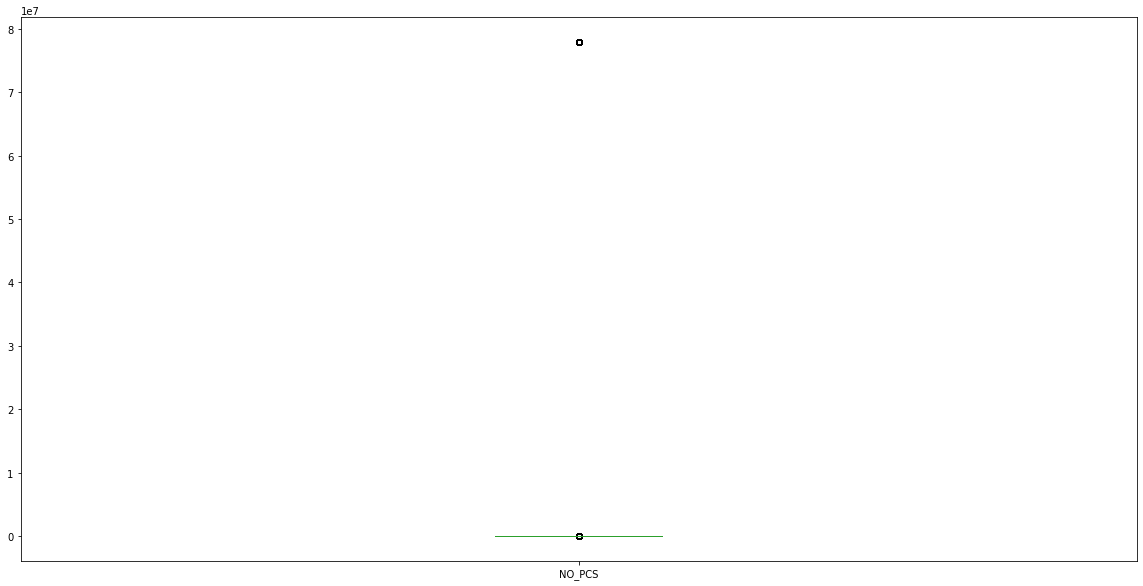

In [285]:
FullData['NO_PCS'].plot.box()

This plot shows that there are a lot of outliers still. 

In [329]:
#renaming dataset
FullData1=FullData

In [287]:
max(FullData['NO_PCS'])

77920177.0

In [288]:
#Checking rows for this value of NO_PCS

In [ ]:
FullData1[FullData1['NO_PCS']==77920177.0]
#just 92 rows

While definitely an outlier value, it's occurrence is much lower than 1% of the dataset values, hence we can ignore this. 

Catering to other outliers. 

The lowest frequency among the highest value counts of the NO_PCS column is 1.50. Let's check how many values are above that range. 

In [ ]:
FullData1[FullData1['NO_PCS']>1.50]
#27706 rows of data with values in NO_PCS column greater than 1.50.

In [297]:
print('Outliers greater than 1.50 constitute', (27706*100)/(len(FullData1['NO_PCS'])), 'percent of the values in the dataset.\nHence they will have very minimal effect on the analysis of the dataset.')

Outliers greater than 1.50 constitute 1.205204485869754 percent of the values in the dataset.
Hence they will have very minimal effect on the analysis of the dataset.


NO_PCS column cleaned.

In [ ]:
null(FullData1)

In [76]:
#Taking care of columns with very small number of null values (much less than 5% of the dataset)
#DAT, DLVRD_BY, DLVRY_SHT_NO, DLVRY_RUT

In [330]:
#removing null value rows for the above four columns
FullData1=FullData1.dropna(subset=['DAT', 'DLVRD_BY', 'DLVRY_SHT_NO', 'DLVRY_RUT'])

In [ ]:
null(FullData1)
#Null values from four columns deleted

In [331]:
#Analyzing further blank/mostly blank columns
#MR_STATUS = mostly blank column which relates to misrouting status. This has some useful information about 
#misrouted packages. 
#PAY_MODE = blank column
#KPI_DAYS = blank column and redundant due to the presence of KPI column. 
#CHILD_CODE = blank column
#RTN_AREA, #RO_STATUS, #RO_TO_RS_LEAD_TIME = while these columns are mostly blank, they can help in finer analysis 
#later.

In [ ]:
FullData1['MR_STATUS'].value_counts()

In [300]:
#Checking PAY_MODE
len(FullData1['PAY_MODE'])-null(FullData1['PAY_MODE'])
#completely blank column; deleting

0

In [333]:
remcol(FullData1)
#column removed

which column do you want to remove?
PAY_MODE
which column do you want to remove?



In [334]:
#Checking KPI_DAYS
len(FullData1['KPI_DAYS'])-null(FullData1['KPI_DAYS'])
#nearly blank column, and redundant; deleting

4

In [335]:
remcol(FullData1)

which column do you want to remove?
KPI_DAYS
which column do you want to remove?



In [303]:
#Checking CHILD_CODE
len(FullData1['CHILD_CODE'])-null(FullData1['CHILD_CODE'])
#nearly blank column
#deleting column

760

In [336]:
remcol(FullData1)

which column do you want to remove?
CHILD_CODE
which column do you want to remove?



In [ ]:
#3 more columns deleted
FullData1

In [ ]:
null(FullData1)

In [ ]:
#Inspecting REGION column
FullData1['REGION'].value_counts()

In [87]:
print('Total number of null values in the REGION column are',null(FullData1['REGION']).sum())
print('Total number of non-null values in REGION column are',len(FullData1['REGION'])-null(FullData1['REGION']).sum())
print('That is',(len(FullData1['AT_D'])-null(FullData1['REGION']).sum())*100/(len(FullData1['REGION'])), 'percent of the total values in the column.')
print('Hence, these values are not below the 5% threshold, and thus too big to ignore.')
print('However, the region column is also redundant, since more elaborate details are included in the ORIGIN_AREA column.')
#deleting

Total number of null values in the REGION column are 135836
Total number of non-null values in REGION column are 2162526
That is 94.0898779217547 percent of the total values in the column.
Hence, these values are not below the 5% threshold, and thus too big to ignore.
However, the region column is also redundant, since more elaborate details are included in the ORIGIN_AREA column.


Looking at ORIGIN_AREA column to make sure it can act as a suitable alternative to the REGION column. Checking for blank and null values, junk values, etc. 

In [ ]:
FullData1['ORIGIN_AREA'].value_counts()

In [ ]:
remspace(FullData1)

In [309]:
null(FullData1['ORIGIN_AREA'])

0

The ORIGIN_AREA column has discrete values in large numbers which make it a suitable column for classification and analysis. So, we can easily delete the REGION column since it has been proven to be less detailed and redundant. 

In [338]:
remcol(FullData1)
#column deleted

which column do you want to remove?
REGION
which column do you want to remove?



## Exploring Further Columns

In [ ]:
#AREA: This column has values for cities where sorting facilities of TCS exist. These sorting facilities receive 
#shipments from different regions of the country and then send them to their final destinations. 
FullData1['AREA'].value_counts()

In [ ]:
#This column has codes for all cities and towns in Pakistan where the packages are shipped to their final destinations.
FullData1['DSTN'].value_counts()

In [314]:
print(FullData1['DSTN'].drop_duplicates().count())
#There are no duplicate values here. 

446


##### WRANGLING LABEL COLUMN

In [ ]:
#Examining RO_STATUS column. This is our label column. 
FullData1['RO_STATUS'].value_counts()

In [339]:
#Consolidating RO_STATUS values from TCS supplemental materials
FullData1['RO_STATUS']=FullData1['RO_STATUS'].replace('XBA', 'BA')
FullData1['RO_STATUS']=FullData1['RO_STATUS'].replace('XCA', 'CA')
FullData1['RO_STATUS']=FullData1['RO_STATUS'].replace('XBA', 'BA')
FullData1['RO_STATUS']=FullData1['RO_STATUS'].replace('bkg', 'BKG')
FullData1['RO_STATUS']=FullData1['RO_STATUS'].replace('FOK', np.NaN)
FullData1['RO_STATUS']=FullData1['RO_STATUS'].replace('bkg', 'BKG')

In [ ]:
#exploring these values further
FullData1['RO_STATUS'].value_counts()

In [341]:
null(FullData1['RO_STATUS'])

1834232

Supplemental Materials provided by TCS sort the codes in the RO_STATUS column into four larger categories:

Delivered (D)
Undelivered (U) 
Returned (R)
In Process (IP)

Hence, we can create a new column of derived values called 'Delivered' from these codes which features just these four values. 

In [342]:
FullData1.loc[FullData1['RO_STATUS']==np.NaN,'Delivered']='D'
FullData1.loc[FullData1['RO_STATUS']=='OK','Delivered']='D'

FullData1.loc[FullData1['RO_STATUS']=='DH','Delivered']='R'
FullData1.loc[FullData1['RO_STATUS']=='DS','Delivered']='R'
FullData1.loc[FullData1['RO_STATUS']=='RS','Delivered']='R'
FullData1.loc[FullData1['RO_STATUS']=='VAC','Delivered']='R'

FullData1.loc[FullData1['RO_STATUS']=='FRD','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='FRO','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='OKV','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RA','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RD','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RDA','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RDV','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RO','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RR','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RV','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='VOK','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='VRD','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='VRS','Delivered']='U'

FullData1.loc[FullData1['RO_STATUS']=='GT','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='BKG','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='99','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='AT','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='BA','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='CA','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='CN','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='CS','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='DM','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='FGO','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='HC','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='HP','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='HO','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='IA','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='IH','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='IT','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='MR','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='NF','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='NP','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='NS','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='OH','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='SC','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='SR','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='UL','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='WR','Delivered']='IP'

In [ ]:
FullData1['Delivered'].value_counts()

In [343]:
null(FullData1['Delivered'])

1834286

Here we can bring back the various columns that were related to RO_STATUS to fill in as many blank values in the Delivered column as possible. 

'REMARKS', 'SUB_CODE', 'REASON', 'RO_DATE', and 'RTN_AREA' 

Out of these column, the "SUB_CODE" columns serves our purpose here. 

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)missingval


<AxesSubplot:>

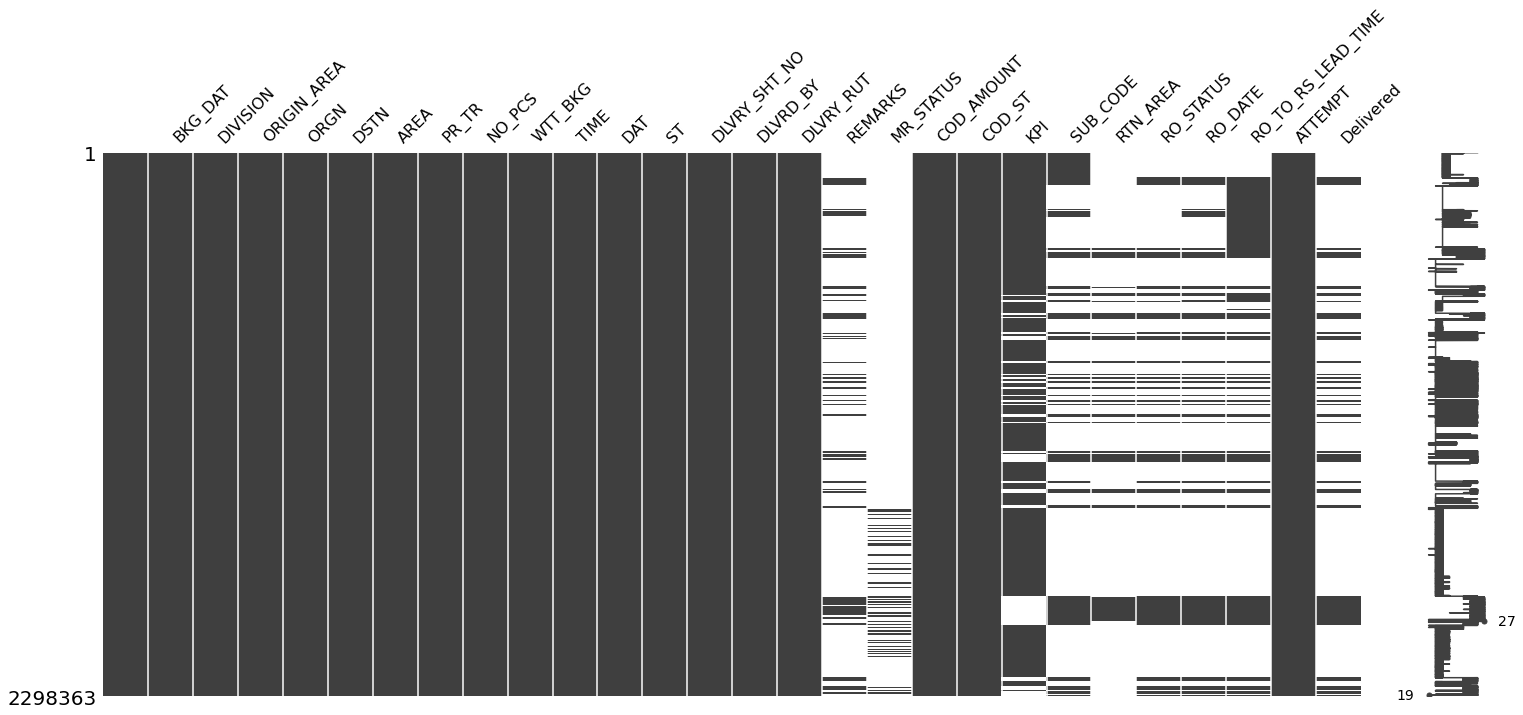

In [323]:
missval(FullData1)

The SUB_CODE column shows a very strong relationship with the RO_STATUS and derived Delivered column even in the partially wrangled dataset. 

In [ ]:
FullData1['SUB_CODE'].value_counts()

In [345]:
#First we need to fix the values in the SUB_CODE column using TCS supplemental material
FullData1['SUB_CODE']=FullData1['SUB_CODE'].replace('Not Used', 'U')
FullData1['SUB_CODE']=FullData1['SUB_CODE'].replace('XCA', 'C')
FullData1['SUB_CODE']=FullData1['SUB_CODE'].replace('XBA', 'BA')
FullData1['SUB_CODE']=FullData1['SUB_CODE'].replace('NOT USED', 'U')
FullData1['SUB_CODE']=FullData1['SUB_CODE'].replace('XRD', 'RD')

In [ ]:
FullData1['SUB_CODE'].value_counts()

Let's now insert corresponding derived values from the SUB_CODE column into the Delivered column. 

However, we have to make sure that we don't replace values which are already present in the Delivered Column. They are derived from the RO_STATUS column which is the final authority on the status of the package. 

Hence, after replacing values derived from the SUB_CODE column, we should again replace values derived from the 'RO_STATUS' column to fix any overlaps. 

In [347]:
FullData1.loc[FullData1['SUB_CODE']=='OK','Delivered']='D'

FullData1.loc[FullData1['SUB_CODE']=='DH','Delivered']='R'
FullData1.loc[FullData1['SUB_CODE']=='DS','Delivered']='R'
FullData1.loc[FullData1['SUB_CODE']=='RS','Delivered']='R'
FullData1.loc[FullData1['SUB_CODE']=='VAC','Delivered']='R'

FullData1.loc[FullData1['SUB_CODE']=='FRD','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='FRO','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='OKV','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RA','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RD','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RDA','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RDV','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RO','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RR','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RV','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='VOK','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='VRD','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='VRS','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='U','Delivered']='U'

FullData1.loc[FullData1['SUB_CODE']=='GT','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='BKG','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='99','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='AT','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='BA','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='CA','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='CN','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='CS','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='DM','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='FGO','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='HC','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='HP','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='HO','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='IA','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='IH','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='IT','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='MR','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='NF','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='NP','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='NS','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='OH','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='SC','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='SR','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='UL','Delivered']='IP'
FullData1.loc[FullData1['SUB_CODE']=='WR','Delivered']='IP'

In [348]:
FullData1.loc[FullData1['RO_STATUS']==np.NaN,'Delivered']='D'
FullData1.loc[FullData1['RO_STATUS']=='OK','Delivered']='D'

FullData1.loc[FullData1['RO_STATUS']=='DH','Delivered']='R'
FullData1.loc[FullData1['RO_STATUS']=='DS','Delivered']='R'
FullData1.loc[FullData1['RO_STATUS']=='RS','Delivered']='R'
FullData1.loc[FullData1['RO_STATUS']=='VAC','Delivered']='R'

FullData1.loc[FullData1['RO_STATUS']=='FRD','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='FRO','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='OKV','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RA','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RD','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RDA','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RDV','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RO','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RR','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RV','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='VOK','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='VRD','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='VRS','Delivered']='U'

FullData1.loc[FullData1['RO_STATUS']=='GT','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='BKG','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='99','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='AT','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='BA','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='CA','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='CN','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='CS','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='DM','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='FGO','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='HC','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='HP','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='HO','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='IA','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='IH','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='IT','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='MR','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='NF','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='NP','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='NS','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='OH','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='SC','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='SR','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='UL','Delivered']='IP'
FullData1.loc[FullData1['RO_STATUS']=='WR','Delivered']='IP'

Let's now examine the Delivered column.

In [ ]:
FullData1['Delivered'].value_counts()

In [350]:
null(FullData1['Delivered'])

1682270

There were previously 1834286 null values in the Delivered column. Now there are 1682270. 

This means the SUB_CODE column helped us fill 
1834286-1682270 = 152016 values! 

That's nearly 6.5% of the total values in the dataset. This was an important step!

In [ ]:
#Looking at ST Column
FullData1['ST'].value_counts()

In [ ]:
remspace(FullData1)

In [358]:
null(FullData1['ST'])

0

The 'ST' column contains information about the Shipment status of a package. Since it has no null values, we can use it, as well as information from TCS' supplemental materials to fill in the null values for the Delivery column. We can get rid of most null values this way. 

In [359]:
FullData1.loc[FullData1['ST']=='OK','Delivered']='D'
FullData1.loc[FullData1['ST']=='RS','Delivered']='R'
FullData1.loc[FullData1['ST']=='DH','Delivered']='R'
FullData1.loc[FullData1['ST']=='SW','Delivered']='IP'
FullData1.loc[FullData1['ST']=='LS','Delivered']='IP'

Examining Delivered column again.

In [361]:
null(FullData1['Delivered'])

0

In [360]:
FullData1['Delivered'].value_counts()

D     1787866
R      510242
IP        255
Name: Delivered, dtype: int64

Here we can see that though there are no more null values in the Delivered column, ST column wiped out the Undelivered (U) values in the Delivered column completely. 

That's not a good sign. 

The supplemental materials obtained from TCS show that Undelivered (U) parcels are all either lost, returned to the vendor, or in limbo. 

We should bring back these values by deriving them again from the SUB_CODE and RO_STATUS columns. 

In [362]:
FullData1.loc[FullData1['RO_STATUS']=='FRD','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='FRO','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='OKV','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RA','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RD','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RDA','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RDV','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RO','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RR','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='RV','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='VOK','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='VRD','Delivered']='U'
FullData1.loc[FullData1['RO_STATUS']=='VRS','Delivered']='U'

FullData1.loc[FullData1['SUB_CODE']=='FRD','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='FRO','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='OKV','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RA','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RD','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RDA','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RDV','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RO','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RR','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='RV','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='VOK','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='VRD','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='VRS','Delivered']='U'
FullData1.loc[FullData1['SUB_CODE']=='U','Delivered']='U'

In [363]:
null(FullData1['Delivered'])

0

In [364]:
FullData1['Delivered'].value_counts()

D     1787836
U      473629
R       36643
IP        255
Name: Delivered, dtype: int64

In [ ]:
changedtype(FullData1)

In [370]:
FullData1['Delivered'].value_counts()

D     1787836
U      473629
R       36643
IP        255
Name: Delivered, dtype: int64

We finally have a completely cleaned label column. 

Hence, we can delete the RO_STATUS, SUB_CODE, and ST columns.

In [366]:
remcol(FullData1)

which column do you want to remove?
ST
which column do you want to remove?
SUB_CODE
which column do you want to remove?
RO_STATUS
which column do you want to remove?



In [ ]:
FullData1

In [ ]:
null(FullData1)

In [ ]:
#KPI
FullData1['KPI']
#String values in the data will hamper analysis. 
#Also, 'After 7' here means that it took more than 7 days to deliver the 
#package. These are outlier values as defined by knowledge gained from 
#TCS business contact.
#Since we can't assess an accurate number to replace every instance of 
#this value, we can delete all its occurrences, provided its frequency
#is not higher than 5% of the dataset. 

In [ ]:
FullData1[FullData1['KPI']=='After 7']

In [391]:
print('After 7 numbers approximately',(len(FullData1[FullData1['KPI']=='After 7'])*100)/(len(FullData1)), '% of the values in the KPI column.')

After 7 numbers approximately 3.919093720182582 % of the values in the KPI column.


Deleting the 'After 7' values in the KPI column. 

In [396]:
FullData1=remrow(FullData1)

which column values do you want to remove?
KPI
which row/s do you want to remove?
After 7
which column values do you want to remove?



In [ ]:
FullData1['KPI'].value_counts()

In [400]:
null(FullData1['KPI'])

382353

In [401]:
#investigating null values of KPI
nullkpi=FullData1[FullData1['KPI'].isnull()]

In [403]:
nullkpi['Delivered'].value_counts()
#healthy mix of values in Delivered where the KPI value is null.

U     367660
R      14468
IP       225
Name: Delivered, dtype: int64

Creating a new column named 'DeliveredNum' to derive numerical representations for the values in the 'Delivered' column. This way, analysis can be made easier. 

In [405]:
DeliveredNum = []
FullData1.loc[FullData1['Delivered']=='U','DeliveredNum']='2'
FullData1.loc[FullData1['Delivered']=='D','DeliveredNum']='1'
FullData1.loc[FullData1['Delivered']=='R','DeliveredNum']='0'
FullData1.loc[FullData1['Delivered']=='IP','DeliveredNum']='3'

In [ ]:
changedtype(FullData1)
#coming back to this later*

In [407]:
#Making copy of dataset
FullDatanew = deepcopy(FullData1)

In [ ]:
FullDatanew

Doing missing value analysis again to see current relationship between columns.

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)dendo


<AxesSubplot:>

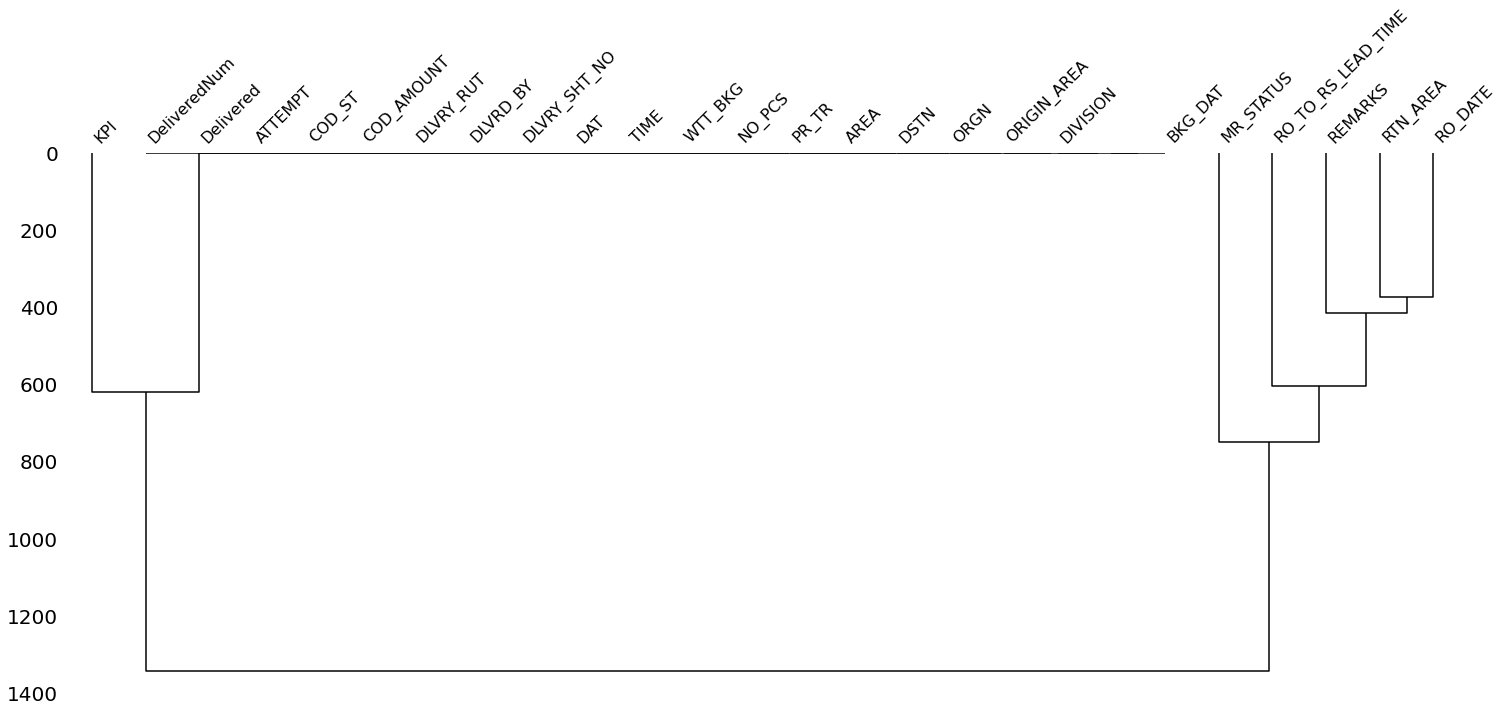

In [409]:
missval(FullDatanew)

We can remove some further columns based on our progress so far.

1. Using SUB_CODE, ST, and RO_STATUS, we derived a new column called 'Delivery'. Hence we don't need the REMARKS column any more. 
2. We can take another look at the MR_STATUS column to see if it serves any further purpose, though it's probable that it can now be deleted. 

In [ ]:
FullDatanew['MR_STATUS'].value_counts()

The random number values as well as the recurrent string values 'AC' and 'CGA' don't represent anything of value. 

They are also not present in any of the supplemental materials given to me by TCS. Hence, the MR_STATUS column can be deleted. 

In [413]:
#removing columns
#MR_STATUS, REMARKS
remcol(FullDatanew)

which column do you want to remove?
MR_STATUS
which column do you want to remove?
REMARKS
which column do you want to remove?



In [ ]:
FullDatanew

In [ ]:
null(FullDatanew)

#### Wrangling Seemingly Filled Columns for Better Analysis

In [418]:
#Looking at COD_ST
FullDatanew['COD_ST'].value_counts()

COD        1754988
PREPAID     453300
Name: COD_ST, dtype: int64

In [419]:
#Since the data in the column is binary, it makes sense to give it 
#numerical value. 
FullDatanew['COD_ST']=FullDatanew['COD_ST'].replace('COD', 1)
FullDatanew['COD_ST']=FullDatanew['COD_ST'].replace('PREPAID', 0)

In [420]:
#Looking at WTT_BKG
null(FullDatanew['WTT_BKG'])

0

In [ ]:
remspace(FullDatanew)
#No white space in the WTT_BKG column.

In [423]:
FullDatanew['WTT_BKG'].value_counts()
#Nothing to clean here

0.50      1266508
1.00       354176
12.00       86210
2.00        71187
1.50        70939
           ...   
70.50           1
9.65            1
1.74            1
353.00          1
387.00          1
Name: WTT_BKG, Length: 1532, dtype: int64

In [ ]:
#Looking at ATTEMPT
FullDatanew['ATTEMPT'].value_counts()
#some string values here that need cleaning.

The 'After 7' values in the 'ATTEMPT' column are outliers. They identify packages which have taken more than 7 attempts to deliver after being rejected or returned, etc. 

The occurence of 'After 7' values in the column is less than 1% of the values in the column. Hence, they can be deleted. 

In [425]:
FullDatanew=remrow(FullDatanew)

which column values do you want to remove?
ATTEMPT
which row/s do you want to remove?
After 7
which column values do you want to remove?



Now we can clean the ATTEMPT column by replacing string values. 

In [426]:
FullDatanew['ATTEMPT']=FullDatanew['ATTEMPT'].replace('SW', 0) #SW means void (shipment not handed to TCS for delivery)
FullDatanew['ATTEMPT']=FullDatanew['ATTEMPT'].replace('LS', 0) #LS means shipment lost
FullDatanew['ATTEMPT']=FullDatanew['ATTEMPT'].replace('Void', 0) #same as SW
FullDatanew['ATTEMPT']=FullDatanew['ATTEMPT'].replace('Un-Attempt', 0)

In [ ]:
FullDatanew['ATTEMPT'].value_counts()
#Seems like there are disparities in like values. This means there is empty
#space in the column. 

In [ ]:
remspace(FullDatanew)

In [429]:
FullDatanew['ATTEMPT'].value_counts()

1     908915
2     471326
3     227297
4     110186
5      49433
6      22127
0      10235
7      10079
14         5
15         3
19         3
24         2
18         1
40         1
11         1
12         1
22         1
23         1
13         1
35         1
36         1
10         1
16         1
17         1
44         1
Name: ATTEMPT, dtype: int64

In [430]:
#Checking for null values in ATTEMPT column now that empty space has been 
#removed.
null(FullDatanew['ATTEMPT'])
#This is strange. This means there were blank values in the ATTEMPT column 
#and the remspace command removed them. 
#Filling these values with 0 since blank values mean no attempts. 

390284

In [431]:
FullDatanew['ATTEMPT']=FullDatanew['ATTEMPT'].replace(np.NaN, 0)

In [432]:
null(FullDatanew['ATTEMPT'])

0

In [ ]:
changedtype(FullDatanew)

In [499]:
#TCS Knowledge says that more than ATTEMPT>7 are outliers or mistakes. 
#Purging them. 
FullData7=FullDatanew[FullDatanew['ATTEMPT']<=7]

In [ ]:
FullData7

In [501]:
#RO_TO_RS_LEAD_TIME
null(FullData7['RO_TO_RS_LEAD_TIME'])
#Null values in this column mean that there was no attempt made to return the packages. 

1480660

In [502]:
FullData7['RO_TO_RS_LEAD_TIME']=FullData7['RO_TO_RS_LEAD_TIME'].replace(np.NaN, 0)

In [ ]:
remspace(FullData7)

In [504]:
null(FullData7['RO_TO_RS_LEAD_TIME'])
#Lots of null values in RO_TO_RS_LEAD_TIME that were masked by empty space.

1480696

In [497]:
FullData7['RO_TO_RS_LEAD_TIME'].value_counts()
#taking care of string values 'After7', and '-16'

After7    297092
3         122718
2         118606
4          66827
1          49855
5          31863
6          18474
7           9652
0           4059
43617         25
43619          7
43643          2
43645          2
27             1
43648          1
-16            1
43642          1
Name: RO_TO_RS_LEAD_TIME, dtype: int64

In [505]:
FullData7=remrow(FullData7)

which column values do you want to remove?
RO_TO_RS_LEAD_TIME
which row/s do you want to remove?
After7
which column values do you want to remove?
RO_TO_RS_LEAD_TIME
which row/s do you want to remove?
-16
which column values do you want to remove?



In [506]:
FullData7['RO_TO_RS_LEAD_TIME'].value_counts()
#After7 hasn't removed itself yet. Its frequency is greater than 5% of the 
#total values in the column. It will definitely skew the dataset. 
#Hence we have to get rid of it. 

After7    297092
3         122718
2         118606
4          66827
1          49855
5          31863
6          18474
7           9652
0           4059
43617         25
43619          7
43645          2
43643          2
43648          1
27             1
43642          1
Name: RO_TO_RS_LEAD_TIME, dtype: int64

In [507]:
FullData7=FullData7[FullData7['RO_TO_RS_LEAD_TIME']!='After7']

In [508]:
FullData7['RO_TO_RS_LEAD_TIME'].value_counts()
#Significant outlier value removed

3        122718
2        118606
4         66827
1         49855
5         31863
6         18474
7          9652
0          4059
43617        25
43619         7
43645         2
43643         2
43648         1
27            1
43642         1
Name: RO_TO_RS_LEAD_TIME, dtype: int64

In [ ]:
FullData7

In [ ]:
changedtype(FullData7)

which column do you want to analyze? Press enter if you want to analyze the entire dataset.RO_TO_RS_LEAD_TIME


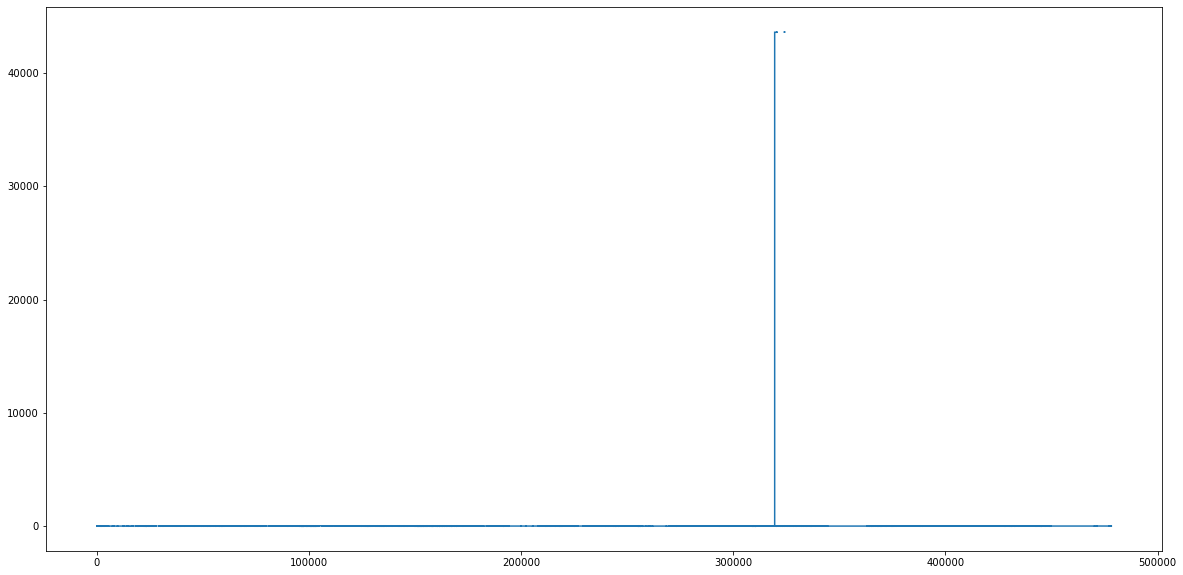

count    422093.000000
mean          6.912939
std         413.851003
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max       43648.000000
Name: RO_TO_RS_LEAD_TIME, dtype: float64
what type of fit do you want the qqplot to be? (None, 45, s, r, or q)
45


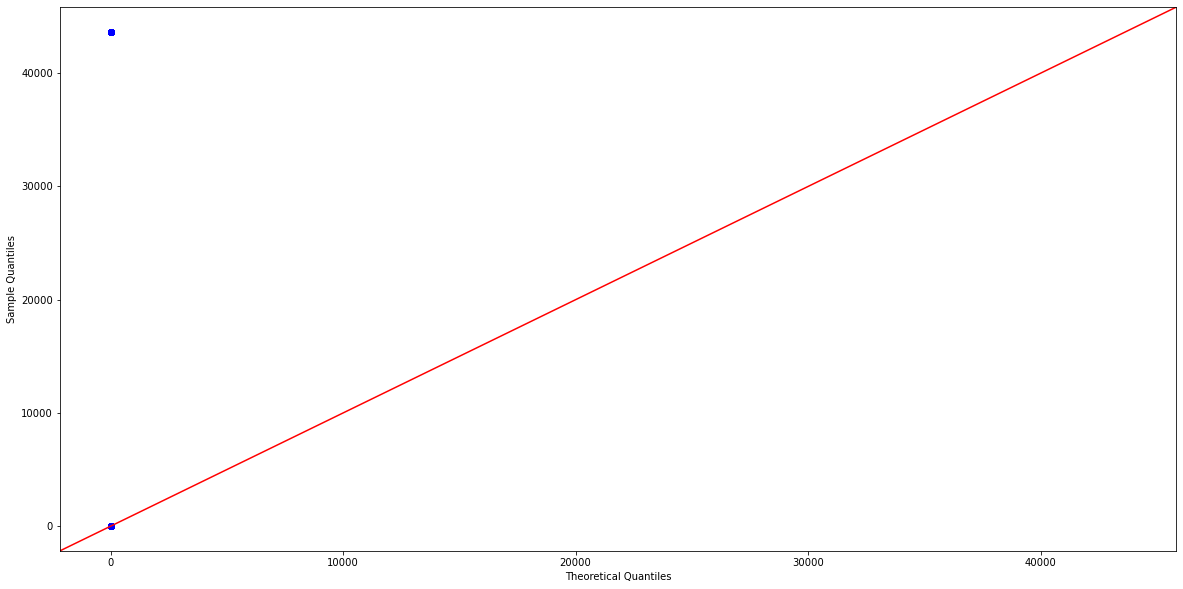

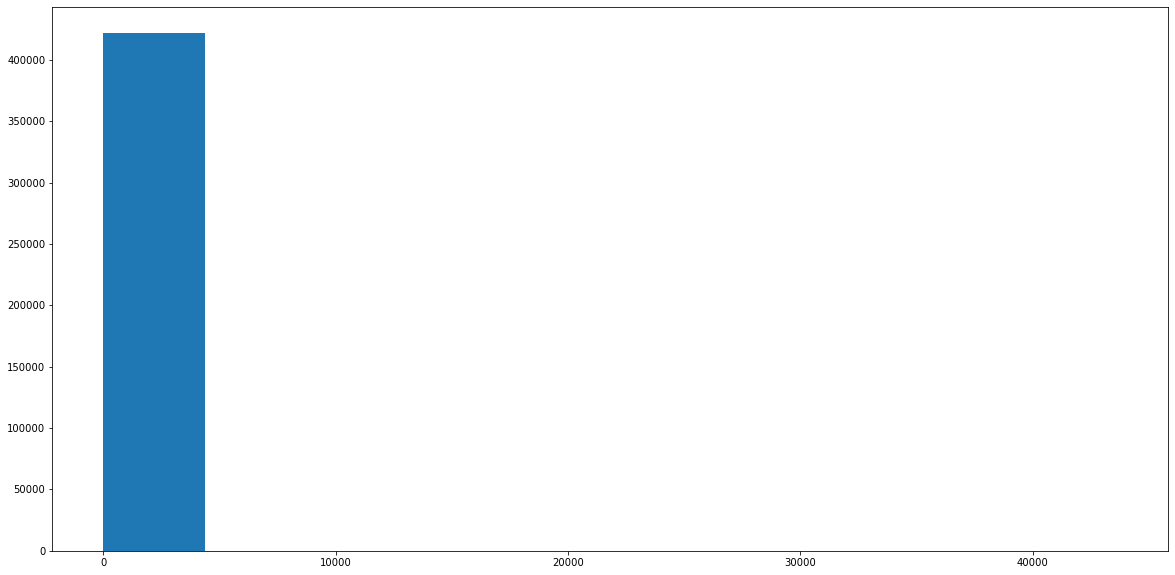

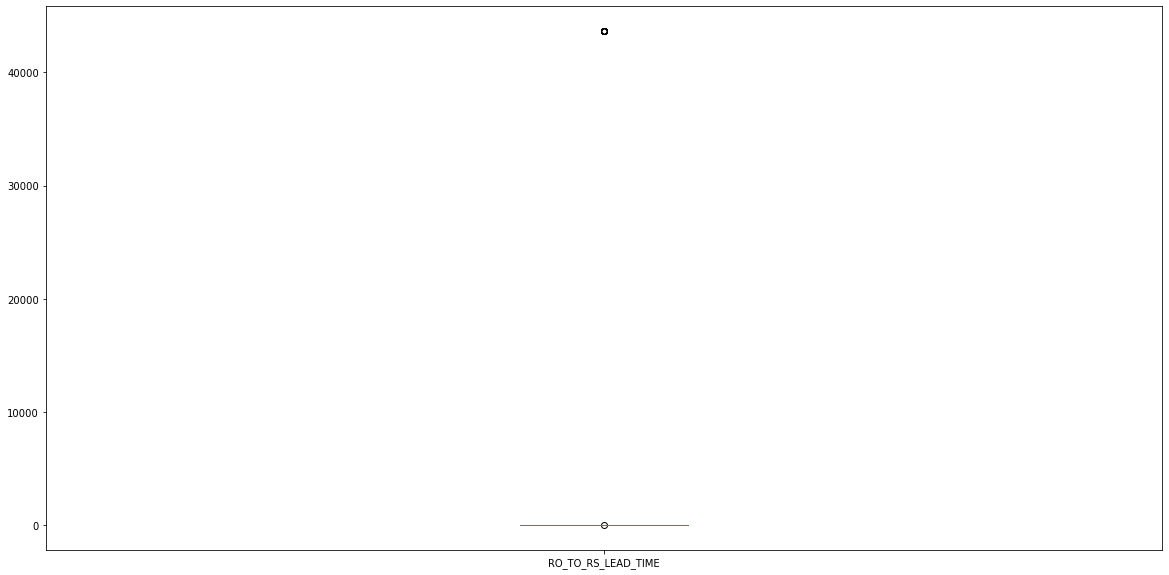

The skewvalue is nan
Not normally skewed data
nan
Not normal Kurtosis


In [462]:
cat_analysis(FullData7)

In [510]:
FullData7['RO_TO_RS_LEAD_TIME'].value_counts()

3.0        122718
2.0        118606
4.0         66827
1.0         49855
5.0         31863
6.0         18474
7.0          9652
0.0          4059
43617.0        25
43619.0         7
43645.0         2
43643.0         2
27.0            1
43648.0         1
43642.0         1
Name: RO_TO_RS_LEAD_TIME, dtype: int64

There are still outlier values in the RO_TO_RS_LEAD_TIME column. However, their occurrence is much less than 1% of the total values in the dataset.

We can easily purge them without any problems. However, first we need to make sure that any null values are filled with the value 0, since those null values signify that no attempt was made to return the packages referenced. 

Making sure that's the case. 

In [517]:
nulltime= FullData7[FullData7['RO_TO_RS_LEAD_TIME'].isnull()]

In [519]:
nulltime['Delivered'].value_counts()

D     1480069
R         350
IP        216
U          61
Name: Delivered, dtype: int64

Here we see that null values in the 'RO_TO_RS_LEAD_TIME' column, don't necessarily represent parcels which have been not been returned. 

We need to adjust for these values. Since they are tiny in ocurrence compared to the rest of the values in the dataset, we can just remove them. 

In [521]:
#Getting indexes of values which need to be removed. 
ret = nulltime[nulltime['Delivered']=='R'].index
un = nulltime[nulltime['Delivered']=='U'].index
inp = nulltime[nulltime['Delivered']=='IP'].index

In [524]:
#Dropping values at those indexes 
FullData7=FullData7.drop(ret)
FullData7=FullData7.drop(un)
FullData7=FullData7.drop(inp)

In [525]:
FullData7['RO_TO_RS_LEAD_TIME'].value_counts()

3.0        122573
2.0        118501
4.0         66743
1.0         49819
5.0         31826
6.0         18451
7.0          9641
0.0          4057
43617.0        25
43619.0         7
43645.0         2
43643.0         2
27.0            1
43648.0         1
43642.0         1
Name: RO_TO_RS_LEAD_TIME, dtype: int64

In [526]:
#Checking if this method worked
nulltime2= FullData7[FullData7['RO_TO_RS_LEAD_TIME'].isnull()]
nulltime2['Delivered'].value_counts()
#It worked!

D    1478554
Name: Delivered, dtype: int64

In [528]:
#Now we can replace all RO_TO_RS_LEAD_TIME null values with 0.
FullData7['RO_TO_RS_LEAD_TIME']=FullData7['RO_TO_RS_LEAD_TIME'].replace(np.NaN, 0)

In [ ]:
FullData7

In [529]:
FullData7['RO_TO_RS_LEAD_TIME'].value_counts()

0.0        1482611
3.0         122573
2.0         118501
4.0          66743
1.0          49819
5.0          31826
6.0          18451
7.0           9641
43617.0         25
43619.0          7
43645.0          2
43643.0          2
27.0             1
43648.0          1
43642.0          1
Name: RO_TO_RS_LEAD_TIME, dtype: int64

Purging

1. We need to purge values greater than 7 since those signify outliers. 
2. We need to purge values less than and equal 0 since those signify incorrect values. 

In [530]:
FullDatadev=FullData7[FullData7['RO_TO_RS_LEAD_TIME']<=7]

In [531]:
FullDatadev2 = FullDatadev[FullDatadev['RO_TO_RS_LEAD_TIME']>=0]

In [532]:
FullDatadev2['RO_TO_RS_LEAD_TIME'].value_counts()

0.0    1482611
3.0     122573
2.0     118501
4.0      66743
1.0      49819
5.0      31826
6.0      18451
7.0       9641
Name: RO_TO_RS_LEAD_TIME, dtype: int64

In [533]:
null(FullDatadev2['RO_TO_RS_LEAD_TIME'])
#'RO_TO_RS_LEAD_TIME' cleaned

0

In [ ]:
FullDatadev2

PR_TR is a column which shows whether the destination of the parcel is a TCS Super Area. 

That means whether a sorting facility does or doesn't exist at the shipment destination. 

'Allied' means no, and Proper means yes. 

In [ ]:
#Checking PR_TR
remspace(FullDatadev2)

In [536]:
FullDatadev2['PR_TR'].value_counts()

Allied    1246640
Proper     653525
Name: PR_TR, dtype: int64

In [537]:
null(FullDatadev2['PR_TR'])

0

In [ ]:
FullDatadev2['PR_TR']=FullDatadev2['PR_TR'].replace('Allied', 1)
FullDatadev2['PR_TR']=FullDatadev2['PR_TR'].replace('Proper', 2)
changedtype(FullDatadev2)

In [539]:
FullDatadev2['PR_TR'].value_counts()

1.0    1246640
2.0     653525
Name: PR_TR, dtype: int64

In [540]:
FullDatadev2=pd.DataFrame(FullDatadev2)

In [541]:
null(FullDatadev2)

                            0
BKG_DAT                     0
DIVISION                    0
ORIGIN_AREA                 0
ORGN                        0
DSTN                        0
AREA                        0
PR_TR                       0
NO_PCS                      0
WTT_BKG                     0
TIME                        0
DAT                         0
DLVRY_SHT_NO                0
DLVRD_BY                    0
DLVRY_RUT                   0
COD_AMOUNT                  0
COD_ST                      0
KPI                    347814
RTN_AREA              1607936
RO_DATE               1479972
RO_TO_RS_LEAD_TIME          0
ATTEMPT                     0
Delivered                   0
DeliveredNum                0
dtype: int64

In [ ]:
#Looking at KPI column*
remspace(FullDatadev2)

In [543]:
changedtype(FullDatadev2)
FullDatadev2['KPI']

which column do you want to change the data type for? Press enter if you want to change the data type for the entire dataset. KPI
what data type do you want to set the column to? (string, numbers, datetime)numbers


2         2.0
6         5.0
7         5.0
8         5.0
9         5.0
         ... 
316624    1.0
316625    1.0
316626    1.0
316627    1.0
316628    1.0
Name: KPI, Length: 1900165, dtype: float64

In [544]:
null(FullDatadev2['KPI'])
#number of null values increased when white space was removed

381990

In [545]:
indexnull = FullDatadev2[FullDatadev2['KPI'].isnull()]

In [554]:
indexnull['Delivered'].value_counts()
#healthy mix of values in Delivered column where KPI is null

U     337224
D      34176
R      10576
IP        14
Name: Delivered, dtype: int64

In [547]:
indexnull['Delivered'].value_counts().sum()

381990

In [548]:
#replacing KPI null values with modes of the KPI corresponding to values in 'Delivered' column
#For instance, if the mode of KPI values where Delivered=U is 6, I will replace the null values in the KPI Column where
#Delivered=U with 6. 
U=FullDatadev2[FullDatadev2['Delivered']=='U']
U['KPI'].value_counts()
#most frequent value of KPI here is 6.

6.0    17669
5.0    14751
7.0    13959
4.0     9284
3.0     3678
2.0     1332
1.0      400
0.0       40
Name: KPI, dtype: int64

In [549]:
#repeating process for all other values
D = FullDatadev2[FullDatadev2['Delivered']=='D']
D['KPI'].value_counts()
#most frequent value of KPI here is 1.

1.0    574682
2.0    399889
3.0    239775
4.0    122920
5.0     58104
6.0     29092
7.0     13584
0.0      6396
Name: KPI, dtype: int64

In [555]:
IP = FullDatadev2[FullDatadev2['Delivered']=='IP']
IP['KPI']
#most frequent value of KPI here is NaN

399466   NaN
399467   NaN
399468   NaN
399469   NaN
399470   NaN
399471   NaN
399472   NaN
399473   NaN
449290   NaN
449291   NaN
449292   NaN
449333   NaN
449335   NaN
449336   NaN
Name: KPI, dtype: float64

In [553]:
R = FullDatadev2[FullDatadev2['Delivered']=='R']
R['KPI'].value_counts()
#most frequent value of KPI here is 6

6.0    3740
5.0    3009
7.0    2887
4.0    1589
3.0     747
2.0     543
0.0      71
1.0      34
Name: KPI, dtype: int64

In [556]:
indexnullkpi = U[U['KPI'].isnull()].index
FullDatadev2.loc[indexnullkpi, 'KPI']=6
#replaced KPI column null values where Delivered column = 'U' with mode of KPI values where Delivered column = 'U'

In [557]:
indexnullkpi2 = D[D['KPI'].isnull()].index
FullDatadev2.loc[indexnullkpi2, 'KPI']=1
#replaced KPI column null values where Delivered column = 'D' with mode of KPI values where Delivered column = 'D'

In [558]:
indexnullkpi3 = IP[IP['KPI'].isnull()].index
FullDatadev2=FullDatadev2.drop(indexnullkpi3)
#removed KPI column null values where Delivered column = 'IP'

In [559]:
indexnullkpi4 = R[R['KPI'].isnull()].index
FullDatadev2.loc[indexnullkpi4, 'KPI']=6
#replaced KPI column null values where Delivered column = 'R' with mode of KPI values where Delivered column = 'R'

In [560]:
#Delivered packages having a KPI value of 0 doesn't make sense. Getting rid of these values. 
D['KPI'].value_counts()

1.0    574682
2.0    399889
3.0    239775
4.0    122920
5.0     58104
6.0     29092
7.0     13584
0.0      6396
Name: KPI, dtype: int64

In [561]:
#indexing values where Delivered = 'D', and KPI = 0
zerodel=D[D['KPI']==0].index

In [562]:
zerodel

Int64Index([   364,   1894,   4642,   6579,   7252,   8116,  12884,  13786,
             14164,  14560,
            ...
            267788, 267798, 267808, 267840, 267842, 269038, 269079, 269120,
            272037, 272930],
           dtype='int64', length=6396)

In [563]:
#dropping values at indexes collected
FullDatadev2=FullDatadev2.drop(zerodel)

In [564]:
#checking dataset to see if the proper values are gone
FullDatadev2[FullDatadev2['Delivered']=='D']['KPI'].value_counts()
#no zero values left

6.0    552200
1.0    477398
2.0    206787
3.0    122607
4.0     61530
5.0     26284
7.0      6336
Name: KPI, dtype: int64

In [566]:
FullDatadev2['KPI'].value_counts()

6.0    941719
1.0    489729
2.0    207272
3.0    123880
4.0     64816
5.0     31616
7.0     11065
0.0        53
Name: KPI, dtype: int64

In [ ]:
changedtype(FullDatadev2)

In [568]:
FullDatadev2['KPI'].value_counts()
#zero values still persist. 

6.0    941719
1.0    489729
2.0    207272
3.0    123880
4.0     64816
5.0     31616
7.0     11065
0.0        53
Name: KPI, dtype: int64

In [569]:
FullDatadev2=FullDatadev2[FullDatadev2['KPI']!=0.0]

In [570]:
FullDatadev2['KPI'].value_counts()
#zero values finally gone. 

6.0    941719
1.0    489729
2.0    207272
3.0    123880
4.0     64816
5.0     31616
7.0     11065
Name: KPI, dtype: int64

In [571]:
FullDatadev2['KPI'].isnull().sum()
#KPI column cleaned

0

In [572]:
null(FullDatadev2)

                            0
BKG_DAT                     0
DIVISION                    0
ORIGIN_AREA                 0
ORGN                        0
DSTN                        0
AREA                        0
PR_TR                       0
NO_PCS                      0
WTT_BKG                     0
TIME                        0
DAT                         0
DLVRY_SHT_NO                0
DLVRD_BY                    0
DLVRY_RUT                   0
COD_AMOUNT                  0
COD_ST                      0
KPI                         0
RTN_AREA              1579283
RO_DATE               1454465
RO_TO_RS_LEAD_TIME          0
ATTEMPT                     0
Delivered                   0
DeliveredNum                0
dtype: int64

Only 2 columns seem to have null values now ('RTN_AREA' and 'RO_DATE') Let's take a look at the missing value analysis again to see what the data shows. 

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)missingval


<AxesSubplot:>

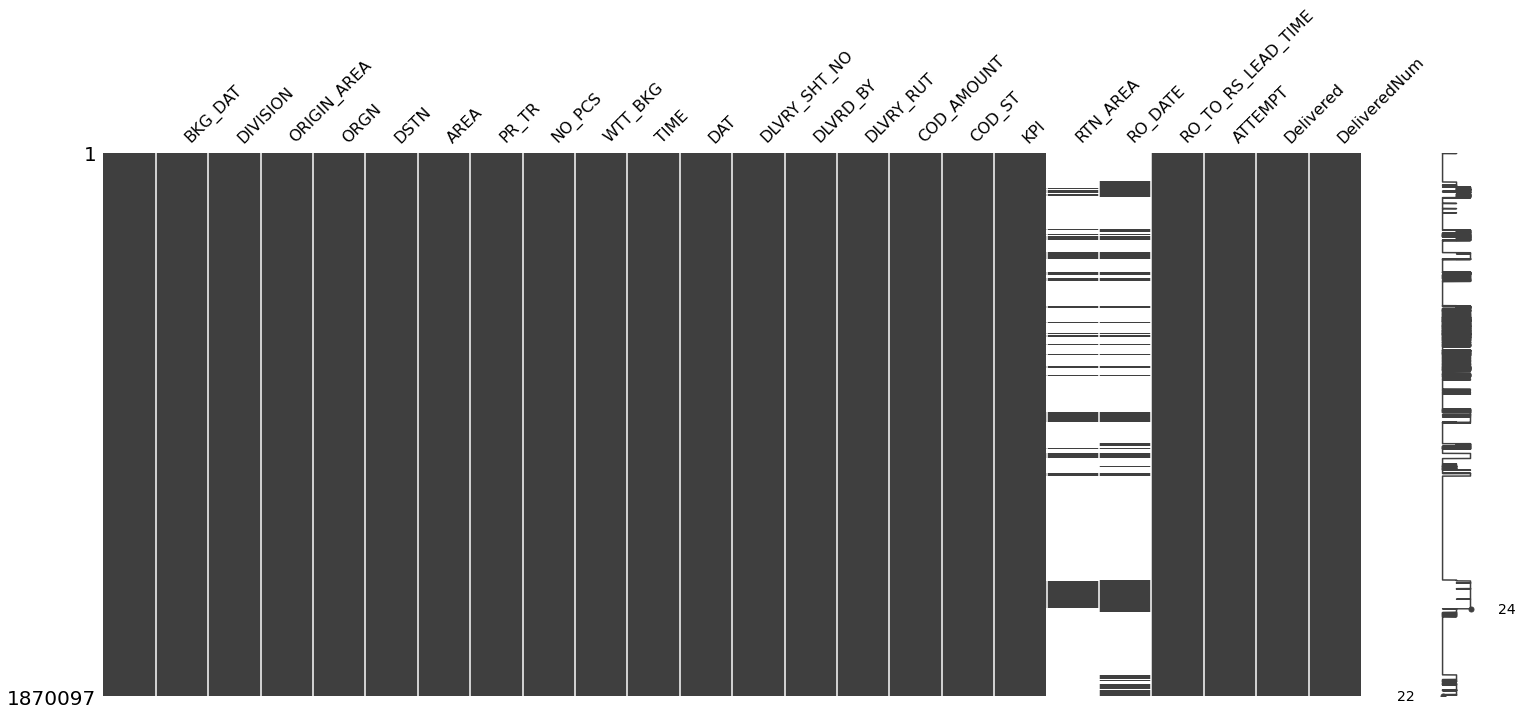

In [573]:
missval(FullDatadev2)

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)dendo


<AxesSubplot:>

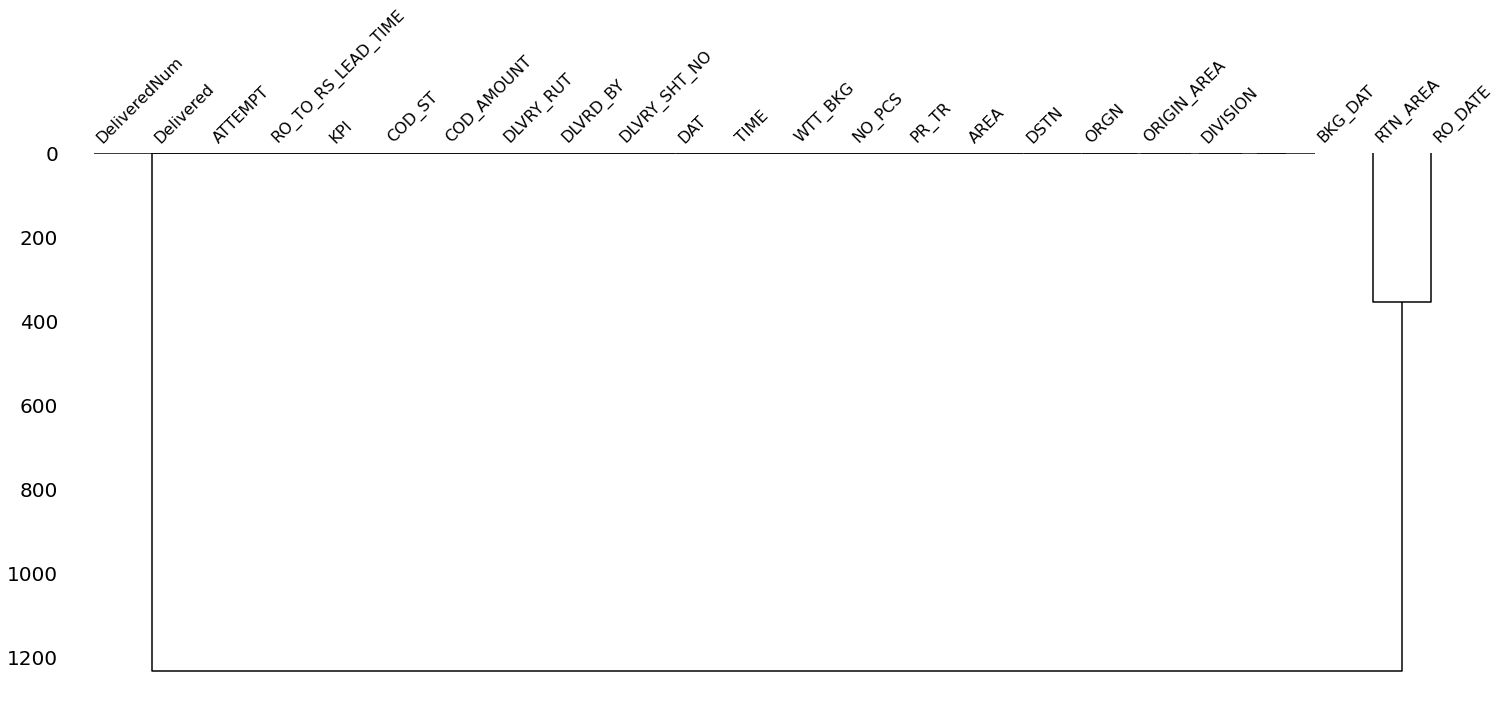

In [574]:
missval(FullDatadev2)

'RTN_AREA' and 'RO_DATE' seem to have a relationship with each other. However, they don't seem to have any relationship with the label column any more. 

We can delete them. 

In [575]:
remcol(FullDatadev2)

which column do you want to remove?
RTN_AREA
which column do you want to remove?
RO_DATE
which column do you want to remove?



In [ ]:
FullDatadev2

In [579]:
null(FullDatadev2)
#no null values in dataset anymore

                      0
BKG_DAT               0
DIVISION              0
ORIGIN_AREA           0
ORGN                  0
DSTN                  0
AREA                  0
PR_TR                 0
NO_PCS                0
WTT_BKG               0
TIME                  0
DAT                   0
DLVRY_SHT_NO          0
DLVRD_BY              0
DLVRY_RUT             0
COD_AMOUNT            0
COD_ST                0
KPI                   0
RO_TO_RS_LEAD_TIME    0
ATTEMPT               0
Delivered             0
DeliveredNum          0
dtype: int64

Deleting other unnecessary columns which won't serve any purpose. (DLVRY_SHT_NO, DLVRD_BY, DLVRY_RUT)

DLVRY_SHT_NO: Delivery Shipment Number
DLVRD_BY: ID number of the delivery person or truck
DLVRY_RUT: ID number of the delivery route taken.

These columns contain strings of numbers and letters that change per delivery and are never repeated. 


In [580]:
remcol(FullDatadev2)

which column do you want to remove?
DLVRY_SHT_NO
which column do you want to remove?
DLVRD_BY
which column do you want to remove?
DLVRY_RUT
which column do you want to remove?



In [581]:
FullDatadev2.set_index('BKG_DAT', inplace=True)

In [ ]:
FullDatadev2

In [586]:
#DIVISION
FullDatadev2['DIVISION'].value_counts()

EXPRESS    1582020
OLE         288077
Name: DIVISION, dtype: int64

In [ ]:
remspace(FullDatadev2)

In [591]:
null(FullDatadev2['DIVISION'])
#no blank values in the DIVISION column

0

In [592]:
#Since there are only two values in the DIVISION column, we can replace 
#them with a binary.
FullDatadev2['DIVISION']=FullDatadev2['DIVISION'].replace('EXPRESS', '1')
FullDatadev2['DIVISION']=FullDatadev2['DIVISION'].replace('OLE', '2')

In [594]:
FullDatadev2['DIVISION'].value_counts()

1    1582020
2     288077
Name: DIVISION, dtype: int64

In [ ]:
changedtype(FullDatadev2)

We can simplify the DeliveredNum column further by reducing all the non 'D' derived values to 0 for Undelivered or Returned or In Process. 

This will make analysis easier. 

In [597]:
#Ensuring that all the derived values are correct since we played 
#around with the Delivered column a lot. 
FullDatadev2.loc[FullDatadev2['Delivered']=='U','DeliveredNum']='2'
FullDatadev2.loc[FullDatadev2['Delivered']=='D','DeliveredNum']='1'
FullDatadev2.loc[FullDatadev2['Delivered']=='R','DeliveredNum']='0'
FullDatadev2.loc[FullDatadev2['Delivered']=='IP','DeliveredNum']='3'

In [598]:
#Now we can change the values of the DeliveredNum column
FullDatadev2['DeliveredNum']=FullDatadev2['DeliveredNum'].replace('2','0')
FullDatadev2['DeliveredNum']=FullDatadev2['DeliveredNum'].replace('3','0')

In [ ]:
changedtype(FullDatadev2)

In [601]:
FullDatadev2['DeliveredNum'].value_counts()

1.0    1453142
0.0     416955
Name: DeliveredNum, dtype: int64

In [ ]:
remspace(FullDatadev2)
#this shows there are no blank spaces in the dataframe anymore.

In [ ]:
FullDatadev2.head()

Looking at columns that can cause a problem during encoding. 

In [603]:
#ORIGIN_AREA
FullDatadev2['ORIGIN_AREA'].value_counts()
#shouldn't be a problem for encoding

KHI    1143938
LHE     492137
ISB     117739
GUJ      26463
RWP      26123
FSD      22439
PEW      17216
MUX      16288
HDD       7291
SKZ        463
Name: ORIGIN_AREA, dtype: int64

In [604]:
#ORGN
FullDatadev2['ORGN'].value_counts()

KHI    1143936
LHE     485890
ISB     125089
FSD      18866
RWP      18382
PEW      17204
SLT      13423
MUX      12692
GUJ       8501
HDD       7277
SRA       5758
GJT       3671
SGD       3568
OKR       2996
JLM        857
SKZ        459
RND        433
BHV        409
ABT        384
SWL        125
BPR         53
CCW         23
CHT         13
DGK          9
SAN          8
DPA          7
LLM          6
MCN          6
HSL          5
MDN          5
BWL          4
RTD          4
MRI          4
TBI          3
KSR          3
KTL          3
SWT          3
TXL          2
WAH          2
TUK          2
NGR          2
HRI          1
TTS          1
HZD          1
HRN          1
REE          1
MTI          1
KZK          1
MNA          1
SAL          1
SJO          1
Name: ORGN, dtype: int64

We can delete the ORGN column, since it is made redundant by ORIGIN_AREA. All the packages go to the ORIGIN_AREA sorting facility before going to their destinations. 

Hence, we can delete the ORGN column. 

In [605]:
remcol(FullDatadev2)

which column do you want to remove?
ORGN
which column do you want to remove?



In [ ]:
#Looking at DSTN
remspace(FullDatadev2)

In [606]:
FullDatadev2['DSTN'].value_counts()

KHI    183213
LHE     83206
ISB     74971
RWP     70328
FSD     59932
        ...  
SSA         1
KDI         1
NPT         1
VDR         1
BAK         1
Name: DSTN, Length: 444, dtype: int64

In [608]:
null(FullDatadev2['DSTN'])

0

In [ ]:
#AREA
remspace(FullDatadev2)

In [610]:
null(FullDatadev2['AREA'])

0

In [232]:
FullDatadev2['AREA'].value_counts()
#DSTN column made redundant by AREA column, hence deleting DSTN column from
#original dataset, but keeping it for further analysis. 

MUX    287013
RWP    275737
FSD    258314
SKZ    241273
HDD    229094
KHI    221175
GUJ    213236
ISB    178195
PEW    148546
LHE    148474
UET     60655
Name: AREA, dtype: int64

In [611]:
DSTN=FullDatadev2['DSTN']

In [612]:
remcol(FullDatadev2)

which column do you want to remove?
DSTN
which column do you want to remove?



In [ ]:
FullDatadev2

DAT=Date of receiving shipment

TIME=TIme of receiving shipment

Removing both DAT and TIME columns, since they can cause a lot of problems due to their wealth of values. They don't add anything significant of value when it comes to analyzing the dataset.

In [620]:
remcol(FullDatadev2)

which column do you want to remove?
DAT
which column do you want to remove?
TIME
which column do you want to remove?



In [621]:
#Dropping Delivered column since it's made redundant by the DeliveredNum column
remcol(FullDatadev2)

which column do you want to remove?
Delivered
which column do you want to remove?



In [622]:
#renaming DeliveredNum column
rename(FullDatadev2)

Which column do you want to rename?
DeliveredNum
New name of the column?
Delivery
Which column do you want to rename?



In [623]:
FullDatadev2.columns

Index(['DIVISION', 'ORIGIN_AREA', 'AREA', 'PR_TR', 'NO_PCS', 'WTT_BKG',
       'COD_AMOUNT', 'COD_ST', 'KPI', 'RO_TO_RS_LEAD_TIME', 'ATTEMPT',
       'Delivery'],
      dtype='object')

In [ ]:
FullDatadev2

### Data Cleaned
After much careful deliberation, we have managed to clean the data. Let's now proceed to encode the data. 

## Encoding
We'll use onehot encoding for this data set since we need to sort it into binary values.

In [40]:
#trying onehot encoding
ohotdata=encoding(FullDatadev2)
#DONE!

DIVISION              float64
ORIGIN_AREA            object
AREA                   object
PR_TR                 float64
NO_PCS                float64
WTT_BKG               float64
COD_AMOUNT            float64
COD_ST                  int64
KPI                   float64
RO_TO_RS_LEAD_TIME    float64
ATTEMPT               float64
Delivery              float64
dtype: object
what do you want to do?onehot2


In [ ]:
ohotdata

## Analysis of Dataset

Here, we will use several different algorithms to classify our data. They will include:

Multilayer Perceptron, AdaBoost, XGBoost, LightGBM, KNN Method, Naive Bayes Analysis, RandomForest, Decision Trees, Logistic Regression, and Support Vector Machines. 

To evaluate the quality of our results, we will focus on Area Under the Curve and Recall. These two qualifiers present a better picture of how the dataset is performing compared to the Accuracy and Precision of the classification. 

At the end of each iteration of the analysis, we will re-evaluate which algorithms are performing better. 

Let's begin. 

### Applying Basic Analysis through Algorithms After Wrangling/Cleaning and Encoding Data
We will first use basic algorithms to classify our data without Feature Selection, Regularization, or Cross Validation

In [104]:
#Splitting dataset for analysis
basicdata = splitting(ohotdata)

What is the label columnDelivery


In [105]:
X_train = basicdata[0]
X_test = basicdata[1]
y_train = basicdata[2]
y_test = basicdata[3]

### Gaussian Naive Bayes Analysis

In [113]:
NVB(X_train, X_test, y_train, y_test)

These are the predicted values:  [1. 1. 1. ... 1. 1. 1.]
The number of mislabeled points out of a total 617133 points : 139694
The Confusion Matrix is
 [[  1941 135368]
 [  4326 475498]]
The Accuracy Score is
 77.36403660151053
The Precision is 77.83998454652902
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.31      0.01      0.03    137309
         1.0       0.78      0.99      0.87    479824

    accuracy                           0.77    617133
   macro avg       0.54      0.50      0.45    617133
weighted avg       0.67      0.77      0.68    617133

The LogLoss is 7.818360174574335
The Area Under the Curve is 0.5025600970148767
The Recall Score is 99.09841942045416
The Specificity is [0.       0.985864 1.      ] and the Sensitivity is [0.         0.99098419 1.        ]
The F-Score is 0.8719214442233816


### KNN Method 

KNNalgo(X_train, X_test, y_train, y_test)
Took > 7 hours

### eXtreme Gradient Boosting

In [116]:
boostaway(X_train, X_test, y_train, y_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[136321    988]
 [    17 479807]]
The Accuracy Score is
 99.83715017670421
The Precision is 99.79450701442403
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    137309
         1.0       1.00      1.00      1.00    479824

    accuracy                           1.00    617133
   macro avg       1.00      1.00      1.00    617133
weighted avg       1.00      1.00      1.00    617133

The LogLoss is 0.05624761644434322
The Area Under the Curve is 0.996384560331634
The Recall Score is 99.99645703424589
The Specificity is [0.         0.00719545 1.        ] and the Sensitivity is [0.         0.99996457 1.        ]
The F-Score is 0.9989537995813117


### Adaptive Gradient Boosting

In [117]:
ada(X_train, X_test, y_train, y_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[136141   1168]
 [    33 479791]]
The Accuracy Score is
 99.8053904101709
The Precision is 99.757151857019
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    137309
         1.0       1.00      1.00      1.00    479824

    accuracy                           1.00    617133
   macro avg       1.00      1.00      1.00    617133
weighted avg       1.00      1.00      1.00    617133

The LogLoss is 0.06721728441047033
The Area Under the Curve is 0.9957124316091784
The Recall Score is 99.99312247824203
The Specificity is [0.         0.00850636 1.        ] and the Sensitivity is [0.         0.99993122 1.        ]
The F-Score is 0.9987499778826228


### Random Forest

In [118]:
RandFor(X_train, X_test, y_train, y_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[136618    691]
 [   138 479686]]
The Accuracy Score is
 99.86566915073412
The Precision is 99.85615464520575
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    137309
         1.0       1.00      1.00      1.00    479824

    accuracy                           1.00    617133
   macro avg       1.00      1.00      1.00    617133
weighted avg       1.00      1.00      1.00    617133

The LogLoss is 0.04639712696162062
The Area Under the Curve is 0.9973399747377579
The Recall Score is 99.97123945446664
The Specificity is [0.         0.00503245 1.        ] and the Sensitivity is [0.         0.99971239 1.        ]
The F-Score is 0.9991366390995219


### Multilayer Perceptron

In [119]:
Perceptron(X_train, X_test, y_train, y_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Perceptron score is 0.9985083370312315
The Confusion Matrix is
 [[136395    914]
 [    45 479779]]
The Accuracy Score is
 99.84460399946204
The Precision is 99.80985785106087
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    137309
         1.0       1.00      1.00      1.00    479824

    accuracy                           1.00    617133
   macro avg       1.00      1.00      1.00    617133
weighted avg       1.00      1.00      1.00    617133

The LogLoss is 0.05367306138996156
The Area Under the Curve is 0.9966248481873797
The Recall Score is 99.99062156123912
The Specificity is [0.         0.00665652 1.        ] and the Sensitivity is [0.         0.99990622 1.        ]
The F-Score is 0.9990015793577833


### Logistic Regression

In [120]:
LogisticRegression(X_train, X_test, y_train, y_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[134369   2940]
 [    44 479780]]
The Accuracy Score is
 99.51647375849291
The Precision is 99.39095127610209
The Classification Report is               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    137309
         1.0       0.99      1.00      1.00    479824

    accuracy                           1.00    617133
   macro avg       1.00      0.99      0.99    617133
weighted avg       1.00      1.00      1.00    617133

The LogLoss is 0.16700785661900897
The Area Under the Curve is 0.9892483694618188
The Recall Score is 99.99082997098935
The Specificity is [0.         0.02141156 1.        ] and the Sensitivity is [0.        0.9999083 1.       ]
The F-Score is 0.9968998819794211


### LightGBM

In [123]:
light(X_train, X_test, y_train, y_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[136197   1112]
 [    45 479779]]
The Accuracy Score is
 99.81252015367839
The Precision is 99.76876256781682
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    137309
         1.0       1.00      1.00      1.00    479824

    accuracy                           1.00    617133
   macro avg       1.00      1.00      1.00    617133
weighted avg       1.00      1.00      1.00    617133

The LogLoss is 0.06475468568567008
The Area Under the Curve is 0.9959038466506996
The Recall Score is 99.99062156123912
The Specificity is [0.         0.00809852 1.        ] and the Sensitivity is [0.         0.99990622 1.        ]
The F-Score is 0.9987956886277408


### Decision Tree

In [121]:
DecTree(X_train, X_test, y_train, y_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[136723    586]
 [   548 479276]]
The Accuracy Score is
 99.81624706505728
The Precision is 99.87788155761447
The Classification Report is               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    137309
         1.0       1.00      1.00      1.00    479824

    accuracy                           1.00    617133
   macro avg       1.00      1.00      1.00    617133
weighted avg       1.00      1.00      1.00    617133

The LogLoss is 0.06346677457845135
The Area Under the Curve is 0.9972950840495168
The Recall Score is 99.88579145686752
The Specificity is [0.         0.00426775 1.        ] and the Sensitivity is [0.         0.99885791 1.        ]
The F-Score is 0.9988183635063969


#### Conclusion
The algorithms are showing a very high level of accuracy; close to 100%. This is highly suspect. There could be features within the dataset which are leading to overfitting of data. 

The data needs to be explored further to get a more accurate model that fits the data. 

## ANOVA
Let's perform some basic ANOVA and see whether the columns have any relation to the label. We can manually select features to use for more rigorous analysis later. 

In [637]:
ohotdata.columns

Index(['DIVISION', 'PR_TR', 'NO_PCS', 'WTT_BKG', 'COD_AMOUNT', 'COD_ST', 'KPI',
       'RO_TO_RS_LEAD_TIME', 'ATTEMPT', 'Delivery', 'ORIGIN_AREA_FSD',
       'ORIGIN_AREA_GUJ', 'ORIGIN_AREA_HDD', 'ORIGIN_AREA_ISB',
       'ORIGIN_AREA_KHI', 'ORIGIN_AREA_LHE', 'ORIGIN_AREA_MUX',
       'ORIGIN_AREA_PEW', 'ORIGIN_AREA_RWP', 'ORIGIN_AREA_SKZ', 'AREA_FSD',
       'AREA_GUJ', 'AREA_HDD', 'AREA_ISB', 'AREA_KHI', 'AREA_LHE', 'AREA_MUX',
       'AREA_PEW', 'AREA_RWP', 'AREA_SKZ', 'AREA_UET'],
      dtype='object')

Let's Run through all the columns and relate them with the Delivery Column using the ANOVA tests. 

first column you want to relateDIVISION
second column you want to relateDelivery
The Covariance is  [[0.13031443 0.02499891]
 [0.02499891 0.17324839]]
Spearman correlation: 0.17
Pearsons correlation: 0.17
The t-test value is 935.7341312801857
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35953036e-

<AxesSubplot:xlabel='DIVISION', ylabel='Delivery'>

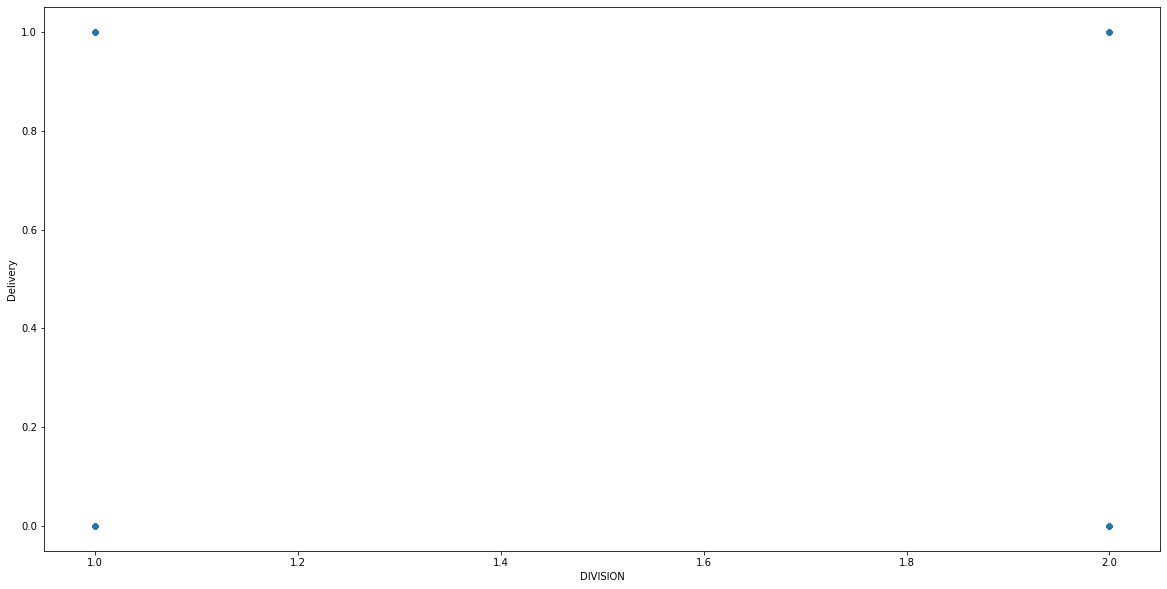

In [632]:
#DIVISION
ANOVA(ohotdata)
#Pearson and Spearman tests show slight correlations

first column you want to relatePR_TR
second column you want to relateDelivery
The Covariance is  [[0.2252874  0.02291059]
 [0.02291059 0.17324839]]
Spearman correlation: 0.12
Pearsons correlation: 0.12
The t-test value is 1225.5406959064114
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35953036e-03

<AxesSubplot:xlabel='PR_TR', ylabel='Delivery'>

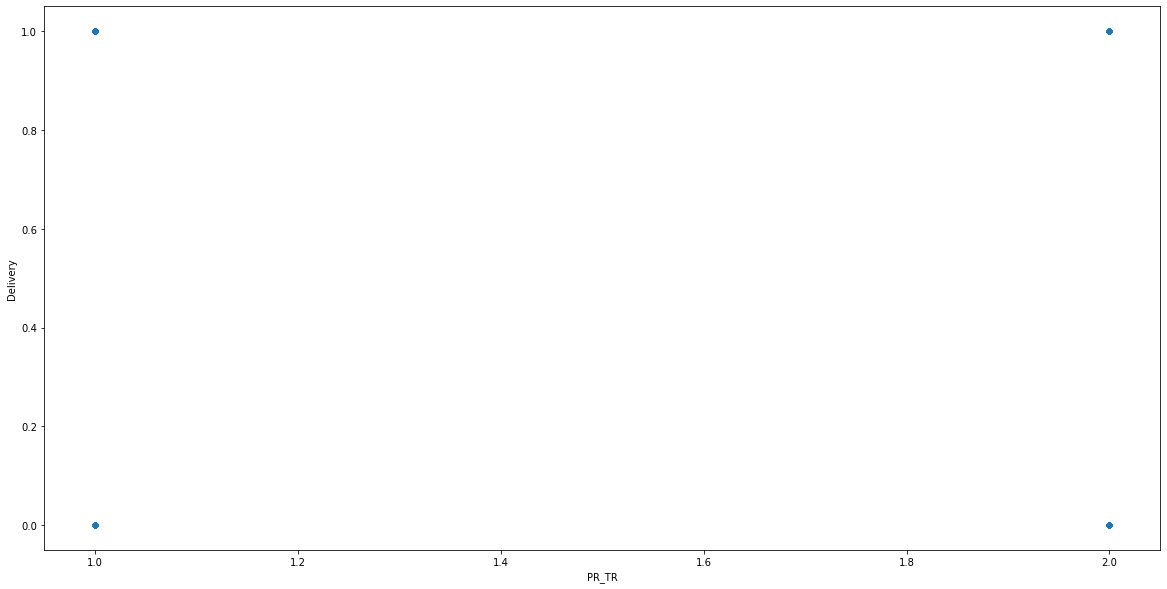

In [630]:
#PR_TR
ANOVA(ohotdata)
#Pearson and Spearman tests show slight correlations

first column you want to relateNO_PCS
second column you want to relateDelivery
The Covariance is  [[4.2852795e+11 2.6795503e+02]
 [2.6795503e+02 1.7324839e-01]]
Spearman correlation: 0.03
Pearsons correlation: 0.00
The t-test value is 11.490258698469532
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1

<AxesSubplot:xlabel='NO_PCS', ylabel='Delivery'>

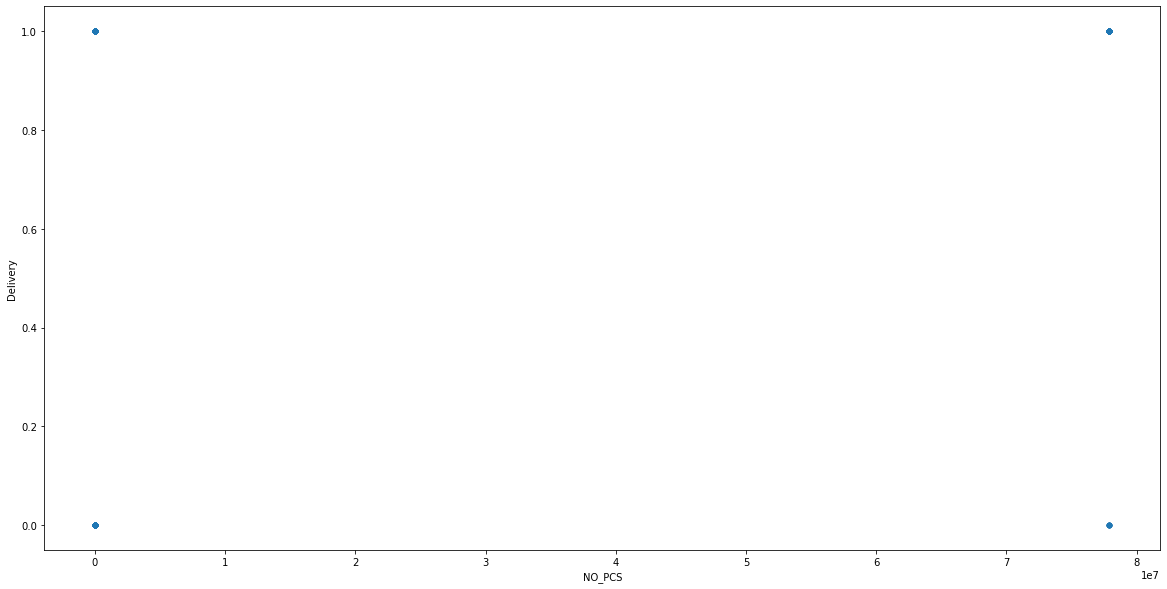

In [631]:
#NO_PCS
ANOVA(ohotdata)

first column you want to relateWTT_BKG
second column you want to relateDelivery
The Covariance is  [[7.34931671e+02 5.05183433e-01]
 [5.05183433e-01 1.73248390e-01]]
Spearman correlation: 0.16
Pearsons correlation: 0.04
The t-test value is 186.24163343615902
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e

<AxesSubplot:xlabel='WTT_BKG', ylabel='Delivery'>

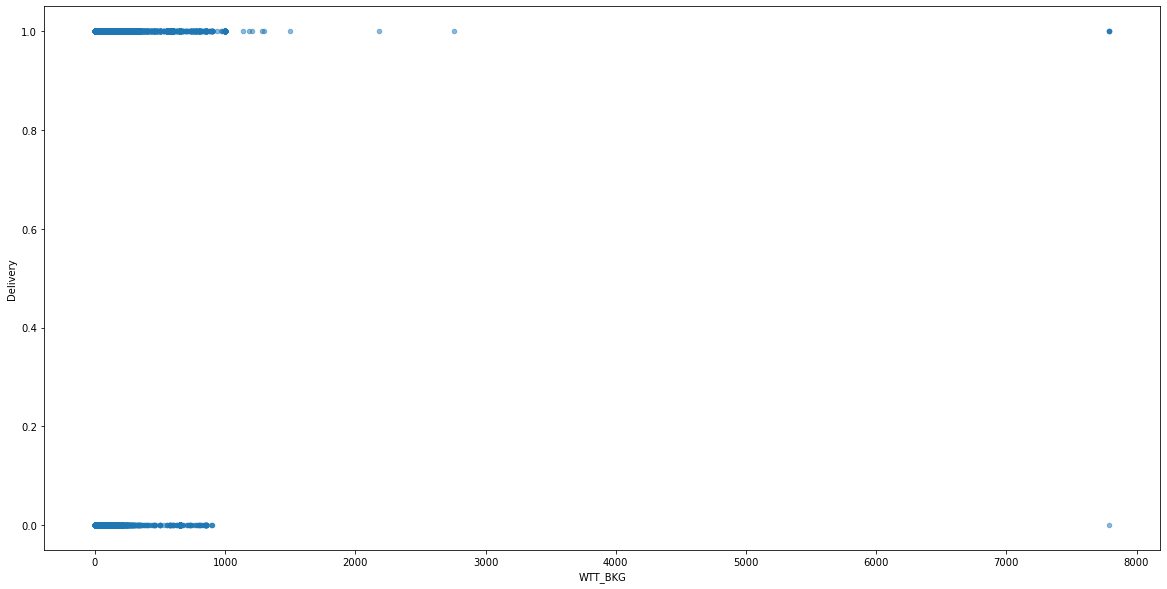

In [633]:
#WTT_BKG
ANOVA(ohotdata)
#somewhat correlated

first column you want to relateCOD_AMOUNT
second column you want to relateDelivery
The Covariance is  [[ 2.60545114e+07 -4.13107872e+01]
 [-4.13107872e+01  1.73248390e-01]]
Spearman correlation: -0.15
Pearsons correlation: -0.02
The t-test value is 346.5643950470264
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.9

<AxesSubplot:xlabel='COD_AMOUNT', ylabel='Delivery'>

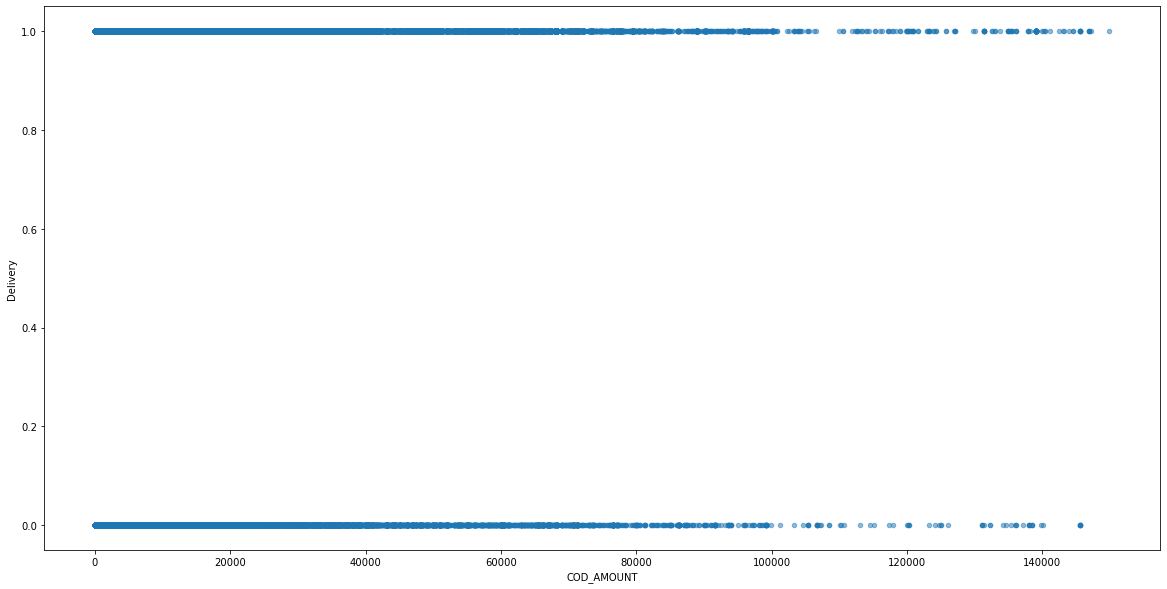

In [634]:
#COD_AMOUNT
ANOVA(ohotdata)

first column you want to relateCOD_ST
second column you want to relateDelivery
The Covariance is  [[ 0.16632031 -0.03904721]
 [-0.03904721  0.17324839]]
Spearman correlation: -0.23
Pearsons correlation: -0.23
The t-test value is 28.709270725727617
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35953

<AxesSubplot:xlabel='COD_ST', ylabel='Delivery'>

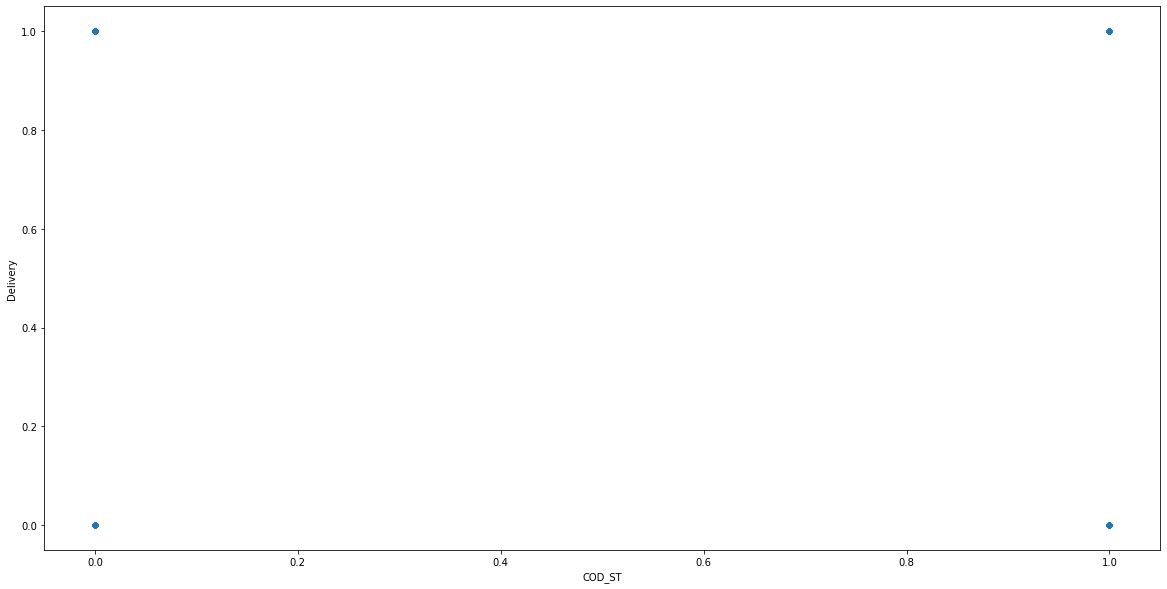

In [635]:
#COD_ST
ANOVA(ohotdata)
#slight correlation

first column you want to relateKPI
second column you want to relateDelivery
The Covariance is  [[ 4.94986444 -0.4131105 ]
 [-0.4131105   0.17324839]]
Spearman correlation: -0.44
Pearsons correlation: -0.45
The t-test value is 1928.0635568649072
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35953036

<AxesSubplot:xlabel='KPI', ylabel='Delivery'>

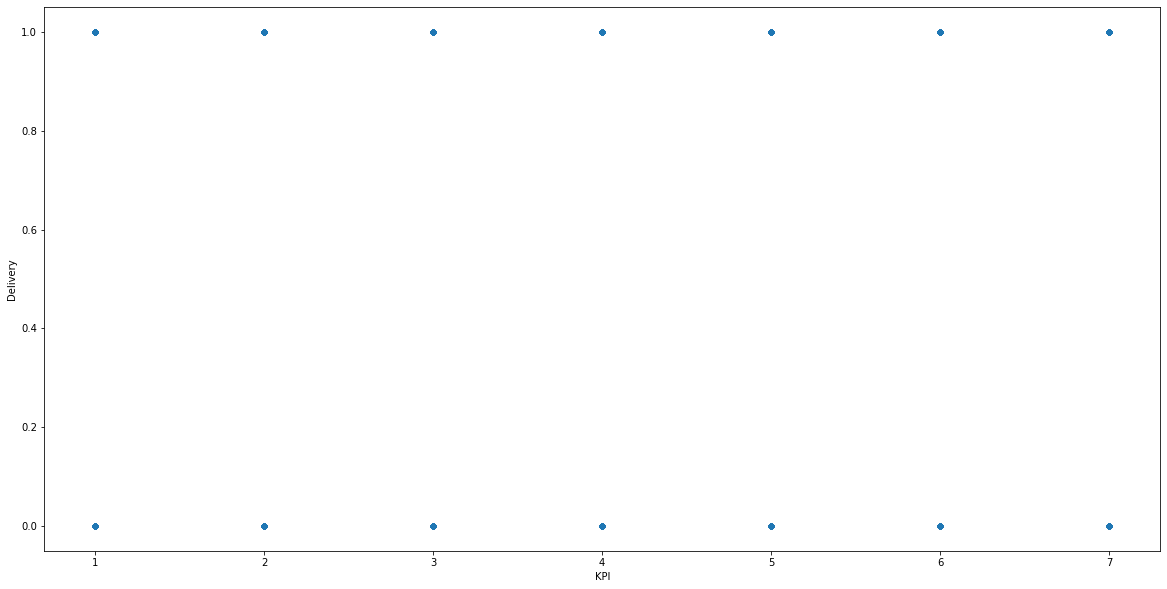

In [636]:
#KPI
ANOVA(ohotdata)
#clear relation

first column you want to relateRO_TO_RS_LEAD_TIME
second column you want to relateDelivery
The Covariance is  [[ 2.0036886  -0.51732649]
 [-0.51732649  0.17324839]]
Spearman correlation: -0.98
Pearsons correlation: -0.88
The t-test value is -103.13662373002954
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.9232071

<AxesSubplot:xlabel='RO_TO_RS_LEAD_TIME', ylabel='Delivery'>

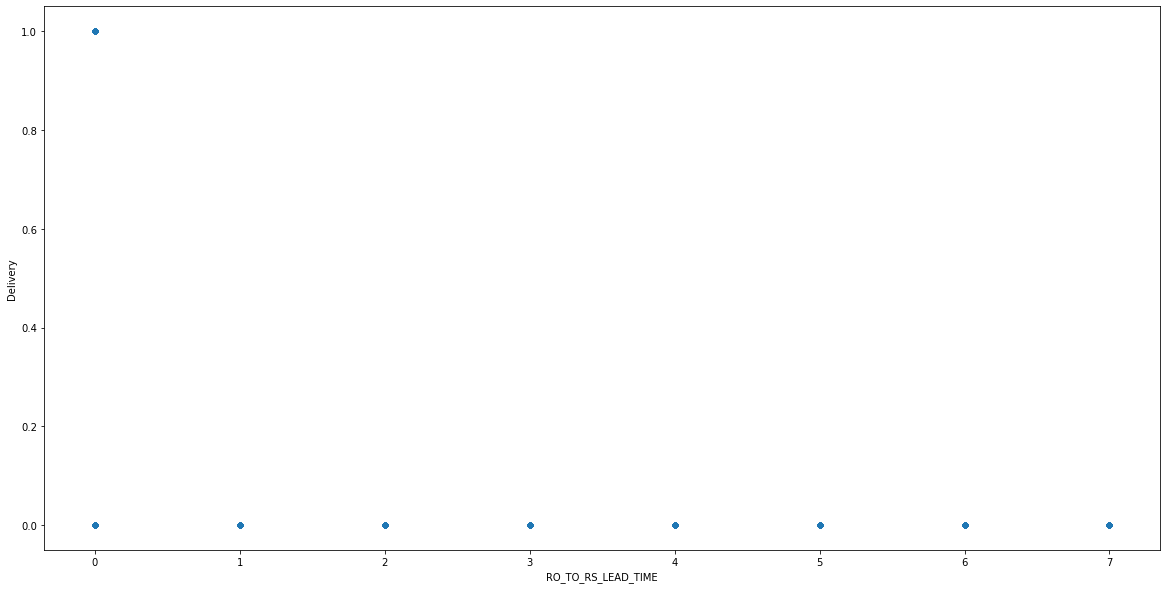

In [638]:
#RO_TO_RS_LEAD_TIME
ANOVA(ohotdata)
#clear relation

first column you want to relateATTEMPT
second column you want to relateDelivery
The Covariance is  [[ 1.70829785 -0.04467414]
 [-0.04467414  0.17324839]]
Spearman correlation: -0.10
Pearsons correlation: -0.08
The t-test value is 766.9976104679059
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35953

<AxesSubplot:xlabel='ATTEMPT', ylabel='Delivery'>

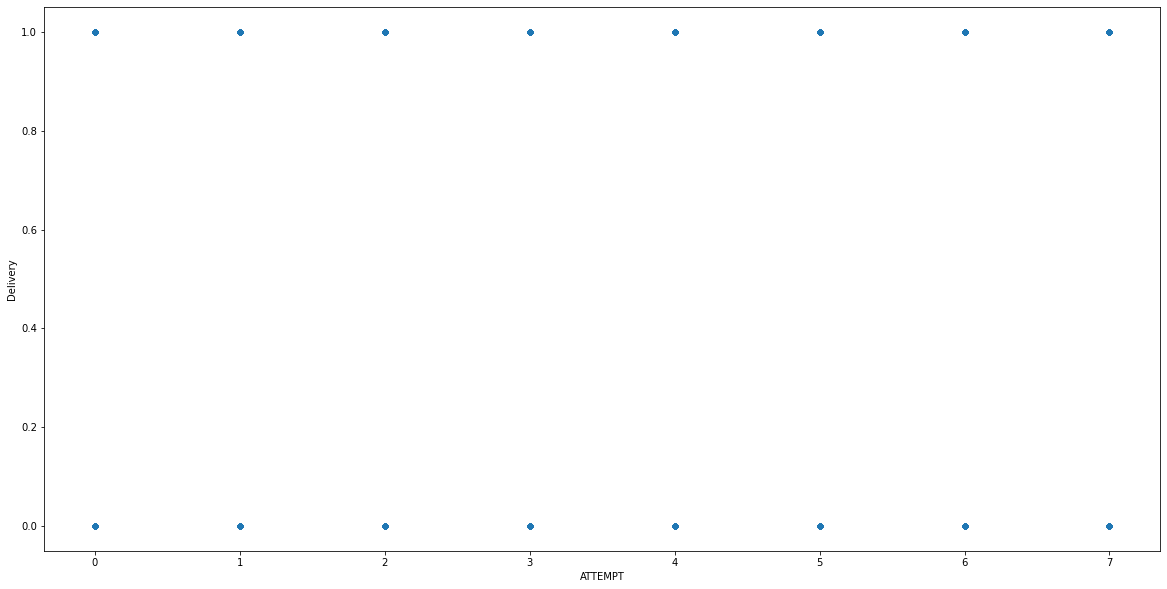

In [639]:
#ATTEMPT
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_FSD
second column you want to relateDelivery
The Covariance is  [[ 1.18548770e-02 -6.73882428e-05]
 [-6.73882428e-05  1.73248390e-01]]
Spearman correlation: -0.00
Pearsons correlation: -0.00
The t-test value is -2431.702154084476
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03

<AxesSubplot:xlabel='ORIGIN_AREA_FSD', ylabel='Delivery'>

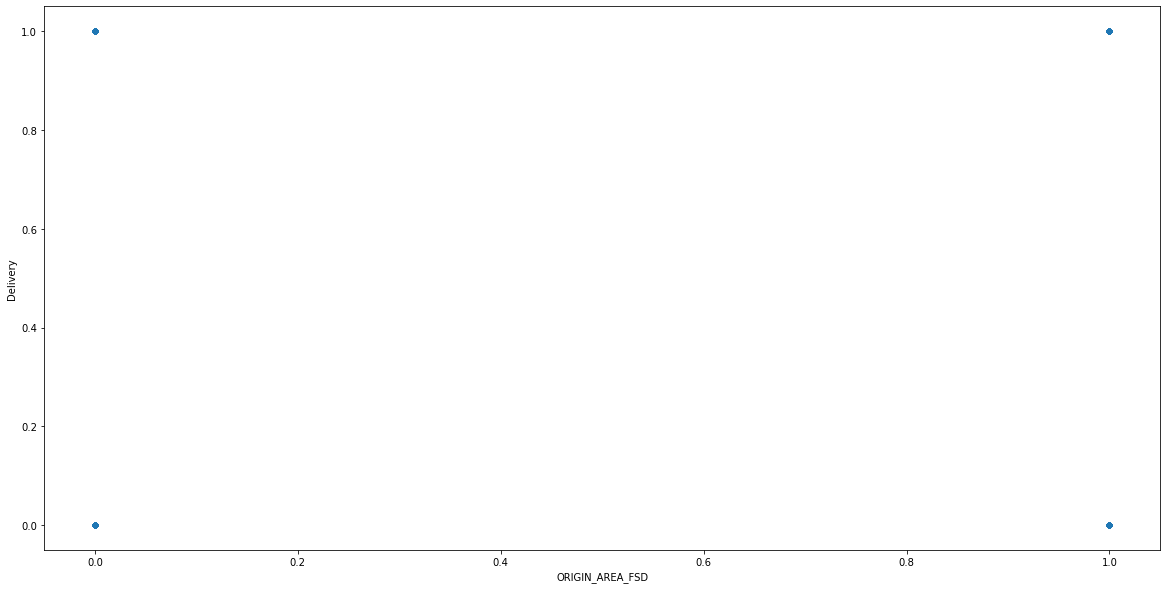

In [640]:
#'ORIGIN_AREA_FSD'
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_GUJ
second column you want to relateDelivery
The Covariance is  [[ 0.01395037 -0.0002507 ]
 [-0.0002507   0.17324839]]
Spearman correlation: -0.01
Pearsons correlation: -0.01
The t-test value is -2411.252647819704
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-0

<AxesSubplot:xlabel='ORIGIN_AREA_GUJ', ylabel='Delivery'>

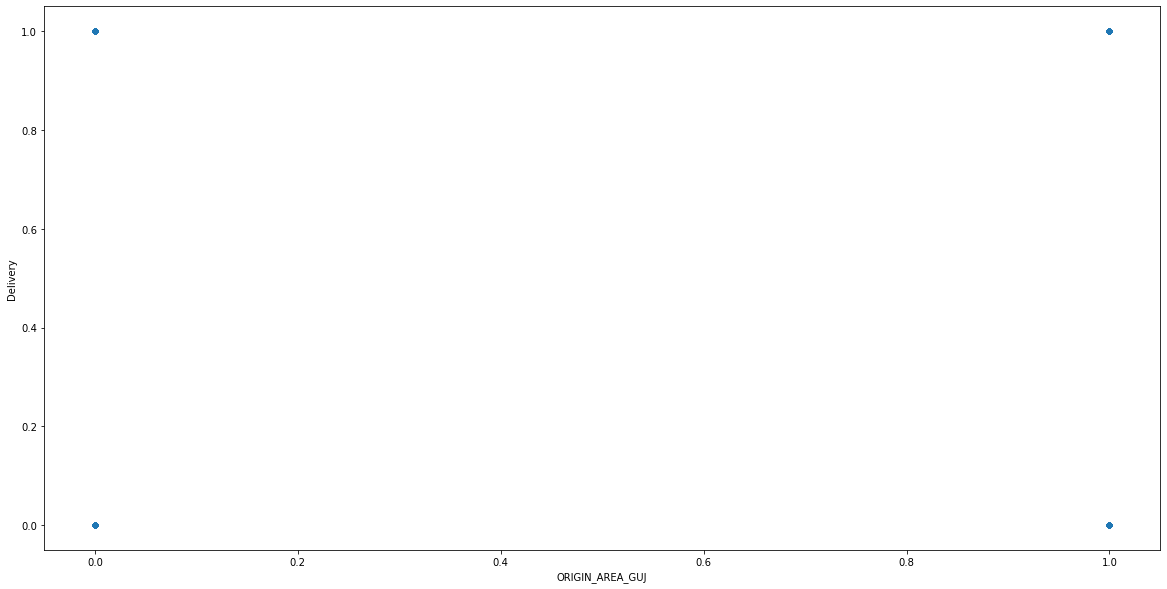

In [641]:
#'ORIGIN_AREA_GUJ'
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_HDD
second column you want to relateDelivery
The Covariance is  [[ 0.00388353 -0.00028897]
 [-0.00028897  0.17324839]]
Spearman correlation: -0.01
Pearsons correlation: -0.01
The t-test value is -2512.1354838185625
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-

<AxesSubplot:xlabel='ORIGIN_AREA_HDD', ylabel='Delivery'>

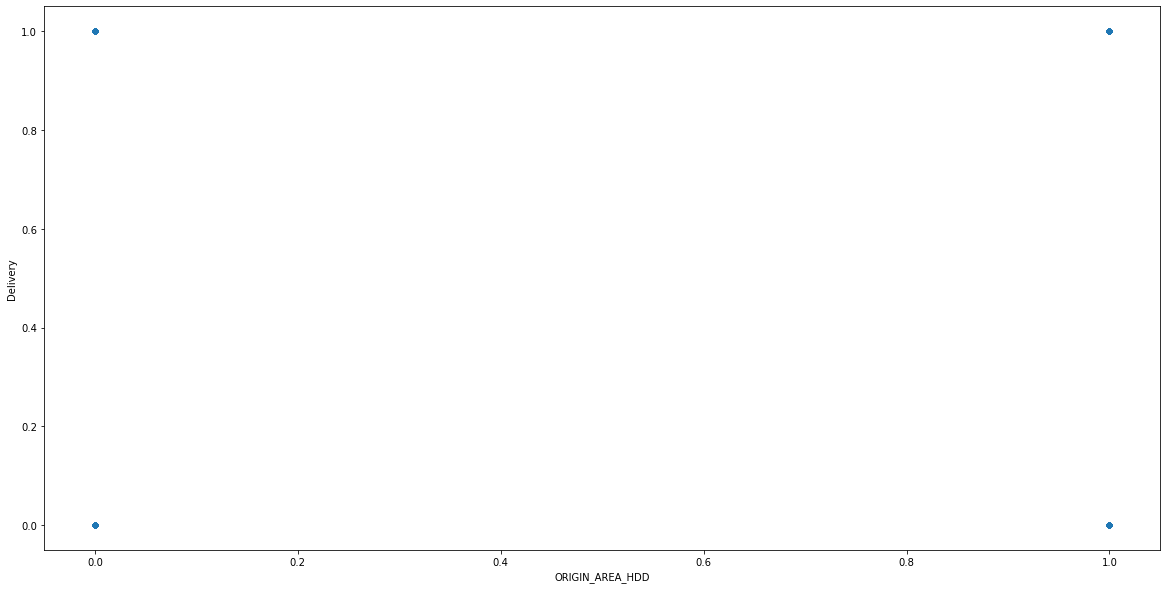

In [642]:
#'ORIGIN_AREA_HDD'
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_ISB
second column you want to relateDelivery
The Covariance is  [[0.05899499 0.00112934]
 [0.00112934 0.17324839]]
Spearman correlation: 0.01
Pearsons correlation: 0.01
The t-test value is -2026.3226915066227
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.3

<AxesSubplot:xlabel='ORIGIN_AREA_ISB', ylabel='Delivery'>

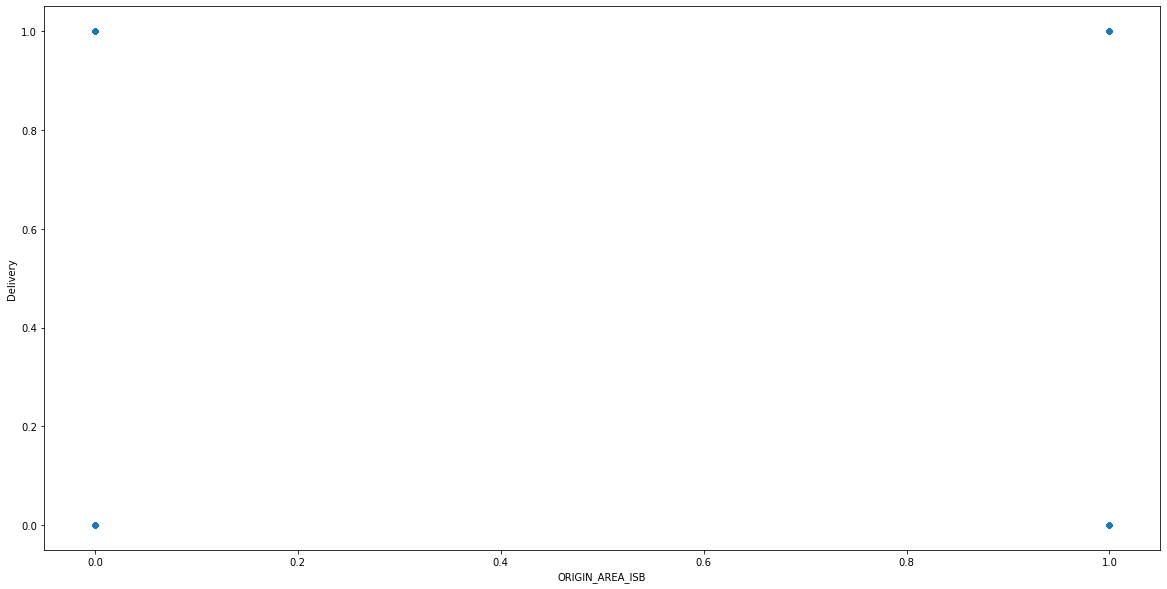

In [643]:
#'ORIGIN_AREA_ISB'
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_KHI
second column you want to relateDelivery
The Covariance is  [[0.23752328 0.00445929]
 [0.00445929 0.17324839]]
Spearman correlation: 0.02
Pearsons correlation: 0.02
The t-test value is -352.78718148410775
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.3

<AxesSubplot:xlabel='ORIGIN_AREA_KHI', ylabel='Delivery'>

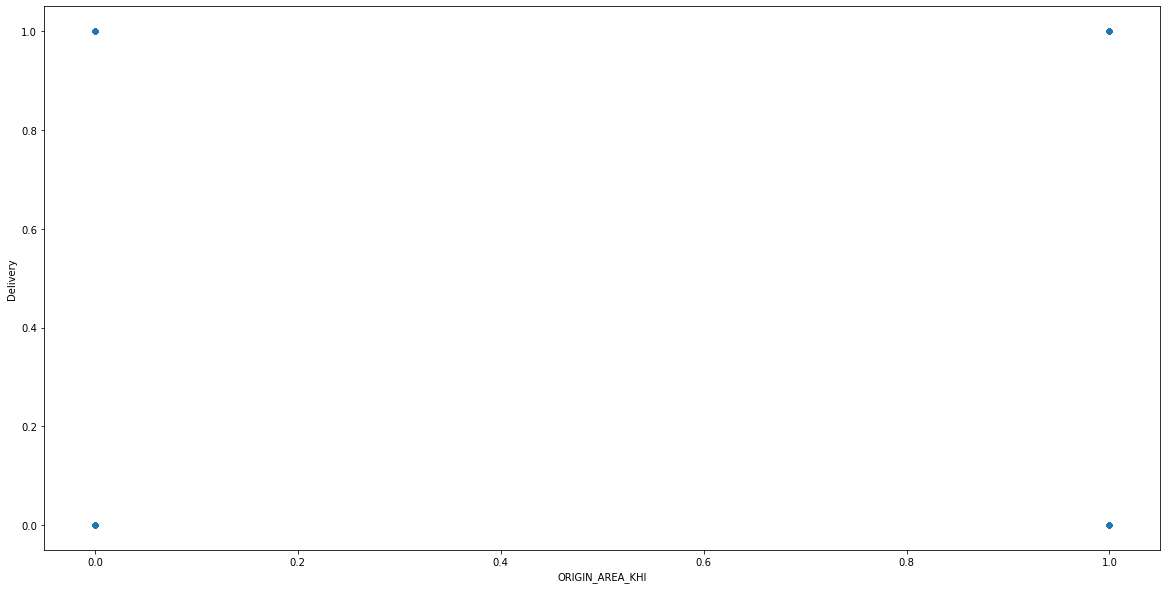

In [644]:
#'ORIGIN_AREA_KHI
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_LHE
second column you want to relateDelivery
The Covariance is  [[ 0.19390749 -0.00493323]
 [-0.00493323  0.17324839]]
Spearman correlation: -0.03
Pearsons correlation: -0.03
The t-test value is -1159.760556887623
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-0

<AxesSubplot:xlabel='ORIGIN_AREA_LHE', ylabel='Delivery'>

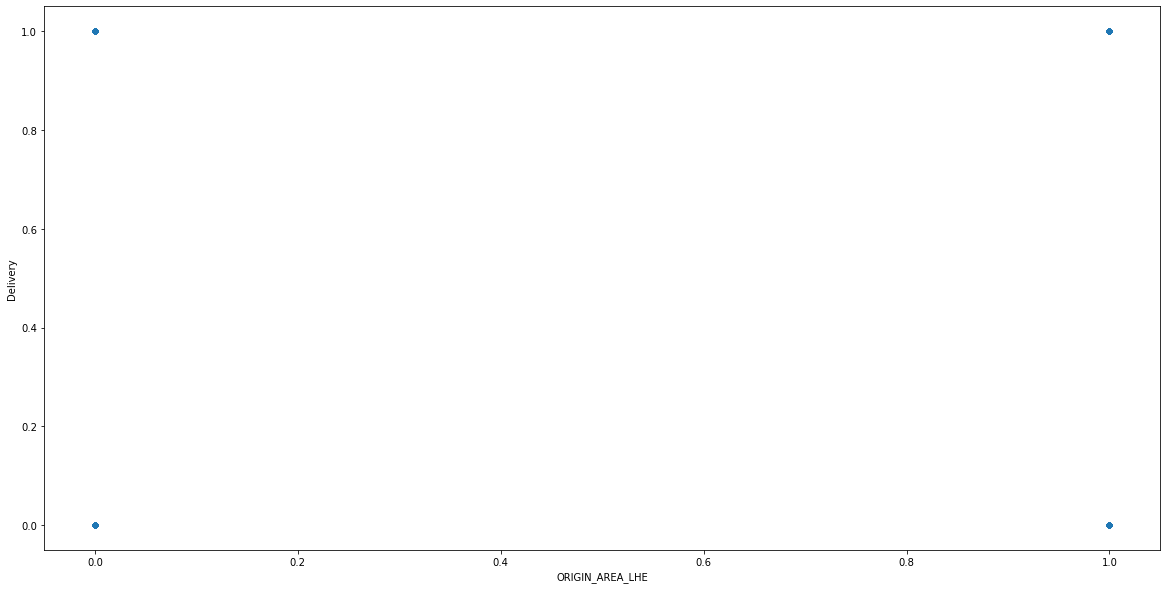

In [645]:
#ORIGIN_AREA_LHE
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_MUX
second column you want to relateDelivery
The Covariance is  [[ 8.63385423e-03 -1.72955524e-04]
 [-1.72955524e-04  1.73248390e-01]]
Spearman correlation: -0.00
Pearsons correlation: -0.00
The t-test value is -2463.6863810442574
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-0

<AxesSubplot:xlabel='ORIGIN_AREA_MUX', ylabel='Delivery'>

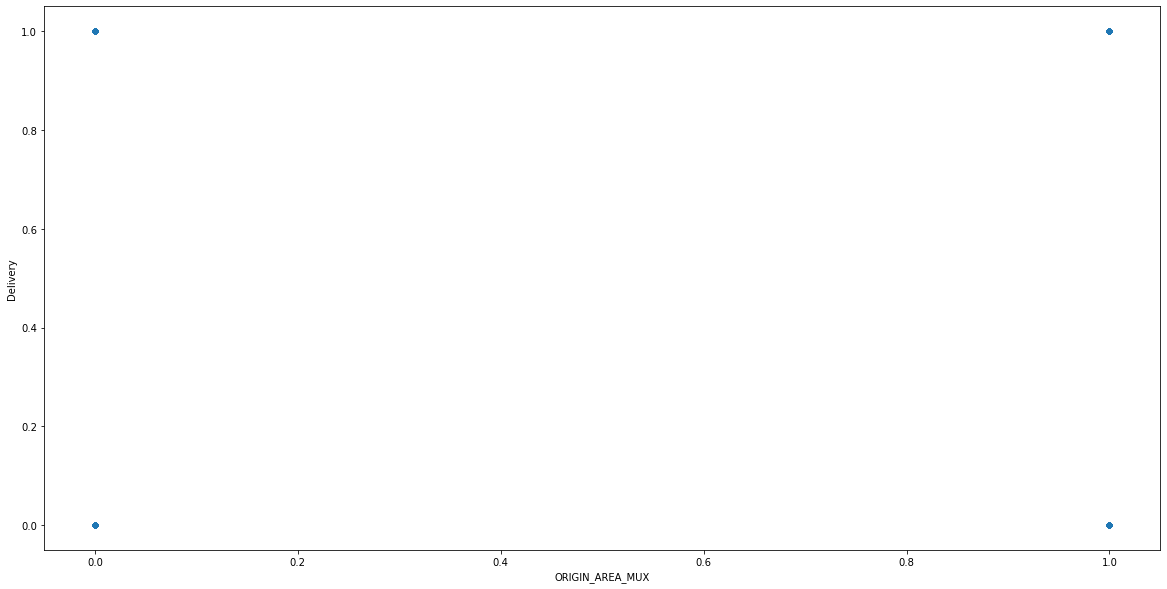

In [646]:
#ORIGIN_AREA_MUX
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_PEW
second column you want to relateDelivery
The Covariance is  [[ 0.0091212  -0.00023931]
 [-0.00023931  0.17324839]]
Spearman correlation: -0.01
Pearsons correlation: -0.01
The t-test value is -2458.8033025890613
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-

<AxesSubplot:xlabel='ORIGIN_AREA_PEW', ylabel='Delivery'>

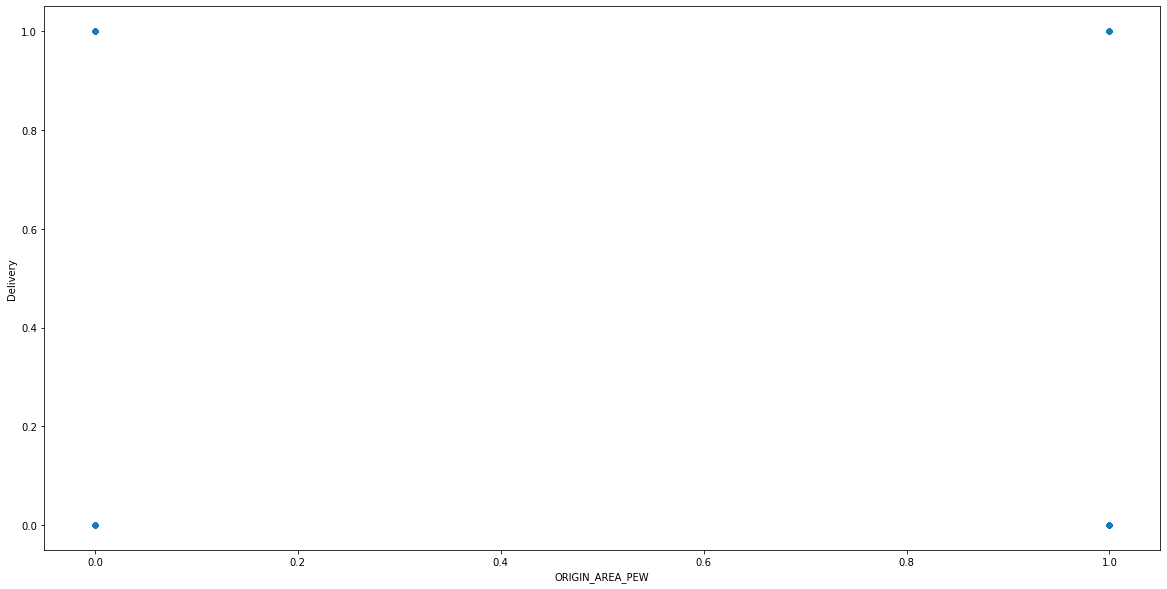

In [647]:
#ORIGIN_AREA_PEW
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_RWP
second column you want to relateDelivery
The Covariance is  [[0.01377367 0.00034777]
 [0.00034777 0.17324839]]
Spearman correlation: 0.01
Pearsons correlation: 0.01
The t-test value is -2412.96635281193
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.359

<AxesSubplot:xlabel='ORIGIN_AREA_RWP', ylabel='Delivery'>

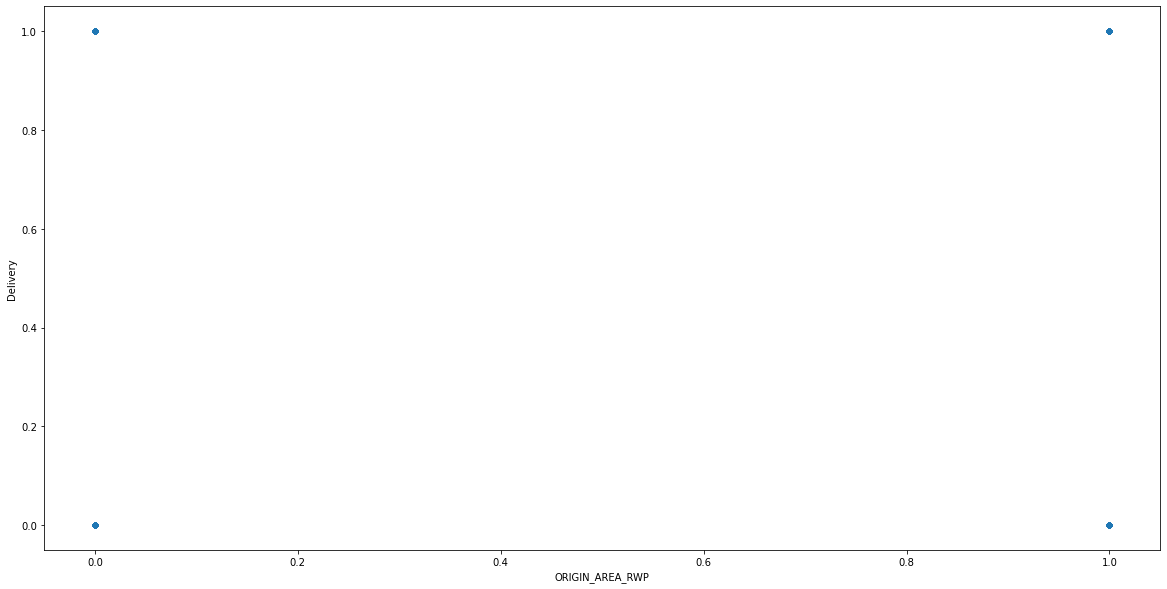

In [648]:
#ORIGIN_AREA_RWP
ANOVA(ohotdata)

first column you want to relateORIGIN_AREA_SKZ
second column you want to relateDelivery
The Covariance is  [[2.47519577e-04 1.61649603e-05]
 [1.61649603e-05 1.73248390e-01]]
Spearman correlation: 0.00
Pearsons correlation: 0.00
The t-test value is -2550.3099891557067
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.

<AxesSubplot:xlabel='ORIGIN_AREA_SKZ', ylabel='Delivery'>

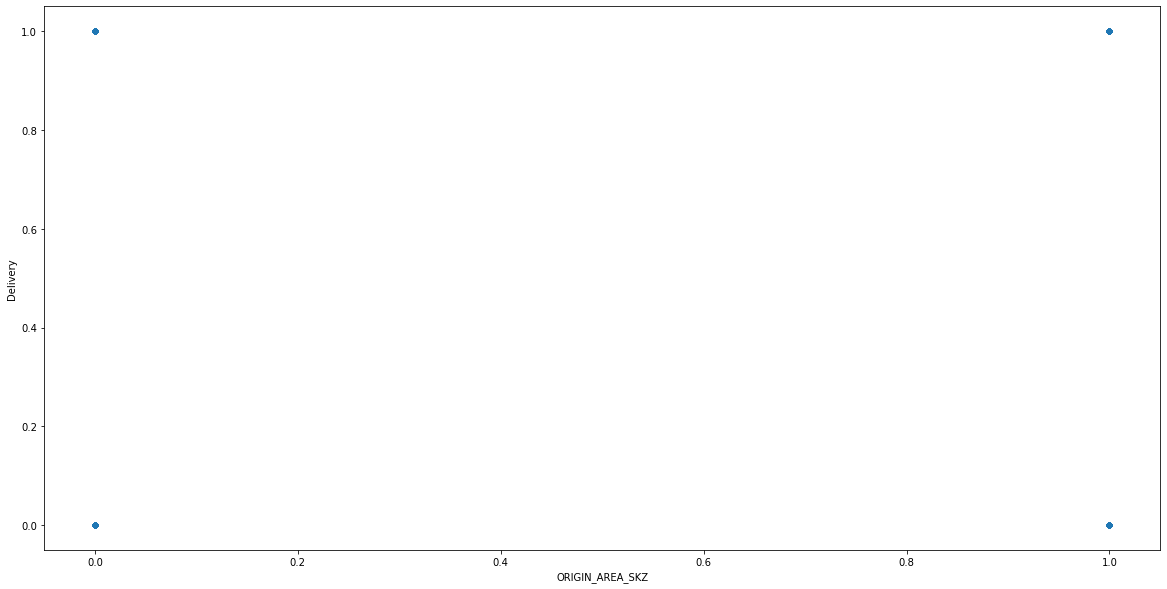

In [649]:
#ORIGIN_AREA_SKZ
ANOVA(ohotdata)

first column you want to relateAREA_FSD
second column you want to relateDelivery
The Covariance is  [[ 0.10179722 -0.00189197]
 [-0.00189197  0.17324839]]
Spearman correlation: -0.01
Pearsons correlation: -0.01
The t-test value is -1726.2181868049618
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35

<AxesSubplot:xlabel='AREA_FSD', ylabel='Delivery'>

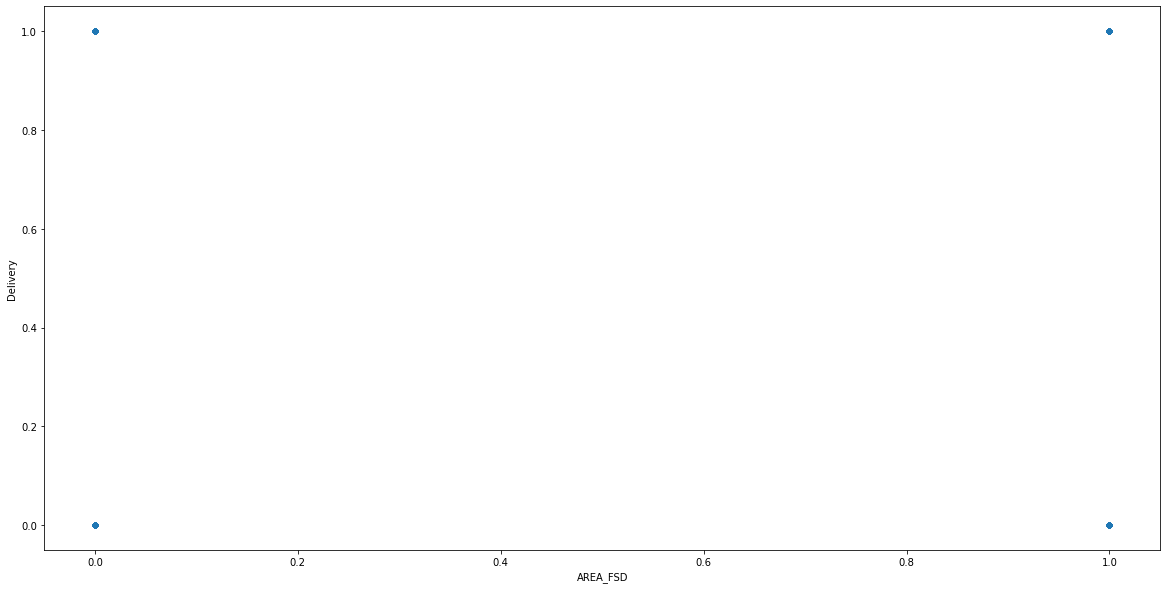

In [650]:
#AREA_FSD
ANOVA(ohotdata)

first column you want to relateAREA_GUJ
second column you want to relateDelivery
The Covariance is  [[ 0.08650122 -0.00627358]
 [-0.00627358  0.17324839]]
Spearman correlation: -0.05
Pearsons correlation: -0.05
The t-test value is -1828.3145601288854
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35

<AxesSubplot:xlabel='AREA_GUJ', ylabel='Delivery'>

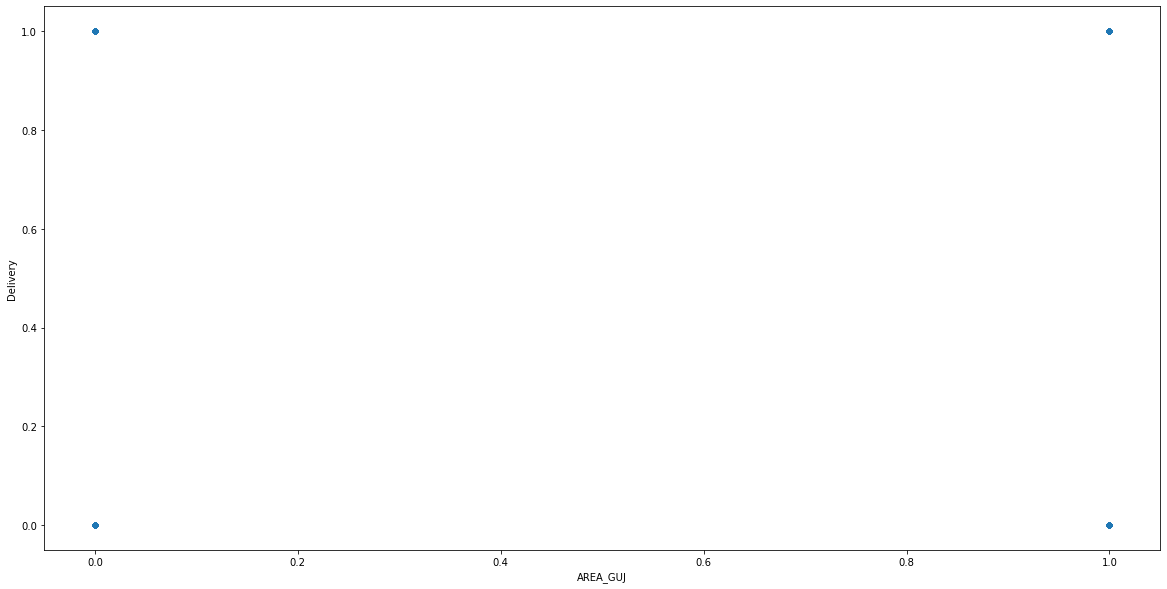

In [651]:
#AREA_GUJ
ANOVA(ohotdata)

first column you want to relateAREA_HDD
second column you want to relateDelivery
The Covariance is  [[0.09160631 0.0010132 ]
 [0.0010132  0.17324839]]
Spearman correlation: 0.01
Pearsons correlation: 0.01
The t-test value is -1793.7010768217065
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35953036

<AxesSubplot:xlabel='AREA_HDD', ylabel='Delivery'>

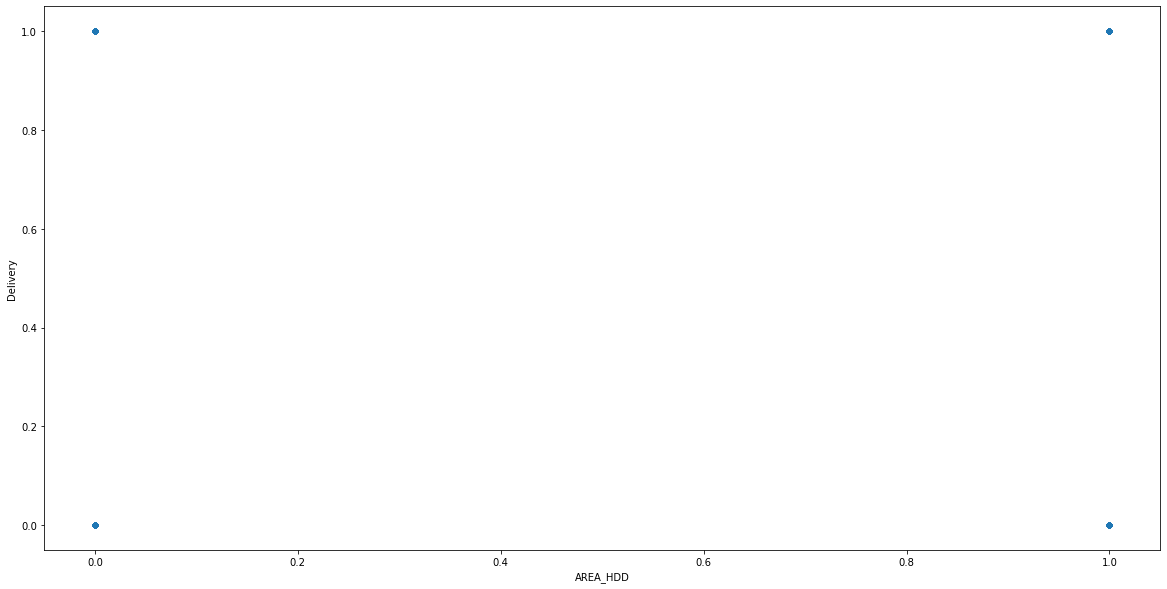

In [652]:
#AREA_HDD
ANOVA(ohotdata)

first column you want to relateAREA_ISB
second column you want to relateDelivery
The Covariance is  [[7.47405492e-02 1.60119216e-04]
 [1.60119216e-04 1.73248390e-01]]
Spearman correlation: 0.00
Pearsons correlation: 0.00
The t-test value is -1910.407745643511
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716

<AxesSubplot:xlabel='AREA_ISB', ylabel='Delivery'>

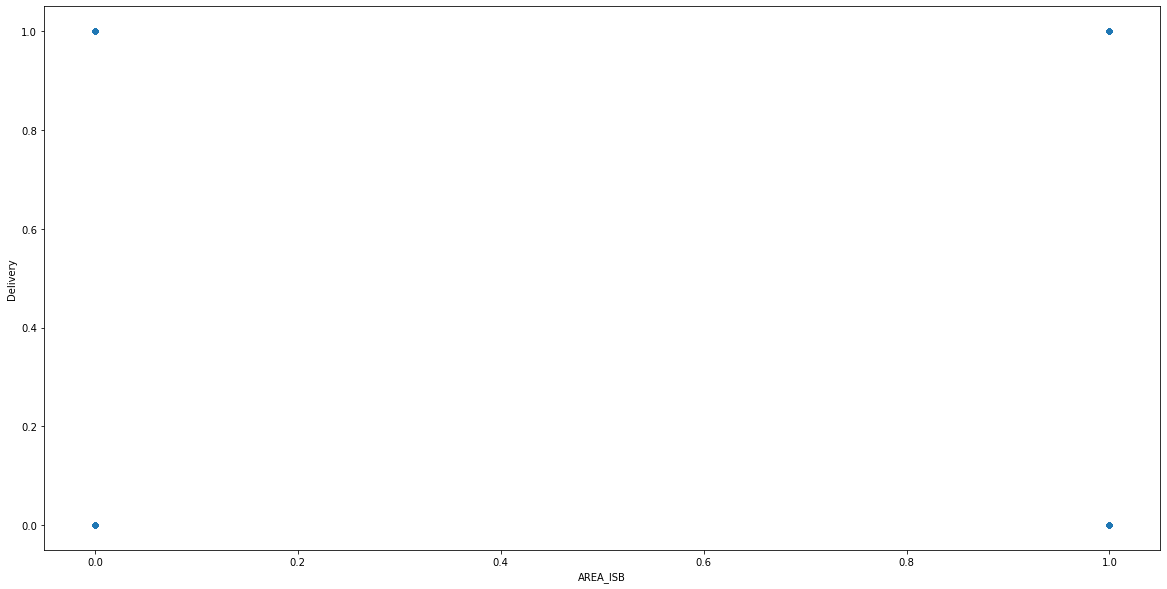

In [653]:
#AREA_ISB
ANOVA(ohotdata)

first column you want to relateAREA_KHI
second column you want to relateDelivery
The Covariance is  [[0.09401003 0.01094529]
 [0.01094529 0.17324839]]
Spearman correlation: 0.09
Pearsons correlation: 0.09
The t-test value is -1777.5977940737332
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35953036

<AxesSubplot:xlabel='AREA_KHI', ylabel='Delivery'>

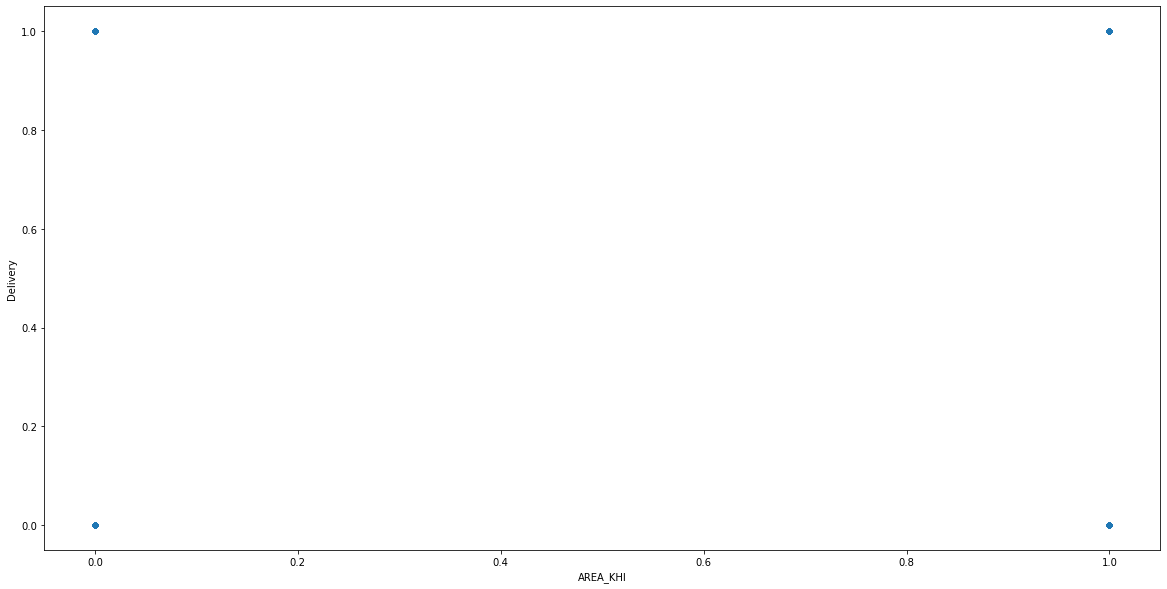

In [654]:
#AREA_KHI
ANOVA(ohotdata)

first column you want to relateAREA_LHE
second column you want to relateDelivery
The Covariance is  [[0.06133727 0.00326501]
 [0.00326501 0.16172421]]
Spearman correlation: 0.03
Pearsons correlation: 0.03
The t-test value is -2329.165765316232
The critical value of Chi-Square is 14925611816.128567
The p-value is 0.0
The degrees of freedom are 70113041
The expected values using the Chi-Square method are [[1.57469728e+00 5.41096563e+03 5.42877582e+00 ... 1.42859687e-01
  1.25003845e-01 3.14254318e-02]
 [9.33253171e-01 3.20683912e+03 3.21739443e+00 ... 8.46665944e-02
  7.40842296e-02 1.86244584e-02]
 [1.14982149e-01 3.95100993e+02 3.96401467e-01 ... 1.04314106e-02
  9.12760246e-03 2.29464021e-03]
 ...
 [4.07461014e-02 1.40011517e+02 1.40472365e-01 ... 3.69656782e-03
  3.23453873e-03 8.13149200e-04]
 [3.08442406e-01 1.05986800e+03 1.06335656e+00 ... 2.79825120e-02
  2.44850151e-02 6.15542805e-03]
 [8.51760968e-02 2.92681609e+02 2.93644970e-01 ... 7.72734588e-03
  6.76151522e-03 1.69981600e

<AxesSubplot:xlabel='AREA_LHE', ylabel='Delivery'>

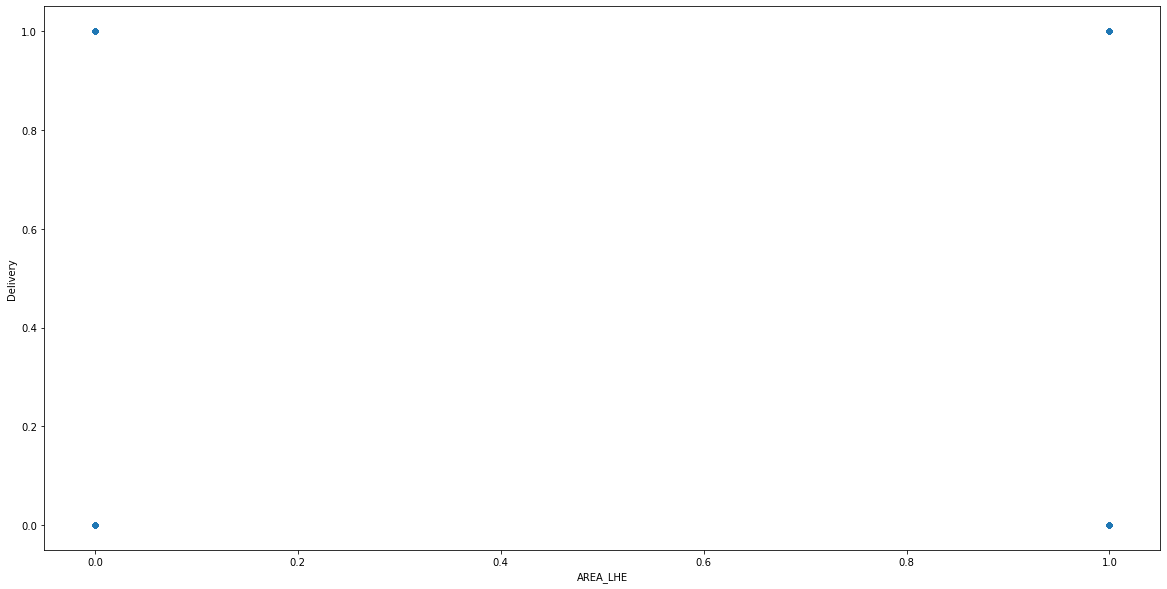

In [253]:
#AREA_LHE
ANOVA(ohotdata)

first column you want to relateAREA_MUX
second column you want to relateDelivery
The Covariance is  [[ 0.11358926 -0.0027469 ]
 [-0.0027469   0.17324839]]
Spearman correlation: -0.02
Pearsons correlation: -0.02
The t-test value is -1650.446430627976
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.359

<AxesSubplot:xlabel='AREA_MUX', ylabel='Delivery'>

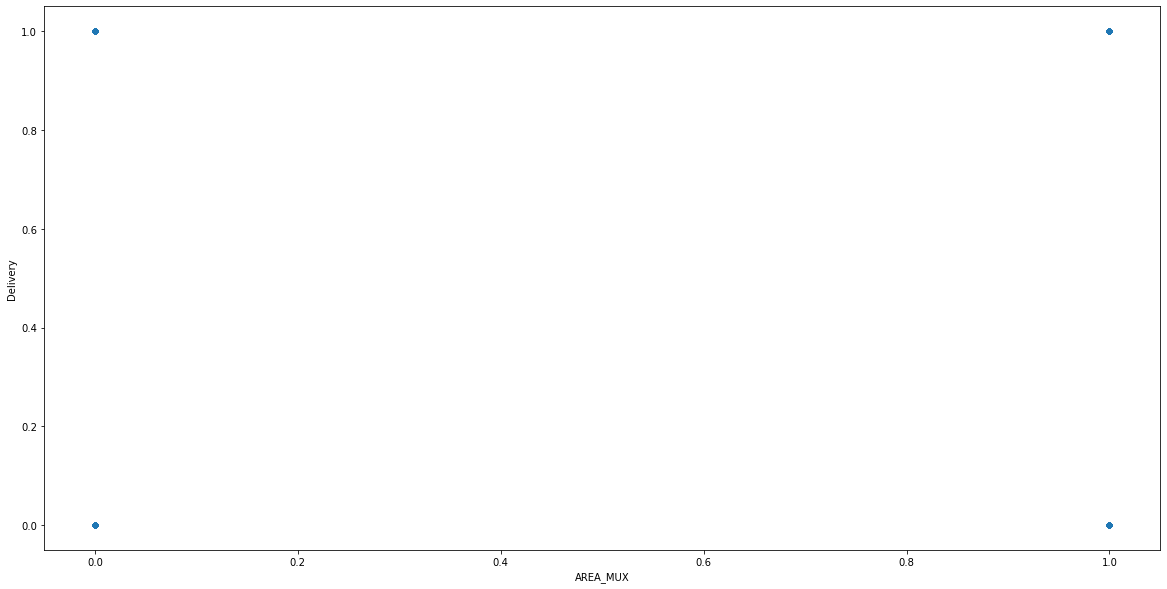

In [655]:
#AREA_MUX
ANOVA(ohotdata)

first column you want to relateAREA_PEW
second column you want to relateDelivery
The Covariance is  [[ 0.05977848 -0.00397514]
 [-0.00397514  0.17324839]]
Spearman correlation: -0.04
Pearsons correlation: -0.04
The t-test value is -2020.371443317659
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.359

<AxesSubplot:xlabel='AREA_PEW', ylabel='Delivery'>

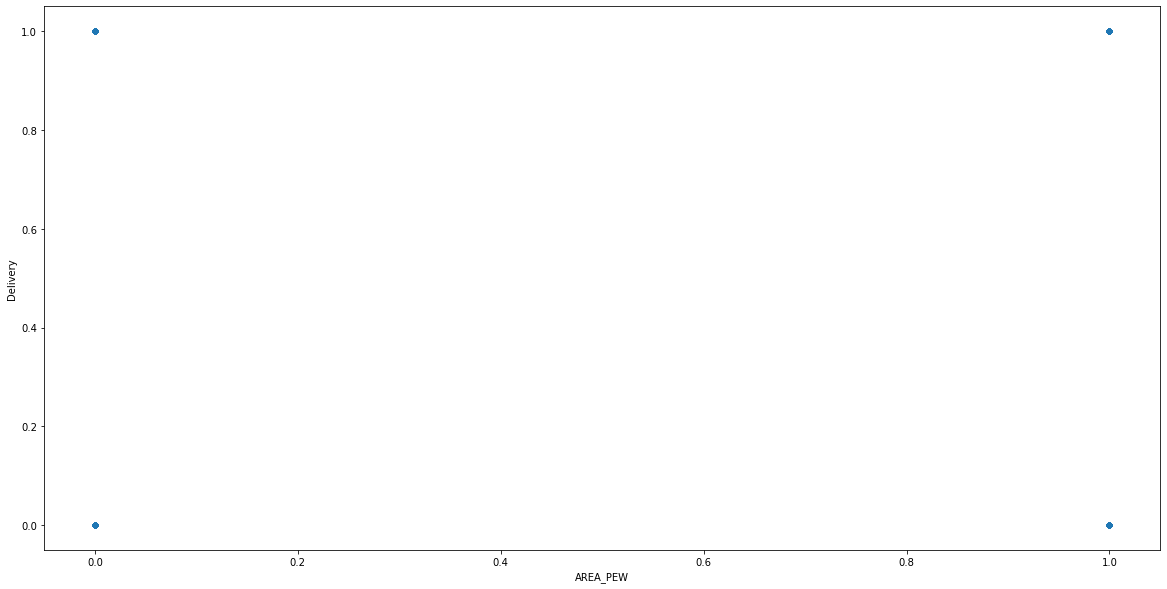

In [656]:
#AREA_PEW
ANOVA(ohotdata)

first column you want to relateAREA_RWP
second column you want to relateDelivery
The Covariance is  [[ 0.09753502 -0.00456552]
 [-0.00456552  0.17324839]]
Spearman correlation: -0.04
Pearsons correlation: -0.04
The t-test value is -1754.195398916278
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.359

<AxesSubplot:xlabel='AREA_RWP', ylabel='Delivery'>

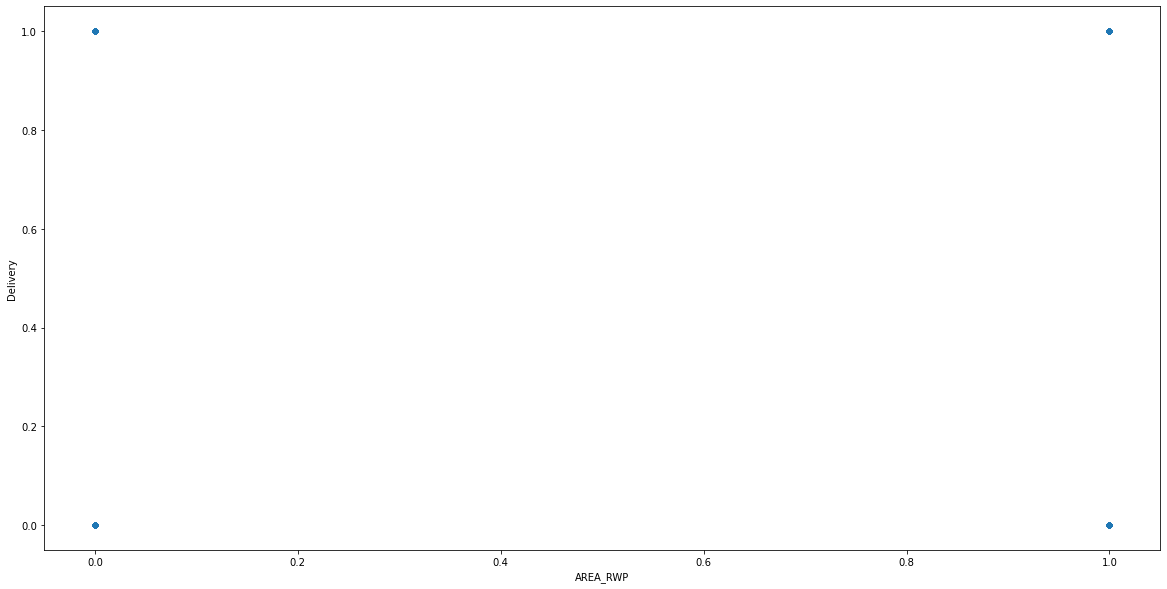

In [657]:
#AREA_RWP
ANOVA(ohotdata)

first column you want to relateAREA_SKZ
second column you want to relateDelivery
The Covariance is  [[0.0947989  0.00373172]
 [0.00373172 0.17324839]]
Spearman correlation: 0.03
Pearsons correlation: 0.03
The t-test value is -1772.3388902101465
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.35953036

<AxesSubplot:xlabel='AREA_SKZ', ylabel='Delivery'>

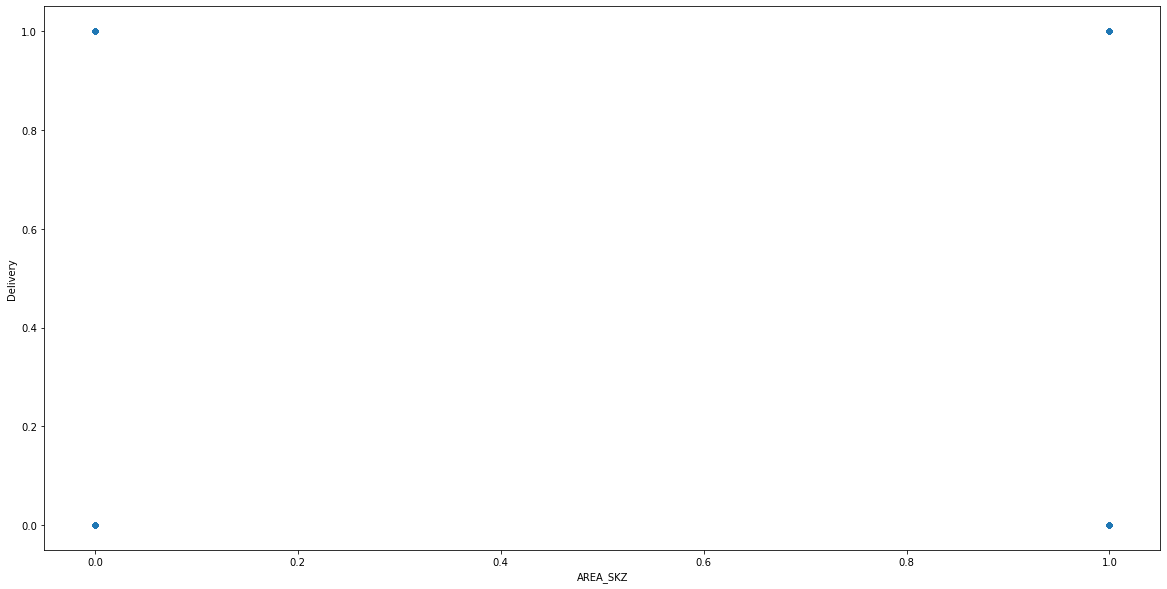

In [658]:
#AREA_SKZ
ANOVA(ohotdata)

first column you want to relateAREA_UET
second column you want to relateDelivery
The Covariance is  [[ 0.0237475  -0.00034135]
 [-0.00034135  0.17324839]]
Spearman correlation: -0.01
Pearsons correlation: -0.01
The t-test value is -2319.134940528189
The critical value of Chi-Square is 12592236505.988308
The p-value is 0.0
The degrees of freedom are 56102880
The expected values using the Chi-Square method are [[8.72458467e-02 1.01515618e-01 4.15882939e+02 ... 8.28065311e-03
  8.01695581e-03 1.84010022e-03]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 [8.48859736e+00 9.87697685e+00 4.04633912e+04 ... 8.05667350e-01
  7.80010883e-01 1.79032819e-01]
 ...
 [3.07478081e-02 3.57768635e-02 1.46568453e+02 ... 2.91832726e-03
  2.82539316e-03 6.48501339e-04]
 [2.33869692e-01 2.72120992e-01 1.11480854e+03 ... 2.21969740e-02
  2.14901116e-02 4.93254049e-03]
 [6.44602809e-02 7.50032868e-02 3.07268851e+02 ... 6.11803594e-03
  5.92320716e-03 1.359

<AxesSubplot:xlabel='AREA_UET', ylabel='Delivery'>

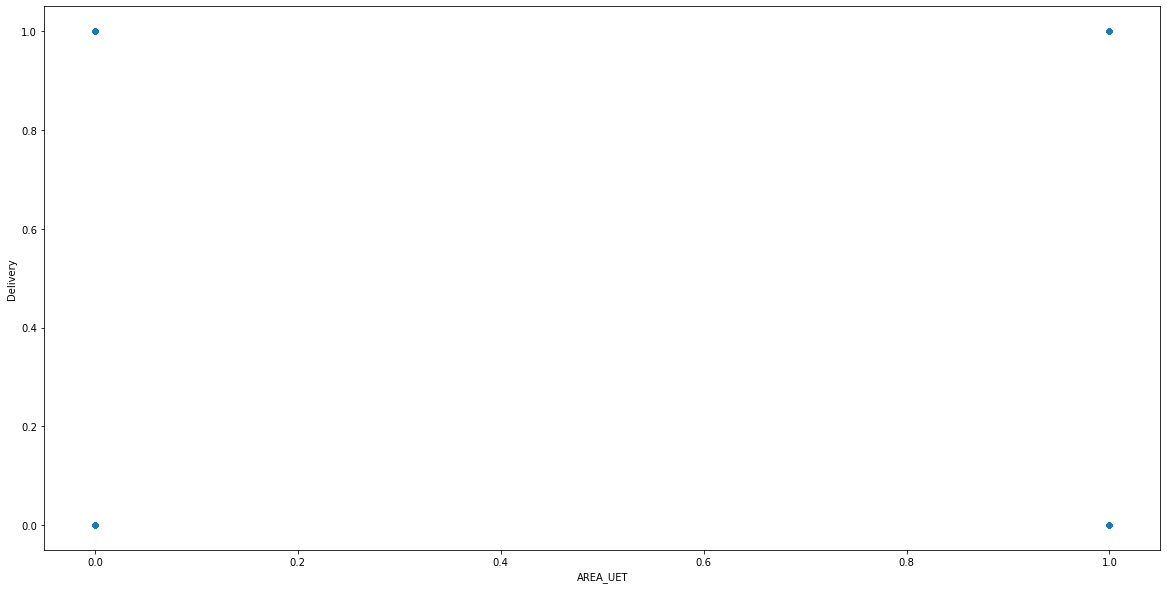

In [659]:
#AREA_UET
ANOVA(ohotdata)

The ANOVA tests have shown that the columns 'DIVISION', 'PR_TR', 'WTT_BKG', 'COD_ST', 'KPI', 'RO_TO_RS_LEAD_TIME' have slight to very high correlation with the label column (Delivery). 

Let's explore correlations further with heatmaps.

### HEATMAP

Heatmap colour?
vlag


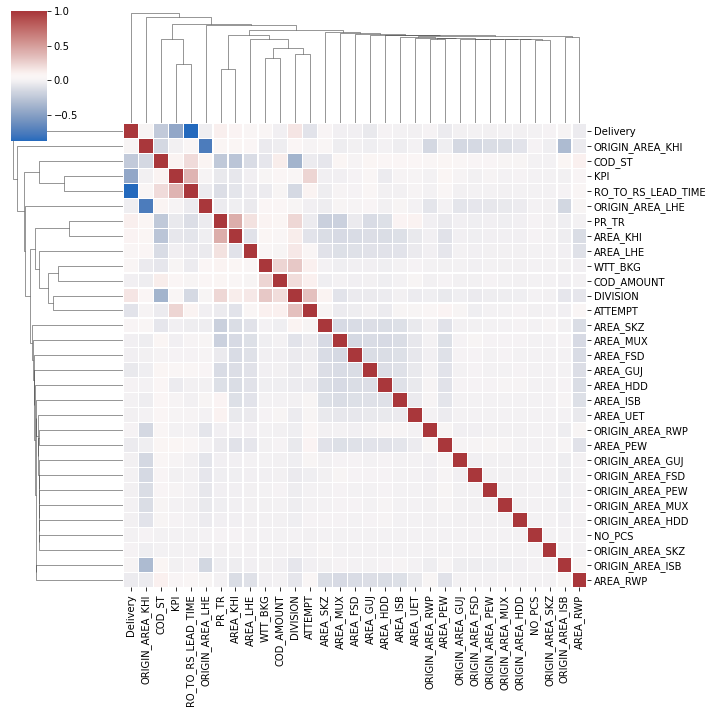

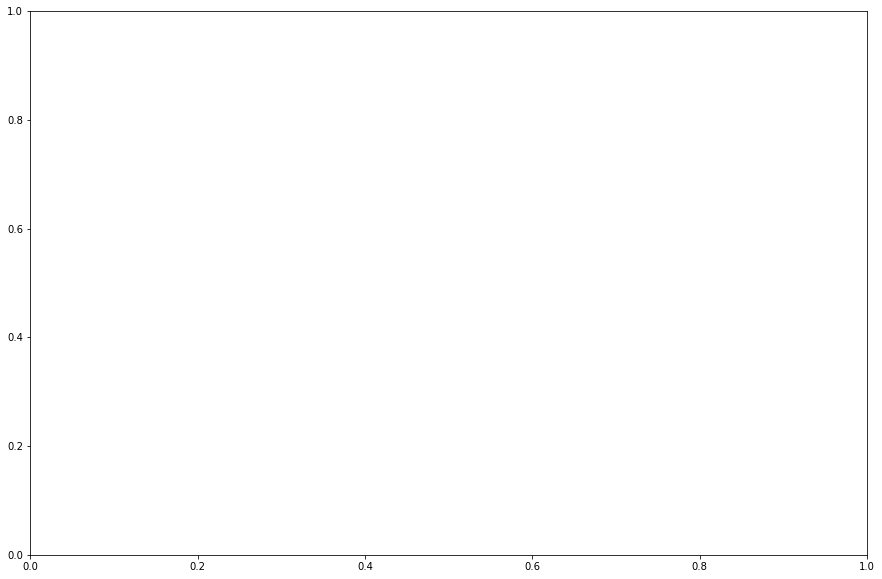

In [660]:
clheatmap(ohotdata)

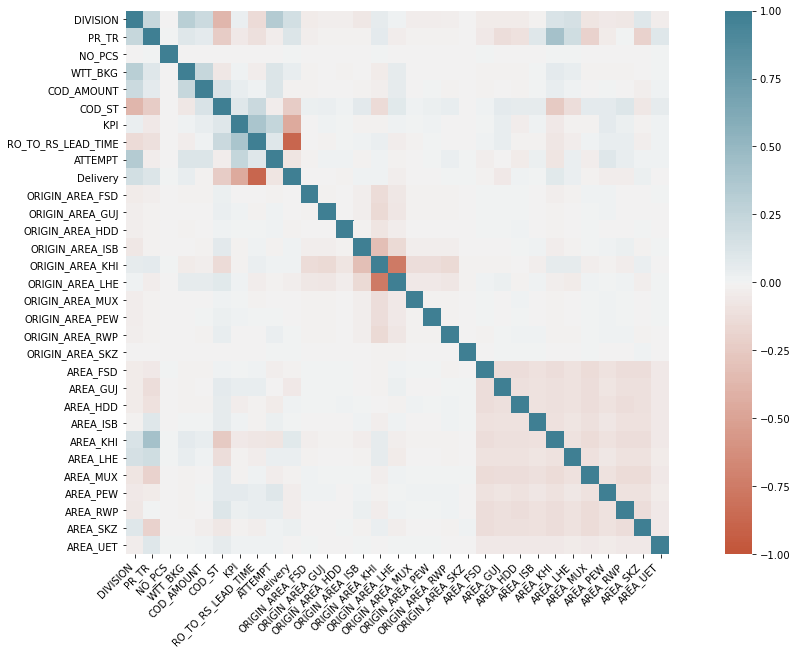

In [661]:
correlation_analysis(ohotdata)

The heatmaps confirm our previous hypothesis and show that the columns 'DIVISION', 'PR_TR', 'WTT_BKG', 'COD_ST', 'KPI', 'RO_TO_RS_LEAD_TIME' have slight to very high correlation with the label column (Delivery).

In [672]:
ohotdata

,DIVISION,PR_TR,NO_PCS,WTT_BKG,COD_AMOUNT,COD_ST,KPI,RO_TO_RS_LEAD_TIME,ATTEMPT,Delivery,...,AREA_GUJ,AREA_HDD,AREA_ISB,AREA_KHI,AREA_LHE,AREA_MUX,AREA_PEW,AREA_RWP,AREA_SKZ,AREA_UET
BKG_DAT,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2.0,2.0,8.0,1.0,490.0,1,6.0,1.0,2.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2019-01-31,2.0,1.0,1.0,89.0,49999.0,1,6.0,0.0,5.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2019-01-31,2.0,1.0,1.0,89.0,49999.0,1,6.0,0.0,5.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2019-01-31,2.0,1.0,1.0,89.0,49998.0,1,6.0,0.0,5.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2019-01-31,2.0,1.0,1.0,89.0,49998.0,1,6.0,0.0,5.0,1.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.0,1.0,1.0,0.5,217.0,1,6.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2019-12-30,1.0,1.0,1.0,0.5,278.0,1,6.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2019-12-30,1.0,1.0,1.0,0.5,168.0,1,6.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


### Categorical Analysis

Transforming a copy of the dataset to to categorical analysis.

In [47]:
catanalysisdata = ohotdata

In [674]:
catanalysisdata.set_index('Delivery', inplace= True)

In [676]:
catanalysisdata

,DIVISION,PR_TR,NO_PCS,WTT_BKG,COD_AMOUNT,COD_ST,KPI,RO_TO_RS_LEAD_TIME,ATTEMPT,ORIGIN_AREA_FSD,...,AREA_GUJ,AREA_HDD,AREA_ISB,AREA_KHI,AREA_LHE,AREA_MUX,AREA_PEW,AREA_RWP,AREA_SKZ,AREA_UET
Delivery,,,,,,,,,,,,,,,,,,,,,
0.0,2.0,2.0,8.0,1.0,490.0,1,6.0,1.0,2.0,0,...,0,0,0,1,0,0,0,0,0,0
1.0,2.0,1.0,1.0,89.0,49999.0,1,6.0,0.0,5.0,0,...,0,0,0,0,0,0,1,0,0,0
1.0,2.0,1.0,1.0,89.0,49999.0,1,6.0,0.0,5.0,0,...,0,0,0,0,0,0,1,0,0,0
1.0,2.0,1.0,1.0,89.0,49998.0,1,6.0,0.0,5.0,0,...,0,0,0,0,0,0,1,0,0,0
1.0,2.0,1.0,1.0,89.0,49998.0,1,6.0,0.0,5.0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.0,1.0,1.0,1.0,0.5,217.0,1,6.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1.0,1.0,1.0,1.0,0.5,278.0,1,6.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1.0,1.0,1.0,1.0,0.5,168.0,1,6.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0


which column do you want to analyze? Press enter if you want to analyze the entire dataset.


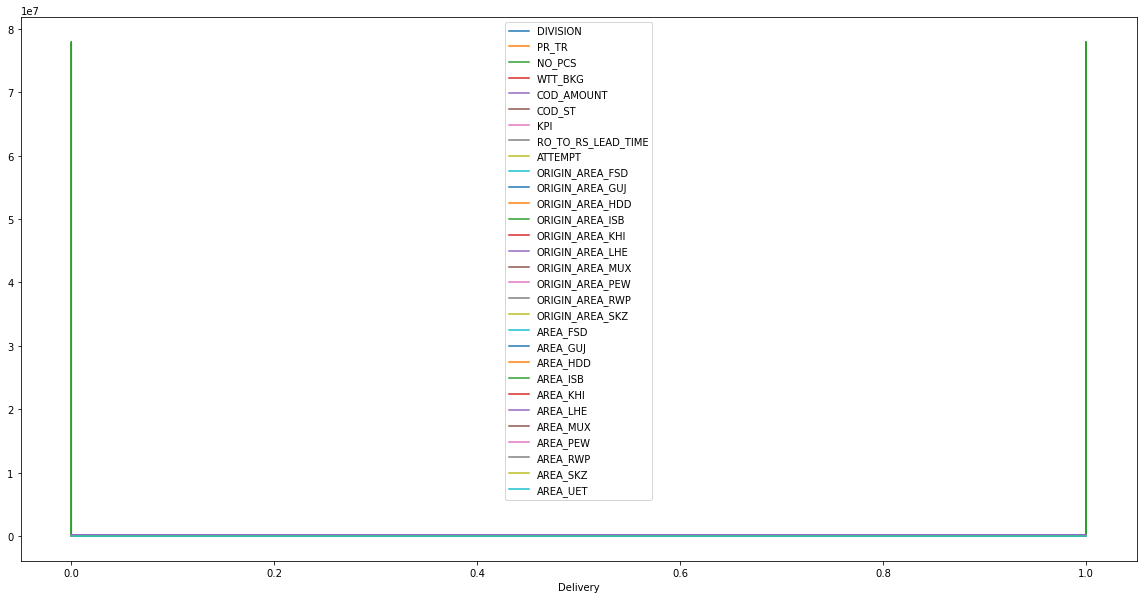

what type of fit do you want the qqplot to be? (None, 45, s, r, or q)
45


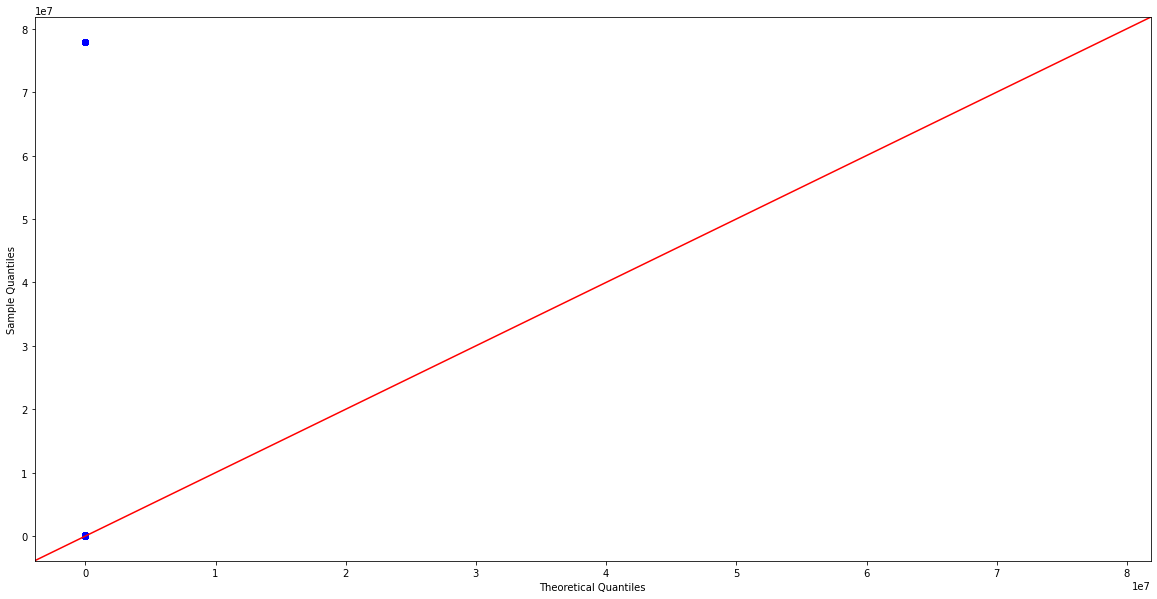

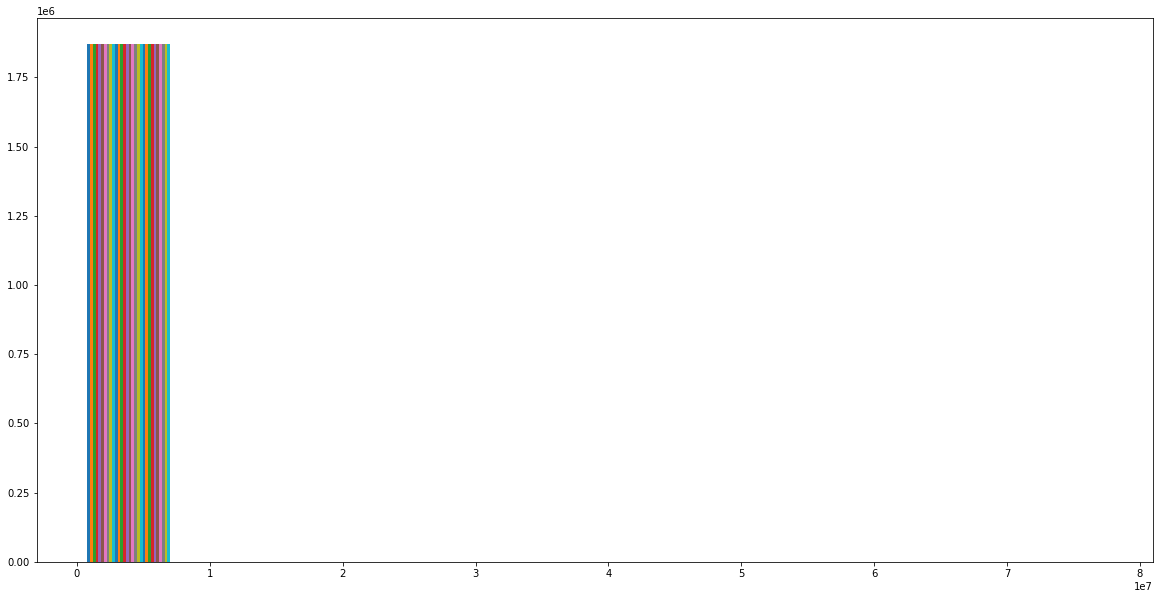

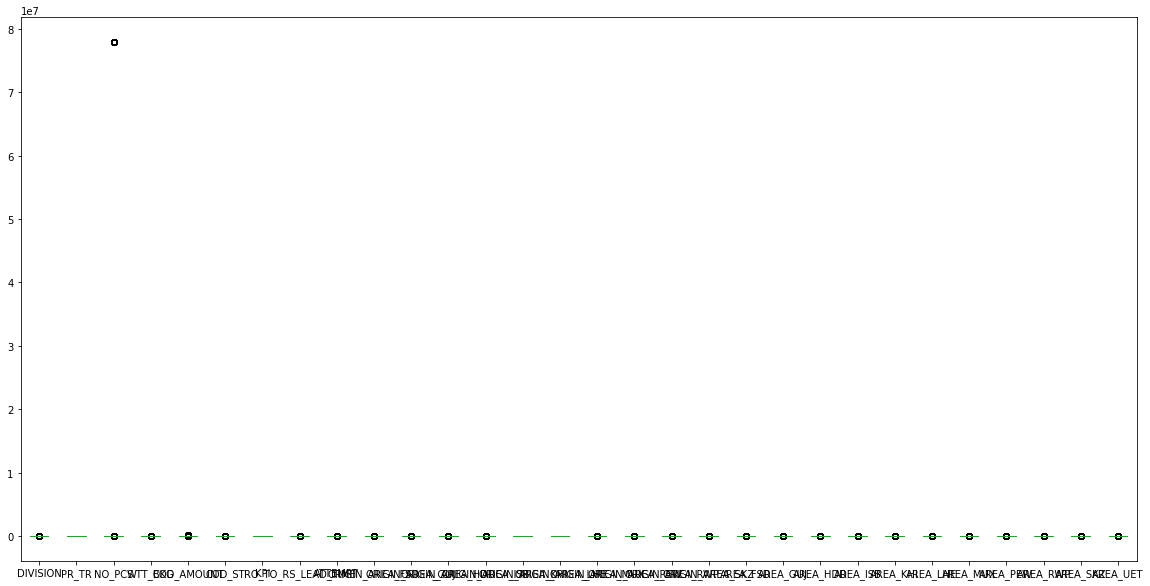

[  1.9167032    0.6624025  119.01429152  78.50752953  10.74947388
  -1.41862535  -0.30391703   2.18554728   1.28586287   8.96401219
   8.22695089  15.92161457   3.59869428  -0.45838405   1.0756863
  10.57464843  10.27787985   8.28265099  63.53020259   2.41318376
   2.74964303   2.62988298   3.06261738   2.57627022   3.48075073
   2.19172396   3.56769338   2.50054664   2.55903319   6.1733076 ]
Not normally skewed data
[ 1.67375116e+00 -1.56122293e+00  1.41624016e+04  1.86370786e+04
  1.52564658e+02  1.24978837e-02 -1.72864190e+00  4.14388619e+00
  1.98093094e+00  7.83535145e+01  6.56827209e+01  2.51497811e+02
  1.09506005e+01 -1.78988406e+00 -8.42898980e-01  1.09823189e+02
  1.03634814e+02  6.66023074e+01  4.03408664e+03  3.82345585e+00
  5.56053681e+00  4.91628449e+00  7.37962519e+00  4.63716827e+00
  1.01156256e+01  2.80365393e+00  1.07284360e+01  4.25273352e+00
  4.54865086e+00  3.61097268e+01]
Not normal Kurtosis


In [677]:
cat_analysis(catanalysisdata)

## Manual Feature Selection by Way of Statistical Tests

It is clear from the basic correlation analysis of the dataset that nearly all the variables have very little, if any direct correlation to the label (Delivery). 

#### Skewness and Kurtosis

The data is not normally skewed, neither does it have normal kurtosis. This is obvious from the class imbalance present in the data, as values showing successfully delivered packages are 3-3.5 times more numerous than values showing returns or unsuccessful deliveries. 

#### Chi-Square Test

The Chi-Square test reveals that all of the predictors have some relation, however little, to the label. 

#### T-Test

The t-test values for all the ANOVA tests are significantly high, showing that there is a significant difference between the means of the populations related. 

#### P-Value

The p-value for EVERY SINGLE predictor-label relation is 0. This shows that there is a statistically significant relation between the predictors and label, and that the relations between them didn't emerge by chance. 

#### Heatmaps 

The heatmaps tell a story congruent to the statistical tests. They highlight all the features singled out by the statistical tests as slightly or highly related to the label column (Delivery). 

Based on all these results including scatter graphs, spearman/pearson correlation scores and correlation analysis (correlation heat map). I have been able to single out a few predictors which are more related to the label than the others.
They are:

##### 'DIVISION' 
##### 'PR_TR'
##### 'WTT_BKG' 
##### 'COD_ST' 
##### 'KPI' 
##### 'RO_TO_RS_LEAD_TIME'

"RO_TO_RS_LEAD_TIME": The Star of the Show/The Devil's Advocate

This predictor in particular, has a very high relation with the label column (Delivery). This is very logical and quite obvious. RO_TO_RS_LEAD_TIME is a measure of how many days it will take for the shipper to receive the returned package after it has been rejected or returned by the customer. 

Thus, it's not really a predictor of returns; it is in fact a column that is populated as a RESULT of the 'label' column. Its inclusion will result in a model that is useless without it. 

This feature is most probably what led to the overfitting of data in the previous iteration of our algorithmic analysis. 

So we will not include the RO_TO_RS_LEAD_TIME in the prediction process any longer. 

In [53]:
#Choosing predictors for algorithmic analysis
analysisdata = ohotdata[['DIVISION', 'PR_TR', 'WTT_BKG', 'COD_ST', 'KPI', 'Delivery']]

In [49]:
analysisdata.to_csv('fsdata.csv')
#saving for later

In [50]:
analysisdata

,DIVISION,PR_TR,WTT_BKG,COD_ST,KPI,Delivery
BKG_DAT,,,,,,
2019-01-01,2.0,2.0,1.0,1,6.0,0.0
2019-01-31,2.0,1.0,89.0,1,6.0,1.0
2019-01-31,2.0,1.0,89.0,1,6.0,1.0
2019-01-31,2.0,1.0,89.0,1,6.0,1.0
2019-01-31,2.0,1.0,89.0,1,6.0,1.0
...,...,...,...,...,...,...
2019-12-24,1.0,1.0,0.5,1,6.0,1.0
2019-12-30,1.0,1.0,0.5,1,6.0,1.0
2019-12-30,1.0,1.0,0.5,1,6.0,1.0


### Splitting Dataset to Run Algorithms

In [51]:
data=splitting(analysisdata)

What is the label columnDelivery


In [52]:
Xfs_train = data[0]
Xfs_test = data[1]
yfs_train = data[2]
yfs_test = data[3]

# Basic Analysis After Feature Selection

Let's see what effect feature selection has on the performance of the aforementioned algorithms. 

### Gaussian Naive Bayes Analysis

In [40]:
NVB(Xfs_train, Xfs_test, yfs_train, yfs_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 0.]
The number of mislabeled points out of a total 617133 points : 138813
The Confusion Matrix is
 [[122032  15277]
 [123536 356288]]
The Accuracy Score is
 77.50679351128525
The Precision is 95.88847173442062
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.50      0.89      0.64    137309
         1.0       0.96      0.74      0.84    479824

    accuracy                           0.78    617133
   macro avg       0.73      0.82      0.74    617133
weighted avg       0.86      0.78      0.79    617133

The LogLoss is 7.768898087052023
The Area Under the Curve is 0.8156394630673339
The Recall Score is 74.25389309413451
The Specificity is [0.      0.11126 1.     ] and the Sensitivity is [0.         0.74253893 1.        ]
The F-Score is 0.8369570196467185


### KNN Classifier
I am choosing a 3-NN analysis since it is a safe option, and also since high values of K will result in a computationally intensive operation for which my system is unable. 

Online research showed that a good way to select K is by the formula:

K= sqrt(number of neighbours)

However, this would've yielded k = 1.414 which doesn't make sense for this analysis. 

Hence, I used the other rule of thumb for separating 2 classes in KNN, which was to select an odd number (3). 

In [41]:
KNNalgo(Xfs_train, Xfs_test, yfs_train, yfs_test)

How many neighbours do you want?3
[[ 29548 107761]
 [ 39166 440658]]
              precision    recall  f1-score   support

         0.0       0.43      0.22      0.29    137309
         1.0       0.80      0.92      0.86    479824

    accuracy                           0.76    617133
   macro avg       0.62      0.57      0.57    617133
weighted avg       0.72      0.76      0.73    617133

These are the predicted values:  [1. 1. 1. ... 1. 1. 0.]
The Confusion Matrix is
 [[ 29548 107761]
 [ 39166 440658]]
The Accuracy Score is
 76.19200399265637
The Precision is 80.35060783816753
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.43      0.22      0.29    137309
         1.0       0.80      0.92      0.86    479824

    accuracy                           0.76    617133
   macro avg       0.62      0.57      0.57    617133
weighted avg       0.72      0.76      0.73    617133

The LogLoss is 8.223130127207131
The Area Under the Cu

### Support Vector Machine
supvec(Xfs_train, Xfs_test, yfs_train, yfs_test)

this one took too long to implement (>7 hours); had to restart the kernel

### eXtreme Gradient Boosting (XGBoost)

In [42]:
boostaway(Xfs_train, Xfs_test, yfs_train, yfs_test)

[22:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[ 87108  50201]
 [ 75882 403942]]
The Accuracy Score is
 79.56955793969857
The Precision is 88.94599278200918
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.53      0.63      0.58    137309
         1.0       0.89      0.84      0.87    479824

    accuracy                           0.80    617133
   macro avg       0.71      0.74      0.72    617133
weighted avg       0.81      0.80      0.80    617133

The LogLoss is 7.056489743361831
The Area Under the Curve is 0.7381242357371653
The Recall Score is 84.18545133215513
The Specificity is [0.

### Adaptive Gradient Boosting

In [43]:
ada(Xfs_train, Xfs_test, yfs_train, yfs_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[ 70800  66509]
 [ 60243 419581]]
The Accuracy Score is
 79.46115343045989
The Precision is 86.31755436236088
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.54      0.52      0.53    137309
         1.0       0.86      0.87      0.87    479824

    accuracy                           0.79    617133
   macro avg       0.70      0.70      0.70    617133
weighted avg       0.79      0.79      0.79    617133

The LogLoss is 7.093952464109363
The Area Under the Curve is 0.6950365277725814
The Recall Score is 87.44477141618594
The Specificity is [0.         0.48437466 1.        ] and the Sensitivity is [0.         0.87444771 1.        ]
The F-Score is 0.8687750669314246


### Random Forest

In [44]:
RandFor(Xfs_train, Xfs_test, yfs_train, yfs_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[ 86691  50618]
 [ 75482 404342]]
The Accuracy Score is
 79.56680326607068
The Precision is 88.87418674169157
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.53      0.63      0.58    137309
         1.0       0.89      0.84      0.87    479824

    accuracy                           0.80    617133
   macro avg       0.71      0.74      0.72    617133
weighted avg       0.81      0.80      0.80    617133

The LogLoss is 7.0574417142187436
The Area Under the Curve is 0.7370225823043379
The Recall Score is 84.26881523225182
The Specificity is [0.         0.36864299 1.        ] and the Sensitivity is [0.         0.84268815 1.        ]
The F-Score is 0.8651025263590305


### Multilayer Perceptron

In [45]:
Perceptron(Xfs_train, Xfs_test, yfs_train, yfs_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Perceptron score is 0.7945008795144952
The Confusion Matrix is
 [[ 87320  49989]
 [ 76860 402964]]
The Accuracy Score is
 79.4454355868184
The Precision is 88.96375562144416
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.53      0.64      0.58    137309
         1.0       0.89      0.84      0.86    479824

    accuracy                           0.79    617133
   macro avg       0.71      0.74      0.72    617133
weighted avg       0.81      0.79      0.80    617133

The LogLoss is 7.099359810598303
The Area Under the Curve is 0.7378770935017973
The Recall Score is 83.98162659641869
The Specificity is [0.         0.36406208 1.        ] and the Sensitivity is [0.         0.83981627 1.        ]
The F-Score is 0.8640092969702297


### Logistic Regression

In [91]:
LogisticRegression(Xfs_train, Xfs_test, yfs_train, yfs_test)

These are the predicted values:  [1. 1. 1. ... 0. 1. 1.]
The Confusion Matrix is
 [[ 51803  31588]
 [ 45091 245538]]
The Accuracy Score is
 79.4986899096305
The Precision is 88.6015747349581
The Classification Report is               precision    recall  f1-score   support

         0.0       0.53      0.62      0.57     83391
         1.0       0.89      0.84      0.86    290629

    accuracy                           0.79    374020
   macro avg       0.71      0.73      0.72    374020
weighted avg       0.81      0.79      0.80    374020

The LogLoss is 7.080969180442174
The Area Under the Curve is 0.7330282163989394
The Recall Score is 84.48503074366288
The Specificity is [0.         0.37879387 1.        ] and the Sensitivity is [0.         0.84485031 1.        ]
The F-Score is 0.8649435055613777


### LightGBM

In [53]:
light(Xfs_train, Xfs_test, yfs_train, yfs_test)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[ 86893  50416]
 [ 75677 404147]]
The Accuracy Score is
 79.56793754344687
The Precision is 88.9089081161467
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.53      0.63      0.58    137309
         1.0       0.89      0.84      0.87    479824

    accuracy                           0.80    617133
   macro avg       0.71      0.74      0.72    617133
weighted avg       0.81      0.80      0.80    617133

The LogLoss is 7.057049686967821
The Area Under the Curve is 0.7375549500221419
The Recall Score is 84.22817533095468
The Specificity is [0.         0.36717185 1.        ] and the Sensitivity is [0.         0.84228175 1.        ]
The F-Score is 0.8650527030020752


### Decision Tree

In [109]:
DecTree(Xfs_train, Xfs_test, yfs_train, yfs_test)

These are the predicted values:  [1. 1. 1. ... 0. 1. 1.]
The Confusion Matrix is
 [[ 43126  40265]
 [ 39151 251478]]
The Accuracy Score is
 78.7669108603818
The Precision is 86.19846920063206
The Classification Report is               precision    recall  f1-score   support

         0.0       0.52      0.52      0.52     83391
         1.0       0.86      0.87      0.86    290629

    accuracy                           0.79    374020
   macro avg       0.69      0.69      0.69    374020
weighted avg       0.79      0.79      0.79    374020

The LogLoss is 7.3337352600629755
The Area Under the Curve is 0.6912214325767215
The Recall Score is 86.5288735810948
The Specificity is [0.         0.48284587 1.        ] and the Sensitivity is [0.         0.86528874 1.        ]
The F-Score is 0.8636335538109663


### Conclusion of Basic Analysis With Manual Feature Selection
At the moment all of the classification algorithms we are running are giving results of varying accuracy and precision. 

#### Highest Precision: Naive Bayes Analysis (95.88%)

#### Highest Recall: KNN Method (91.837%)

#### Highest Area Under the Curve: Naive Bayes Analysis (0.815)

#### Highest Accuracy: LightGBM, Random Forest, Logistic Regression (79.57%)

While these are not bad results in and of themselves, at the moment there is severe class imbalance in the dataset, as identified earlier and as demonstrated below. 

In [54]:
analysisdata['Delivery'].value_counts()

1.0    1453142
0.0     416955
Name: Delivery, dtype: int64

It is evident here that the number of returns or non-deliveries (0) are nearly a third of the values in the dataset compared to the number of successful deliveries (1) which comprise nearly 3 times the number of the values in the dataset.

To address this problem, we will first regularize the dataset. 

To address class imbalance, we can apply StratifiedKFold cross validation, which automatically addresses class imbalance. 

## Regularization

In [55]:
#for regularization, we need to split the dataset into predictors and labels
X = analysisdata.drop(['Delivery'], axis=1)
y = analysisdata['Delivery']

In [48]:
regularize(Xfs_train, Xfs_test, yfs_train, yfs_test, X,y)
#for some reason the regularization algorithm isn't working within the function. Implementing it outside of function

Which regularization do you want to implement (lasso, ridge, lin regression, log regression)?lasso


ValueError: Found input variables with inconsistent numbers of samples: [1252964, 617133]

### Linear Regression Regularization

In [58]:
model = LR()
model.fit(Xfs_train, yfs_train)
linscore = model.score(Xfs_test, yfs_test)
print('The regularization score with Linear Regression is', linscore, '.')
liny_pred = model.fit(Xfs_train, yfs_train).predict(Xfs_test)
print("These are the predicted values: ", liny_pred)

The regularization score with Linear Regression is 0.7906990635241193 .
These are the predicted values:  [1.01937839 0.10848085 0.96532315 ... 1.0208592  0.96186034 0.9039913 ]


### Logistic Regression

In [57]:
model = LogR()
model.fit(Xfs_train, yfs_train)
logscore = model.score(Xfs_test, yfs_test)
print('The regularization score with Logistic Regression is', logscore, '.')
logy_pred = model.fit(Xfs_train, yfs_train).predict(Xfs_test)
print("These are the predicted values: ", logy_pred)

The regularization score with Logarithmic Regression is 0.776628376703239 .
These are the predicted values:  [1. 1. 1. ... 1. 1. 1.]


### Lasso Regularization

In [59]:
cross_val_scores_lasso = []
alpha = []
for i in range(1, 9):
    model = lso(alpha = i * 0.25, tol=0.0925)
    model.fit(Xfs_train, yfs_train)
    scores = cvl(model, X,y, cv = 10)
    lsoavg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(lsoavg_cross_val_score)
    alpha.append(i * 0.25)
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))
    lassochosen = lso(alpha = alpha[cross_val_scores_lasso.index(max(cross_val_scores_lasso))], tol = 0.0925)
    lassochosen.fit(Xfs_train, yfs_train)
print('The regularization score of the Lasso model is', lassochosen.score(X_test, y_test))
lsoy_pred = lassochosen.fit(Xfs_train, yfs_train).predict(Xfs_test)
print("These are the predicted values: ", lsoy_pred)

0.25 : 5.142170822290337
0.5 : -4.955638492675194
0.75 : -4.959945279658897
1.0 : -4.959945279658897
1.25 : -4.959945279658897
1.5 : -4.959945279658897
1.75 : -4.959945279658897
2.0 : -4.959945279658897
The regularization score of the Lasso model is 0.5912249158138239
These are the predicted values:  [0.86613165 0.46593352 0.86797327 ... 0.86600225 0.86619737 0.86582027]


### Ridge Regression

In [102]:
cross_val_scores_ridge = []
alpha = []
for i in range(1, 9):
    model = rdg(alpha = i * 0.25)
    model.fit(Xfs_train, yfs_train)
    scores = cvl(model, X, y, cv = 10)
    ridgeavg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(ridgeavg_cross_val_score)
    alpha.append(i * 0.25)
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))
    rdgchosen = rdg(alpha = alpha[cross_val_scores_ridge.index(max(cross_val_scores_ridge))])
    rdgchosen.fit(Xfs_train, yfs_train)
print('The regularization score of the Ridge model is', rdgchosen.score(X_test, y_test))
rdgy_pred = rdgchosen.fit(Xfs_train, yfs_train).predict(Xfs_test)
print("These are the predicted values: ", rdgy_pred)

0.25 : 16.52028414261329
0.5 : 16.520283651384972
0.75 : 16.520283160151635
1.0 : 16.520282668913282
1.25 : 16.52028217766989
1.5 : 16.52028168642149
1.75 : 16.520281195168053
2.0 : 16.520280703909602
The regularization score of the Ridge model is 0.7906990635297718
These are the predicted values:  [1.01937831 0.10848099 0.96532307 ... 1.02085907 0.96186038 0.90399119]


#### Visualizing Regression Scores

Linear Regreesion : 0.7906990635241193
Logistic Regreesion : 0.776628376703239
Ridge Regreesion : 0.7906990635297718
Lasso Regression : 0.5912249158138239


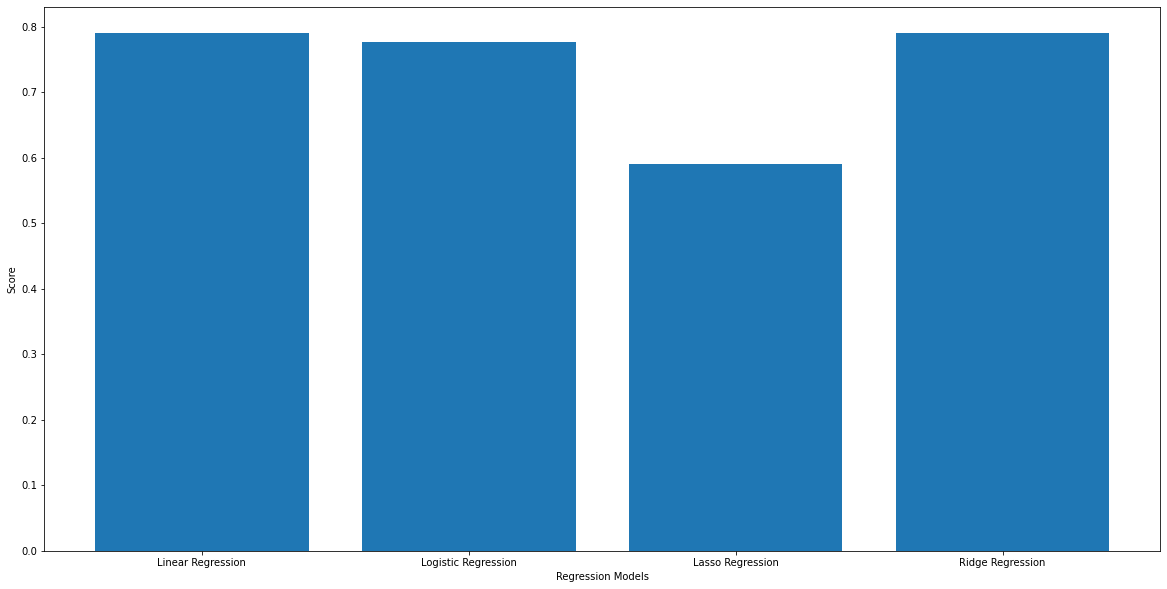

In [61]:
models = ['Linear Regression', 'Logistic Regression', 'Lasso Regression', 'Ridge Regression']
scores = [linscore, logscore, lassochosen.score(Xfs_test, yfs_test), rdgchosen.score(Xfs_test, yfs_test)]

mapping = {}
mapping['Linear Regreesion'] = linscore
mapping['Logistic Regreesion'] = logscore
mapping['Ridge Regreesion'] = rdgchosen.score(Xfs_test, yfs_test)
mapping['Lasso Regression'] = lassochosen.score(Xfs_test, yfs_test)

# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

Though Ridge and Linear Regression win out here, the preferred method of choice is Logistic Regression. It is the only method that is able to regularize the data and put out binary values. Other methods are putting out continuous values. 

For the sake of this analysis, we will use Logistic Regression.

### Applying Algorithms
We will used the regularized dataset with the new set of predictions (logy_pred) through Logistic Regression and apply them to classification algorithms.

In [104]:
#Preparing predicted values from Logistic Regression for algorithms
logy_pred

array([1., 1., 1., ..., 1., 1., 1.])

### Gaussian Naive Bayes Analysis

In [105]:
NVB(Xfs_train, Xfs_test, yfs_train, logy_pred)

These are the predicted values:  [1. 1. 1. ... 1. 1. 1.]
The number of mislabeled points out of a total 617133 points : 4406
The Confusion Matrix is
 [[  2182    321]
 [  4085 610545]]
The Accuracy Score is
 99.28605341150126
The Precision is 99.9474516506075
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.35      0.87      0.50      2503
         1.0       1.00      0.99      1.00    614630

    accuracy                           0.99    617133
   macro avg       0.67      0.93      0.75    617133
weighted avg       1.00      0.99      0.99    617133

The LogLoss is 0.2465888316890398
The Area Under the Curve is 0.9325538101654485
The Recall Score is 99.33537250052878
The Specificity is [0.        0.1282461 1.       ] and the Sensitivity is [0.         0.99335373 1.        ]
The F-Score is 0.9964047210272413


### KNN Method 

In [84]:
KNNalgo(Xfs_train, Xfs_test, yfs_train, logy_pred)

How many neighbours do you want?3
[[ 68618  28276]
 [ 28503 248623]]
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71     96894
         1.0       0.90      0.90      0.90    277126

    accuracy                           0.85    374020
   macro avg       0.80      0.80      0.80    374020
weighted avg       0.85      0.85      0.85    374020

These are the predicted values:  [1. 1. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[ 68618  28276]
 [ 28503 248623]]
The Accuracy Score is
 84.81926100208545
The Precision is 89.78833437462758
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      0.71      0.71     96894
         1.0       0.90      0.90      0.90    277126

    accuracy                           0.85    374020
   macro avg       0.80      0.80      0.80    374020
weighted avg       0.85      0.85      0.85    374020

The LogLoss is 5.243301947338567
The Area Under the Cu

### eXtreme Gradient Boosting

In [85]:
boostaway(Xfs_train, Xfs_test, yfs_train, logy_pred)

[00:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
These are the predicted values:  [1. 1. 1. ... 0. 1. 1.]
The Confusion Matrix is
 [[ 81691  15203]
 [    77 277049]]
The Accuracy Score is
 95.91465697021549
The Precision is 94.79798256299358
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91     96894
         1.0       0.95      1.00      0.97    277126

    accuracy                           0.96    374020
   macro avg       0.97      0.92      0.94    374020
weighted avg       0.96      0.96      0.96    374020

The LogLoss is 1.4110599957060235
The Area Under the Curve is 0.9214093639078806
The Recall Score is 99.97221480481802
The Specificity is [0

### Adaptive Gradient Boosting

In [86]:
ada(Xfs_train, Xfs_test, yfs_train, logy_pred)

These are the predicted values:  [1. 1. 1. ... 0. 1. 1.]
The Confusion Matrix is
 [[ 81670  15224]
 [     0 277126]]
The Accuracy Score is
 95.9296294315812
The Precision is 94.79254318453908
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91     96894
         1.0       0.95      1.00      0.97    277126

    accuracy                           0.96    374020
   macro avg       0.97      0.92      0.94    374020
weighted avg       0.96      0.96      0.96    374020

The LogLoss is 1.4058887356488903
The Area Under the Curve is 0.9214399240407043
The Recall Score is 100.0
The Specificity is [0.         0.15712015 1.        ] and the Sensitivity is [0. 1. 1.]
The F-Score is 0.973266652150398


### Random Forest

In [87]:
RandFor(Xfs_train, Xfs_test, yfs_train, logy_pred)

These are the predicted values:  [1. 1. 1. ... 0. 1. 1.]
The Confusion Matrix is
 [[ 81960  14934]
 [   249 276877]]
The Accuracy Score is
 95.94059141222394
The Precision is 94.88230395701326
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     96894
         1.0       0.95      1.00      0.97    277126

    accuracy                           0.96    374020
   macro avg       0.97      0.92      0.94    374020
weighted avg       0.96      0.96      0.96    374020

The LogLoss is 1.4021019816906897
The Area Under the Curve is 0.9224871506010527
The Recall Score is 99.91014917402192
The Specificity is [0.         0.15412719 1.        ] and the Sensitivity is [0.         0.99910149 1.        ]
The F-Score is 0.9733133897074719


### Multilayer Perceptron

In [88]:
Perceptron(Xfs_train, Xfs_test, yfs_train, logy_pred)

These are the predicted values:  [1. 1. 1. ... 0. 1. 1.]
The Perceptron score is 0.7970472108053261
The Confusion Matrix is
 [[ 82694  14200]
 [     0 277126]]
The Accuracy Score is
 96.20341158226833
The Precision is 95.1257354304113
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     96894
         1.0       0.95      1.00      0.98    277126

    accuracy                           0.96    374020
   macro avg       0.98      0.93      0.95    374020
weighted avg       0.96      0.96      0.96    374020

The LogLoss is 1.3113255416588439
The Area Under the Curve is 0.92672404896072
The Recall Score is 100.0
The Specificity is [0.        0.1465519 1.       ] and the Sensitivity is [0. 1. 1.]
The F-Score is 0.9750198785473532


### Logistic Regression

In [96]:
LogisticRegression(Xfs_train, Xfs_test, yfs_train, logy_pred)

These are the predicted values:  [1. 1. 1. ... 0. 1. 1.]
The Confusion Matrix is
 [[ 96894      0]
 [     0 277126]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     96894
         1.0       1.00      1.00      1.00    277126

    accuracy                           1.00    374020
   macro avg       1.00      1.00      1.00    374020
weighted avg       1.00      1.00      1.00    374020

The LogLoss is 9.99200722162641e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


### LightGBM

In [106]:
light(Xfs_train, Xfs_test, yfs_train, logy_pred)

These are the predicted values:  [1. 0. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[   981   1522]
 [135072 479558]]
The Accuracy Score is
 77.86635943953735
The Precision is 99.68362850253595
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.01      0.39      0.01      2503
         1.0       1.00      0.78      0.88    614630

    accuracy                           0.78    617133
   macro avg       0.50      0.59      0.44    617133
weighted avg       0.99      0.78      0.87    617133

The LogLoss is 7.644690593233093
The Area Under the Curve is 0.586084100930404
The Recall Score is 78.02385174820624
The Specificity is [0.         0.60807032 1.        ] and the Sensitivity is [0.         0.78023852 1.        ]
The F-Score is 0.8753374524281059


### Decision Tree

In [110]:
DecTree(Xfs_train, Xfs_test, yfs_train, logy_pred)

These are the predicted values:  [1. 1. 1. ... 0. 1. 1.]
The Confusion Matrix is
 [[ 81988  14906]
 [   289 276837]]
The Accuracy Score is
 95.93738302764558
The Precision is 94.89070860311986
The Classification Report is               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     96894
         1.0       0.95      1.00      0.97    277126

    accuracy                           0.96    374020
   macro avg       0.97      0.92      0.94    374020
weighted avg       0.96      0.96      0.96    374020

The LogLoss is 1.4032100586063918
The Area Under the Curve is 0.9225594690536993
The Recall Score is 99.89571530639493
The Specificity is [0.         0.15383821 1.        ] and the Sensitivity is [0.         0.99895715 1.        ]
The F-Score is 0.9732891052245772


### Conclusion of Basic Analysis With Manual Feature Selection and Regularization

At the moment all of the classification algorithms we are running are giving results of varying accuracy and precision.

#### Highest Precision: Logistic Regression (100%) 
This is obviously since the data has been regularized due to Logistic Regression. 

All other algorithms give a precision of 89-99%.

#### Highest Recall: Logistic Regression, AdaBoost, and Random Forest (91.837%)

#### Highest Area Under the Curve: Decision Tree (0.9225)

#### Highest Accuracy: Logistic Regression (100%)

All other algorithms give an accuracy of 77-96%. 

While these are not bad results in and of themselves, at the moment there is severe class imbalance in the dataset, as identified earlier. 

We will attempt to account for this using Stratified K-Fold Cross Validation. 


## Accounting for Class Imbalance Using Stratified K-Fold Cross Validation
This cross validation method accounts for class imbalance automatically. Let's see what effect cross validation has on the original data. 

#### StratifiedKFold Cross Validation

In [37]:
#removing index since that contains string values and will cause problems for the algorithms
ohotdata.reset_index(drop=True, inplace=True)
ohotdata=ohotdata.drop('BKG_DAT', axis=1)

In [49]:
skfcrossvdata=crossval(ohotdata)

What Fold method do you want to use?(kfold, rkfold, skfold, lvo, sss, rskfold)skfold
What number-fold cross validation do you want to do?3
What is the label of the dataset?Delivery
StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [50]:
Xv_train = skfcrossvdata[0]
Xv_test = skfcrossvdata[1]
yv_train = skfcrossvdata[2]
yv_test = skfcrossvdata[3]

In [116]:
crossvalscore(Xv_train, Xv_test, yv_train, yv_test)
#Using XBG Classifier for this test, since the support vector machine algorithm always freezes the kernel.

What do you want the test size to be? Please input in decimal form.0.3
Which kernel do you want to apply? (linear, rbf)rbf
The normal cross validation score is [0.9960938  0.99838778 0.97596512 0.99745334 0.99790652]
For the normal cross validation score, there is a 0.99 accuracy with a standard deviation of 0.01
The ShuffleSplit score is [0.99828619 0.99823271 0.99832897 0.99831025 0.99826213]
For the ShuffleSplit cross validation score, there is a 1.00 accuracy with a standard deviation of 0.00


This high level of accuracy shows that class imbalance has still not been addressed through SKFold cross validation. Hence, we will have to use other methods like oversampling or undersampling to get a better dataset to play with. 

### Gaussian Naive Bayes Analysis

In [117]:
NVB(Xv_train, Xv_test, yv_train, yv_test)

These are the predicted values:  [1. 0. 0. ... 1. 1. 1.]
The number of mislabeled points out of a total 623366 points : 144146
The Confusion Matrix is
 [[  2503 136482]
 [  7664 476717]]
The Accuracy Score is
 76.87618509832105
The Precision is 77.7426251510521
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.25      0.02      0.03    138985
         1.0       0.78      0.98      0.87    484381

    accuracy                           0.77    623366
   macro avg       0.51      0.50      0.45    623366
weighted avg       0.66      0.77      0.68    623366

The LogLoss is 7.986857789608776
The Area Under the Curve is 0.501093441027818
The Recall Score is 98.41777443789084
The Specificity is [0.         0.98199086 1.        ] and the Sensitivity is [0.         0.98417774 1.        ]
The F-Score is 0.868669254177372


### KNN Method 

KNNalgo(Xv_train, Xv_test, yv_train, yv_test)
Took far too long>6 hours

### eXtreme Gradient Boosting

In [118]:
boostaway(Xv_train, Xv_test, yv_train, yv_test)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[137259   1726]
 [    36 484345]]
The Accuracy Score is
 99.71734101635316
The Precision is 99.64490784268142
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    138985
         1.0       1.00      1.00      1.00    484381

    accuracy                           1.00    623366
   macro avg       1.00      0.99      1.00    623366
weighted avg       1.00      1.00      1.00    623366

The LogLoss is 0.09762916827834325
The Area Under the Curve is 0.9937535360077804
The Recall Score is 99.99256783399845
The Specificity is [0.         0.01241861 1.        ] and the Sensitivity is [0.         0.99992568 1.        ]
The F-Score is 0.9981843512095394


### Adaptive Gradient Boosting

In [119]:
ada(Xv_train, Xv_test, yv_train, yv_test)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[134277   4708]
 [     0 484381]]
The Accuracy Score is
 99.24474546253725
The Precision is 99.03739401213276
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    138985
         1.0       0.99      1.00      1.00    484381

    accuracy                           0.99    623366
   macro avg       1.00      0.98      0.99    623366
weighted avg       0.99      0.99      0.99    623366

The LogLoss is 0.26086171490254756
The Area Under the Curve is 0.9830629204590424
The Recall Score is 100.0
The Specificity is [0.         0.03387416 1.        ] and the Sensitivity is [0. 1. 1.]
The F-Score is 0.9951636927691659


### Random Forest

In [120]:
RandFor(Xv_train, Xv_test, yv_train, yv_test)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[137260   1725]
 [   272 484109]]
The Accuracy Score is
 99.67964245724022
The Precision is 99.6449404529119
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    138985
         1.0       1.00      1.00      1.00    484381

    accuracy                           1.00    623366
   macro avg       1.00      0.99      1.00    623366
weighted avg       1.00      1.00      1.00    623366

The LogLoss is 0.11064978803175719
The Area Under the Curve is 0.9935135236326966
The Recall Score is 99.94384585687712
The Specificity is [0.         0.01241141 1.        ] and the Sensitivity is [0.         0.99943846 1.        ]
The F-Score is 0.9979416933360132


### Multilayer Perceptron

In [121]:
Perceptron(Xv_train, Xv_test, yv_train, yv_test)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Perceptron score is 0.9981102579465819
The Confusion Matrix is
 [[137003   1982]
 [     1 484380]]
The Accuracy Score is
 99.68188832884694
The Precision is 99.5924846102286
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    138985
         1.0       1.00      1.00      1.00    484381

    accuracy                           1.00    623366
   macro avg       1.00      0.99      1.00    623366
weighted avg       1.00      1.00      1.00    623366

The LogLoss is 0.10987442111570912
The Area Under the Curve is 0.9928687018986945
The Recall Score is 99.9997935509444
The Specificity is [0.         0.01426053 1.        ] and the Sensitivity is [0.         0.99999794 1.        ]
The F-Score is 0.9979572348191025


### Logistic Regression

In [122]:
LogisticRegression(Xv_train, Xv_test, yv_train, yv_test)

These are the predicted values:  [1. 1. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[     0 138985]
 [     0 484381]]
The Accuracy Score is
 77.70410962420151
The Precision is 77.70410962420151
The Classification Report is               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    138985
         1.0       0.78      1.00      0.87    484381

    accuracy                           0.78    623366
   macro avg       0.39      0.50      0.44    623366
weighted avg       0.60      0.78      0.68    623366

The LogLoss is 7.7009059995179365
The Area Under the Curve is 0.5
The Recall Score is 100.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.8745336254577986


### LightGBM

In [123]:
light(Xv_train, Xv_test, yv_train, yv_test)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[137210   1775]
 [    68 484313]]
The Accuracy Score is
 99.70434704491421
The Precision is 99.63483978209707
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    138985
         1.0       1.00      1.00      1.00    484381

    accuracy                           1.00    623366
   macro avg       1.00      0.99      1.00    623366
weighted avg       1.00      1.00      1.00    623366

The LogLoss is 0.10211718987121461
The Area Under the Curve is 0.9935442261432715
The Recall Score is 99.98596146421929
The Specificity is [0.         0.01277116 1.        ] and the Sensitivity is [0.         0.99985961 1.        ]
The F-Score is 0.9981009182158318


### Decision Tree

In [124]:
DecTree(Xv_train, Xv_test, yv_train, yv_test)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[137264   1721]
 [  1040 483341]]
The Accuracy Score is
 99.55708203527301
The Precision is 99.64519999505218
The Classification Report is               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    138985
         1.0       1.00      1.00      1.00    484381

    accuracy                           1.00    623366
   macro avg       0.99      0.99      0.99    623366
weighted avg       1.00      1.00      1.00    623366

The LogLoss is 0.15298065299282668
The Area Under the Curve is 0.992735149301288
The Recall Score is 99.78529298217725
The Specificity is [0.         0.01238263 1.        ] and the Sensitivity is [0.         0.99785293 1.        ]
The F-Score is 0.997151972833885


### Conclusion

As expected, using Stratified K-Fold Cross Validation for the basic dataset without either regularization or feature selection yields very accurate results. 

It's pointless, however, to take these results at face value, since they incorporate the RO_TO_RS_LEAD_TIME column. That's why this method gives very accurate results; it is using a predictor that is populated as a result of the label column. 

Addressing Class Imbalance, or performing cross validation WITHOUT Feature Selection here will keep yielding overfitted, useless results. 

Hence, we will simply use data with feature selection and then proceed to address Class Imbalance. 

### Analyzing Data with Feature Selection, Regularization, and Cross Validation

In [54]:
#first performing Stratified K-Fold Cross Validation on Data with 
#Feature Selection
fscvdata = crossval(analysisdata)

What Fold method do you want to use?(kfold, rkfold, skfold, lvo, sss, rskfold)skfold
What number-fold cross validation do you want to do?3
What is the label of the dataset?Delivery
StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [55]:
Xfscv_train = fscvdata[0]
Xfscv_test = fscvdata[1]
yfscv_train = fscvdata[2]
yfscv_test = fscvdata[3]

In [56]:
crossvalscore(Xfscv_train, Xfscv_test, yfscv_train, yfscv_test)
#Using XBG Classifier for this test, since the support vector machine algorithm always freezes the kernel.

What do you want the test size to be? Please input in decimal form.0.3
Which kernel do you want to apply? (linear, rbf)rbf
The normal cross validation score is [0.75459901 0.78908424 0.83692139 0.83864991 0.80437625]
For the normal cross validation score, there is a 0.80 accuracy with a standard deviation of 0.03
The ShuffleSplit score is [0.80551307 0.80565745 0.80580985 0.80672157 0.80621892]
For the ShuffleSplit cross validation score, there is a 0.81 accuracy with a standard deviation of 0.00


As expected, the normal cross validation score and the ShuffleSplit score have both been reduced after feature selection and removal of the RO_TO_RS_LEAD_TIME column. 

Let's Regularize this dataset and proceed with the analysis. 

In [57]:
#Applying Logistic Regression to Regularize dataset with feature 
#selection and cross validation
model = LogR()
model.fit(Xfscv_train, yfscv_train)
logscore = model.score(Xfscv_test, yfscv_test)
print('The regularization score with Logarithmic Regression is', logscore, '.')
logy_predcv = model.fit(Xfscv_train, yfscv_train).predict(Xfscv_test)
print("These are the predicted values: ", logy_predcv)

The regularization score with Logarithmic Regression is 0.774740682039123 .
These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]


### Gaussian Naive Bayes Analysis

In [66]:
NVB(Xfscv_train, Xfscv_test, yfscv_train, logy_predcv)

These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]
The number of mislabeled points out of a total 623366 points : 95887
The Confusion Matrix is
 [[170153     59]
 [ 95828 357326]]
The Accuracy Score is
 84.61786494611513
The Precision is 99.98349119297116
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.64      1.00      0.78    170212
         1.0       1.00      0.79      0.88    453154

    accuracy                           0.85    623366
   macro avg       0.82      0.89      0.83    623366
weighted avg       0.90      0.85      0.85    623366

The LogLoss is 5.312801306704325
The Area Under the Curve is 0.8940922123471398
The Recall Score is 78.85310512540991
The Specificity is [0.0000000e+00 3.4662656e-04 1.0000000e+00] and the Sensitivity is [0.         0.78853105 1.        ]
The F-Score is 0.8816997084656012


### KNN Method 

KNNalgo(Xfscv_train, Xfscv_test, yfscv_train, logy_predcv)
Took >7 hours inefficient algorithm

### eXtreme Gradient Boosting

In [67]:
boostaway(Xfscv_train, Xfscv_test, yfscv_train, logy_predcv)

These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[147204  23008]
 [   258 452896]]
The Accuracy Score is
 96.26768222841797
The Precision is 95.16541151156535
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.86      0.93    170212
         1.0       0.95      1.00      0.97    453154

    accuracy                           0.96    623366
   macro avg       0.97      0.93      0.95    623366
weighted avg       0.96      0.96      0.96    623366

The LogLoss is 1.2891264020521918
The Area Under the Curve is 0.9321290244254308
The Recall Score is 99.9430657127599
The Specificity is [0.         0.13517261 1.        ] and the Sensitivity is [0.         0.99943066 1.        ]
The F-Score is 0.9749574299989883


### Adaptive Gradient Boosting

In [68]:
ada(Xfscv_train, Xfscv_test, yfscv_train, logy_predcv)

These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[162240   7972]
 [  1723 451431]]
The Accuracy Score is
 98.44473391234042
The Precision is 98.26470440985365
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    170212
         1.0       0.98      1.00      0.99    453154

    accuracy                           0.98    623366
   macro avg       0.99      0.97      0.98    623366
weighted avg       0.98      0.98      0.98    623366

The LogLoss is 0.5371801021219849
The Area Under the Curve is 0.9746810249120017
The Recall Score is 99.6197760584702
The Specificity is [0.         0.04683571 1.        ] and the Sensitivity is [0.         0.99619776 1.        ]
The F-Score is 0.9893760061015368


### Random Forest

In [69]:
RandFor(Xfscv_train, Xfscv_test, yfscv_train, logy_predcv)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[147546  22666]
 [  2966 450188]]
The Accuracy Score is
 95.88812992688084
The Precision is 95.20655424295872
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92    170212
         1.0       0.95      0.99      0.97    453154

    accuracy                           0.96    623366
   macro avg       0.97      0.93      0.95    623366
weighted avg       0.96      0.96      0.96    623366

The LogLoss is 1.4202186840952247
The Area Under the Curve is 0.9301457072438183
The Recall Score is 99.3454763722708
The Specificity is [0.         0.13316335 1.        ] and the Sensitivity is [0.         0.99345476 1.        ]
The F-Score is 0.9723198935646344


### Multilayer Perceptron

In [70]:
Perceptron(Xfscv_train, Xfscv_test, yfscv_train, logy_predcv)

These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]
The Perceptron score is 0.8054319656766376
The Confusion Matrix is
 [[152561  17651]
 [     2 453152]]
The Accuracy Score is
 97.16811632331567
The Precision is 96.25087350760296
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95    170212
         1.0       0.96      1.00      0.98    453154

    accuracy                           0.97    623366
   macro avg       0.98      0.95      0.96    623366
weighted avg       0.97      0.97      0.97    623366

The LogLoss is 0.9781206119576604
The Area Under the Curve is 0.9481477474194745
The Recall Score is 99.99955864893613
The Specificity is [0.         0.10370009 1.        ] and the Sensitivity is [0.         0.99999559 1.        ]
The F-Score is 0.980894132519154


### Logistic Regression

In [71]:
LogisticRegression(Xfscv_train, Xfscv_test, yfscv_train, logy_predcv)

These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[170212      0]
 [     0 453154]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    170212
         1.0       1.00      1.00      1.00    453154

    accuracy                           1.00    623366
   macro avg       1.00      1.00      1.00    623366
weighted avg       1.00      1.00      1.00    623366

The LogLoss is 9.99200722162641e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


### LightGBM

In [72]:
light(Xfscv_train, Xfscv_test, yfscv_train, logy_predcv)

These are the predicted values:  [1. 1. 1. ... 1. 1. 1.]
The Confusion Matrix is
 [[   422 169790]
 [     5 453149]]
The Accuracy Score is
 72.76158789539372
The Precision is 72.74371969004991
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.99      0.00      0.00    170212
         1.0       0.73      1.00      0.84    453154

    accuracy                           0.73    623366
   macro avg       0.86      0.50      0.42    623366
weighted avg       0.80      0.73      0.61    623366

The LogLoss is 9.408032041563915
The Area Under the Curve is 0.5012341136900391
The Recall Score is 99.99889662234031
The Specificity is [0.         0.99752074 1.        ] and the Sensitivity is [0.         0.99998897 1.        ]
The F-Score is 0.8422115932359006


### Decision Tree

In [73]:
DecTree(Xfscv_train, Xfscv_test, yfscv_train, logy_predcv)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[147568  22644]
 [  3028 450126]]
The Accuracy Score is
 95.88171315086161
The Precision is 95.21035598705502
The Classification Report is               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92    170212
         1.0       0.95      0.99      0.97    453154

    accuracy                           0.96    623366
   macro avg       0.97      0.93      0.95    623366
weighted avg       0.96      0.96      0.96    623366

The LogLoss is 1.4224349317966603
The Area Under the Curve is 0.9301419231197311
The Recall Score is 99.33179448929062
The Specificity is [0.        0.1330341 1.       ] and the Sensitivity is [0.         0.99331794 1.        ]
The F-Score is 0.9722741823302992


### Conclusion of Basic Analysis With Manual Feature Selection, Stratified K-Fold Cross Validation, and Regularization

At the moment all of the classification algorithms we are running are giving results of high accuracy and precision. As expected, with Logistic Regression, the results are extremely accurate because the data has been regularized using Logistic Regression. 

#### Highest Precision: Logistic Regression (100%) 
This is obviously since the data has been regularized due to Logistic Regression. 

All other algorithms give a precision of 72-99%.

#### Highest Recall Other than Logistic Regression:
All algorithms except for Naive Bayes analysis are giving over 99% Recall. 

#### Highest Area Under the Curve Other than Logistic Regression: AdaBoost (0.974)

#### Highest Accuracy Other than Logistic Regression: AdaBoost (98.44%)

All other algorithms give an accuracy of 72-97%. 

While these are not bad results in and of themselves, at the moment there is severe class imbalance in the dataset, as identified earlier. 

Since cross validation hasn't fixed the problem, we will use oversampling and undersampling as a way to fix this problem. 


## Addressing Class Imbalance with Random Undersampling and Random Oversampling Using Data with Feature Selection

### Creating Oversampled Dataset

In [38]:
analysisdata

,DIVISION,PR_TR,WTT_BKG,COD_ST,KPI,Delivery
0,2.0,2.0,1.0,1,6.0,0.0
1,2.0,1.0,89.0,1,6.0,1.0
2,2.0,1.0,89.0,1,6.0,1.0
3,2.0,1.0,89.0,1,6.0,1.0
4,2.0,1.0,89.0,1,6.0,1.0
...,...,...,...,...,...,...
1870092,1.0,1.0,0.5,1,6.0,1.0
1870093,1.0,1.0,0.5,1,6.0,1.0
1870094,1.0,1.0,0.5,1,6.0,1.0
1870095,1.0,1.0,0.5,1,6.0,1.0


In [39]:
X = analysisdata.drop(['Delivery'], axis=1)
y = analysisdata['Delivery']

In [40]:
predictors, label=Osampler(X,y)

Original dataset shape Counter({1.0: 1453142, 0.0: 416955})
Resampled dataset shape Counter({0.0: 1453142, 1.0: 1453142})


In [41]:
oversampled=predictors

In [42]:
oversampled['Delivery']=label

#### Oversampled Dataset Created

In [80]:
oversampled

,DIVISION,PR_TR,WTT_BKG,COD_ST,KPI,Delivery
0,2.0,2.0,1.0,1,6.0,0.0
1,2.0,1.0,89.0,1,6.0,1.0
2,2.0,1.0,89.0,1,6.0,1.0
3,2.0,1.0,89.0,1,6.0,1.0
4,2.0,1.0,89.0,1,6.0,1.0
...,...,...,...,...,...,...
2906279,1.0,2.0,0.5,1,6.0,0.0
2906280,1.0,1.0,1.0,1,6.0,0.0
2906281,1.0,2.0,0.5,1,6.0,0.0
2906282,2.0,1.0,14.0,1,6.0,0.0


In [43]:
#Creating Train Test Split
oversplit=splitting(oversampled)

What is the label columnDelivery


In [44]:
Xov_train = oversplit[0]
Xov_test = oversplit[1]
yov_train = oversplit[2]
yov_test = oversplit[3]

In [83]:
crossvalscore(Xov_train, Xov_test, yov_train, yov_test)

What do you want the test size to be? Please input in decimal form.0.3
Which kernel do you want to apply? (linear, rbf)rbf
The normal cross validation score is [0.81995522 0.81932354 0.81986791 0.81993468 0.81922597]
For the normal cross validation score, there is a 0.82 accuracy with a standard deviation of 0.00
The ShuffleSplit score is [0.82009473 0.81975921 0.81994238 0.81983796 0.82013239]
For the ShuffleSplit cross validation score, there is a 0.82 accuracy with a standard deviation of 0.00


The data is giving a pretty good cross validation score. However, we can perhaps boost it with SKFold cross validation. 

In [46]:
oversplitskfold=crossval(oversampled)

What Fold method do you want to use?(kfold, rkfold, skfold, lvo, sss, rskfold)skfold
What number-fold cross validation do you want to do?3
What is the label of the dataset?Delivery
StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [47]:
Xov_train = oversplitskfold[0]
Xov_test = oversplitskfold[1]
yov_train = oversplitskfold[2]
yov_test = oversplitskfold[3]

In [86]:
crossvalscore(Xov_train, Xov_test, yov_train, yov_test)

What do you want the test size to be? Please input in decimal form.0.3
Which kernel do you want to apply? (linear, rbf)rbf
The normal cross validation score is [0.79140914 0.82974929 0.8402081  0.8270005  0.82932563]
For the normal cross validation score, there is a 0.82 accuracy with a standard deviation of 0.02
The ShuffleSplit score is [0.8252649  0.82513071 0.82597543 0.82547479 0.82520297]
For the ShuffleSplit cross validation score, there is a 0.83 accuracy with a standard deviation of 0.00


Aside from a slight improvement in the ShuffleSplit cross validation score, SKFold cross validation didn't affect the dataset. Still some improvement is better than none, hence we will now take this dataset and analyze it. 

### Analyzing Oversampled Dataset with Feature Selection and SKFold Cross Validation 

### Gaussian Naive Bayes Analysis

In [87]:
NVB(Xov_train, Xov_test, yov_train, yov_test)

These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]
The number of mislabeled points out of a total 968762 points : 194363
The Confusion Matrix is
 [[433125  51256]
 [143107 341274]]
The Accuracy Score is
 79.93697110332569
The Precision is 86.94214454946119
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.75      0.89      0.82    484381
         1.0       0.87      0.70      0.78    484381

    accuracy                           0.80    968762
   macro avg       0.81      0.80      0.80    968762
weighted avg       0.81      0.80      0.80    968762

The LogLoss is 6.92956699438036
The Area Under the Curve is 0.7993697110332569
The Recall Score is 70.45569500042322
The Specificity is [0.         0.10581753 1.        ] and the Sensitivity is [0.         0.70455695 1.        ]
The F-Score is 0.7783549299757899


### KNN Method 

KNNalgo(Xov_train, Xov_test, yov_train, yov_test)
Took >7 hours 

### eXtreme Gradient Boosting

In [88]:
boostaway(Xov_train, Xov_test, yov_train, yov_test)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[443710  40671]
 [150341 334040]]
The Accuracy Score is
 80.28287649598147
The Precision is 89.14603521113605
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.75      0.92      0.82    484381
         1.0       0.89      0.69      0.78    484381

    accuracy                           0.80    968762
   macro avg       0.82      0.80      0.80    968762
weighted avg       0.82      0.80      0.80    968762

The LogLoss is 6.810086767618632
The Area Under the Curve is 0.8028287649598147
The Recall Score is 68.96224253222154
The Specificity is [0.        0.0839649 1.       ] and the Sensitivity is [0.         0.68962243 1.        ]
The F-Score is 0.7776582717566919


### Adaptive Gradient Boosting

In [89]:
ada(Xov_train, Xov_test, yov_train, yov_test)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[436771  47610]
 [141379 343002]]
The Accuracy Score is
 80.49169971571966
The Precision is 87.81143436453566
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.82    484381
         1.0       0.88      0.71      0.78    484381

    accuracy                           0.80    968762
   macro avg       0.82      0.80      0.80    968762
weighted avg       0.82      0.80      0.80    968762

The LogLoss is 6.7379675100090894
The Area Under the Curve is 0.8049169971571964
The Recall Score is 70.81243896849794
The Specificity is [0.        0.0982904 1.       ] and the Sensitivity is [0.         0.70812439 1.        ]
The F-Score is 0.7840108435153197


### Random Forest

In [90]:
RandFor(Xov_train, Xov_test, yov_train, yov_test)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[443710  40671]
 [149594 334787]]
The Accuracy Score is
 80.35998521824762
The Precision is 89.16762993463982
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.75      0.92      0.82    484381
         1.0       0.89      0.69      0.78    484381

    accuracy                           0.80    968762
   macro avg       0.82      0.80      0.80    968762
weighted avg       0.82      0.80      0.80    968762

The LogLoss is 6.783454358454151
The Area Under the Curve is 0.8035998521824762
The Recall Score is 69.11645997675384
The Specificity is [0.        0.0839649 1.       ] and the Sensitivity is [0.        0.6911646 1.       ]
The F-Score is 0.778720202270425


### Multilayer Perceptron

In [91]:
Perceptron(Xov_train, Xov_test, yov_train, yov_test)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Perceptron score is 0.8239823857483941
The Confusion Matrix is
 [[445347  39034]
 [148513 335868]]
The Accuracy Score is
 80.64054948480639
The Precision is 89.58821238617026
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.75      0.92      0.83    484381
         1.0       0.90      0.69      0.78    484381

    accuracy                           0.81    968762
   macro avg       0.82      0.81      0.80    968762
weighted avg       0.82      0.81      0.80    968762

The LogLoss is 6.686549542635245
The Area Under the Curve is 0.8064054948480638
The Recall Score is 69.33963140585614
The Specificity is [0.         0.08058532 1.        ] and the Sensitivity is [0.         0.69339631 1.        ]
The F-Score is 0.781740125197403


### Logistic Regression

In [92]:
LogisticRegression(Xov_train, Xov_test, yov_train, yov_test)

These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[429991  54390]
 [133455 350926]]
The Accuracy Score is
 80.60978857552216
The Precision is 86.58084062805317
The Classification Report is               precision    recall  f1-score   support

         0.0       0.76      0.89      0.82    484381
         1.0       0.87      0.72      0.79    484381

    accuracy                           0.81    968762
   macro avg       0.81      0.81      0.80    968762
weighted avg       0.81      0.81      0.80    968762

The LogLoss is 6.697186658855557
The Area Under the Curve is 0.8060978857552217
The Recall Score is 72.4483412850628
The Specificity is [0.         0.11228764 1.        ] and the Sensitivity is [0.         0.72448341 1.        ]
The F-Score is 0.7888663219050981


### LightGBM

In [93]:
light(Xov_train, Xov_test, yov_train, yov_test)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[438174  46207]
 [141993 342388]]
The Accuracy Score is
 80.57314386815338
The Precision is 88.10921396312355
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.82    484381
         1.0       0.88      0.71      0.78    484381

    accuracy                           0.81    968762
   macro avg       0.82      0.81      0.80    968762
weighted avg       0.82      0.81      0.80    968762

The LogLoss is 6.709836538304191
The Area Under the Curve is 0.8057314386815339
The Recall Score is 70.68567924836027
The Specificity is [0.         0.09539392 1.        ] and the Sensitivity is [0.         0.70685679 1.        ]
The F-Score is 0.7844156082183245


### Decision Tree

In [94]:
DecTree(Xov_train, Xov_test, yov_train, yov_test)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[443807  40574]
 [149983 334398]]
The Accuracy Score is
 80.3298436561302
The Precision is 89.17945873291873
The Classification Report is               precision    recall  f1-score   support

         0.0       0.75      0.92      0.82    484381
         1.0       0.89      0.69      0.78    484381

    accuracy                           0.80    968762
   macro avg       0.82      0.80      0.80    968762
weighted avg       0.82      0.80      0.80    968762

The LogLoss is 6.7938648051339
The Area Under the Curve is 0.8032984365613021
The Recall Score is 69.0361512941259
The Specificity is [0.         0.08376464 1.        ] and the Sensitivity is [0.         0.69036151 1.        ]
The F-Score is 0.7782552687894264


### Conclusion of Analysis of Oversampled Data with Manual Feature Selection, Stratified K-Fold Cross Validation

The oversampling of data has definitely impacted the precision, accuracy, and recall of the results. 

#### Highest Precision: Multilayer Perceptron (89.58%)

#### Highest Recall: Logistic Regression (72.44%) 

#### Highest Area Under the Curve:  Logistic Regression, Multilayer Perceptron, LightGBM (0.806)

#### Highest Accuracy: Multilayer Perceptron (80.64%)

This shows that the two biggest impacts on data analysis are through feature selection, and addressing class imbalance. 

Before this, the data analysis was too perfect. With class imbalance, a much more regularly fitted model which caters to both classes in the label column has been derived. 

Let's see if regularization has any further impact on the accuracy of these results. 


In [49]:
#Regularizing data through Logistic Regression 
print("Logistic Regression")
model = LogR()
model.fit(Xov_train, yov_train)
logscore = model.score(Xov_test, yov_test)
print('The regularization score with Logistic Regression is', logscore, '.')
logovy_pred = model.fit(Xov_train, yov_train).predict(Xov_test)
print("These are the predicted values: ", logovy_pred)

Logistic Regression
The regularization score with Logistic Regression is 0.8060978857552216 .
These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]


The Regularization score after addressing Class Imbalance has increased to 0.806. This is a good sign.

### Analyzing Oversampled Dataset with Feature Selection, Regularization and SKFold Cross Validation 

### Gaussian Naive Bayes Analysis

In [50]:
NVB(Xov_train, Xov_test, yov_train, logovy_pred)

These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]
The number of mislabeled points out of a total 968762 points : 15232
The Confusion Matrix is
 [[562223   1223]
 [ 14009 391307]]
The Accuracy Score is
 98.42768399255958
The Precision is 99.68843145746821
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    563446
         1.0       1.00      0.97      0.98    405316

    accuracy                           0.98    968762
   macro avg       0.99      0.98      0.98    968762
weighted avg       0.98      0.98      0.98    968762

The LogLoss is 0.5430597194717978
The Area Under the Curve is 0.9816331362679694
The Recall Score is 96.54368443387382
The Specificity is [0.         0.00217057 1.        ] and the Sensitivity is [0.         0.96543684 1.        ]
The F-Score is 0.9809085963957956


### KNN Method 

KNNalgo(Xov_train, Xov_test, yov_train, logovy_pred)
Took>7 hours

### eXtreme Gradient Boosting

In [51]:
boostaway(Xov_train, Xov_test, yov_train, logovy_pred)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[556395   7051]
 [ 37656 367660]]
The Accuracy Score is
 95.38514103567233
The Precision is 98.11828315688625
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96    563446
         1.0       0.98      0.91      0.94    405316

    accuracy                           0.95    968762
   macro avg       0.96      0.95      0.95    968762
weighted avg       0.96      0.95      0.95    968762

The LogLoss is 1.5939216383887405
The Area Under the Curve is 0.9472903230263526
The Recall Score is 90.70947112869958
The Specificity is [0.         0.01251407 1.        ] and the Sensitivity is [0.         0.90709471 1.        ]
The F-Score is 0.942685317303119


### Adaptive Gradient Boosting

In [52]:
ada(Xov_train, Xov_test, yov_train, logovy_pred)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[561661   1785]
 [ 16489 388827]]
The Accuracy Score is
 98.1136749789938
The Precision is 99.54302479186508
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    563446
         1.0       1.00      0.96      0.98    405316

    accuracy                           0.98    968762
   macro avg       0.98      0.98      0.98    968762
weighted avg       0.98      0.98      0.98    968762

The LogLoss is 0.6515150543910799
The Area Under the Curve is 0.978075078089874
The Recall Score is 95.93181616319119
The Specificity is [0.         0.00316801 1.        ] and the Sensitivity is [0.         0.95931816 1.        ]
The F-Score is 0.9770406368415233


### Random Forest

In [53]:
RandFor(Xov_train, Xov_test, yov_train, logovy_pred)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[556281   7165]
 [ 37262 368054]]
The Accuracy Score is
 95.41404390345616
The Precision is 98.09044851140267
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96    563446
         1.0       0.98      0.91      0.94    405316

    accuracy                           0.95    968762
   macro avg       0.96      0.95      0.95    968762
weighted avg       0.96      0.95      0.95    968762

The LogLoss is 1.5839390356065624
The Area Under the Curve is 0.9476752003485096
The Recall Score is 90.80667923299352
The Specificity is [0.         0.01271639 1.        ] and the Sensitivity is [0.         0.90806679 1.        ]
The F-Score is 0.9430813480497352


### Multilayer Perceptron

In [54]:
Perceptron(Xov_train, Xov_test, yov_train, logovy_pred)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Perceptron score is 0.8239823857483941
The Confusion Matrix is
 [[562507    939]
 [ 31353 373963]]
The Accuracy Score is
 96.66667354830184
The Precision is 99.74953454502776
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    563446
         1.0       1.00      0.92      0.96    405316

    accuracy                           0.97    968762
   macro avg       0.97      0.96      0.97    968762
weighted avg       0.97      0.97      0.97    968762

The LogLoss is 1.1512909446968844
The Area Under the Curve is 0.9604895050820254
The Recall Score is 92.26455407632564
The Specificity is [0.         0.00166653 1.        ] and the Sensitivity is [0.         0.92264554 1.        ]
The F-Score is 0.9586115675362527


### Logistic Regression

In [55]:
LogisticRegression(Xov_train, Xov_test, yov_train, logovy_pred)

These are the predicted values:  [1. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[563446      0]
 [     0 405316]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    563446
         1.0       1.00      1.00      1.00    405316

    accuracy                           1.00    968762
   macro avg       1.00      1.00      1.00    968762
weighted avg       1.00      1.00      1.00    968762

The LogLoss is 9.99200722162641e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


### LightGBM

In [56]:
light(Xov_train, Xov_test, yov_train, logovy_pred)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[556933   6513]
 [ 23234 382082]]
The Accuracy Score is
 96.92937997155133
The Precision is 98.32396196554252
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    563446
         1.0       0.98      0.94      0.96    405316

    accuracy                           0.97    968762
   macro avg       0.97      0.97      0.97    968762
weighted avg       0.97      0.97      0.97    968762

The LogLoss is 1.0605599612675474
The Area Under the Curve is 0.9655587991897953
The Recall Score is 94.26768249958057
The Specificity is [0.         0.01155923 1.        ] and the Sensitivity is [0.         0.94267682 1.        ]
The F-Score is 0.9625310645651717


### Decision Tree

In [57]:
DecTree(Xov_train, Xov_test, yov_train, logovy_pred)

These are the predicted values:  [0. 1. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[556332   7114]
 [ 37458 367858]]
The Accuracy Score is
 95.39907634692526
The Precision is 98.10279167511175
The Classification Report is               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96    563446
         1.0       0.98      0.91      0.94    405316

    accuracy                           0.95    968762
   macro avg       0.96      0.95      0.95    968762
weighted avg       0.96      0.95      0.95    968762

The LogLoss is 1.5891086043941418
The Area Under the Curve is 0.9474786709139045
The Recall Score is 90.75832190192344
The Specificity is [0.         0.01262588 1.        ] and the Sensitivity is [0.         0.90758322 1.        ]
The F-Score is 0.94287750164042


### Conclusion of Analysis of Oversampled Data with Manual Feature Selection, Stratified K-Fold Cross Validation, and Regularization

With Regularization, the data analysis has become extremely accurate.
Here we can ignore the results of Logistic Regression, since we used it to regularize the data in the first place. 

#### Highest Precision: Multilayer Perceptron (99.74%)

#### Highest Recall: Naive Bayes Analysis (96.54%)

#### Highest Area Under the Curve: Naive Bayes Analysis (0.9816) 

#### Highest Accuracy: Naive Bayes Analysis (98.43%)

Regularization gives an almost perfect result of classifying the data. 

Let's try this with an undersampled set now. 

### Creating Undersampled Dataset

In [58]:
upredictors, ulabel=Usampler(X,y)

Original dataset shape Counter({1.0: 1453142, 0.0: 416955})
Resampled dataset shape Counter({0.0: 416955, 1.0: 416955})


In [59]:
undersampled=upredictors

In [60]:
undersampled['Delivery']=ulabel

#### Undersampled Dataset Created

In [61]:
undersampled

,DIVISION,PR_TR,WTT_BKG,COD_ST,KPI,Delivery
0,2.0,2.0,1.0,1,6.0,0.0
1,2.0,2.0,1.0,1,6.0,0.0
2,1.0,1.0,58.0,1,6.0,0.0
3,2.0,1.0,1.0,1,6.0,0.0
4,2.0,1.0,1.0,1,6.0,0.0
...,...,...,...,...,...,...
833905,1.0,1.0,3.0,1,6.0,1.0
833906,1.0,1.0,0.5,1,6.0,1.0
833907,1.0,1.0,1.0,1,6.0,1.0
833908,1.0,2.0,1.0,1,3.0,1.0


In [62]:
#Creating Train Test Split
undersplit=splitting(undersampled)

What is the label columnDelivery


In [63]:
X2_train = undersplit[0]
X2_test = undersplit[1]
y2_train = undersplit[2]
y2_test = undersplit[3]

In [64]:
crossvalscore(X2_train, X2_test, y2_train, y2_test)

What do you want the test size to be? Please input in decimal form.0.3
Which kernel do you want to apply? (linear, rbf)rbf
The normal cross validation score is [0.81917597 0.82013352 0.81763674 0.82053623 0.81929964]
For the normal cross validation score, there is a 0.82 accuracy with a standard deviation of 0.00
The ShuffleSplit score is [0.81948621 0.81973081 0.81974871 0.81951604 0.81843619]
For the ShuffleSplit cross validation score, there is a 0.82 accuracy with a standard deviation of 0.00


In [65]:
undersplitskfold=crossval(undersampled)

What Fold method do you want to use?(kfold, rkfold, skfold, lvo, sss, rskfold)skfold
What number-fold cross validation do you want to do?3
What is the label of the dataset?Delivery
StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [88]:
X2_train = undersplitskfold[0]
X2_test = undersplitskfold[1]
y2_train = undersplitskfold[2]
y2_test = undersplitskfold[3]

In [68]:
crossvalscore(X2_train, X2_test, y2_train, y2_test)

What do you want the test size to be? Please input in decimal form.0.3
Which kernel do you want to apply? (linear, rbf)rbf
The normal cross validation score is [0.819369   0.77091053 0.84743857 0.84765442 0.84724071]
For the normal cross validation score, there is a 0.83 accuracy with a standard deviation of 0.03
The ShuffleSplit score is [0.82767925 0.82714562 0.82786512 0.82908228 0.8284647 ]
For the ShuffleSplit cross validation score, there is a 0.83 accuracy with a standard deviation of 0.00


### Analyzing Undersampled Dataset with Feature Selection, SKFold Cross Validation 

### Gaussian Naive Bayes Analysis

In [69]:
NVB(X2_train, X2_test, y2_train, y2_test)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The number of mislabeled points out of a total 277970 points : 51952
The Confusion Matrix is
 [[125759  13226]
 [ 38726 100259]]
The Accuracy Score is
 81.31021333237399
The Precision is 88.3455963343173
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.83    138985
         1.0       0.88      0.72      0.79    138985

    accuracy                           0.81    277970
   macro avg       0.82      0.81      0.81    277970
weighted avg       0.82      0.81      0.81    277970

The LogLoss is 6.455261671201972
The Area Under the Curve is 0.8131021333237399
The Recall Score is 72.1365614994424
The Specificity is [0.         0.09516135 1.        ] and the Sensitivity is [0.         0.72136561 1.        ]
The F-Score is 0.7942250564423495


### KNN Method 

In [89]:
KNNalgo(X2_train, X2_test, y2_train, y2_test)

How many neighbours do you want?3
[[115552  23433]
 [ 62577  76408]]
              precision    recall  f1-score   support

         0.0       0.65      0.83      0.73    138985
         1.0       0.77      0.55      0.64    138985

    accuracy                           0.69    277970
   macro avg       0.71      0.69      0.68    277970
weighted avg       0.71      0.69      0.68    277970

These are the predicted values:  [1. 1. 0. ... 1. 1. 0.]
The Confusion Matrix is
 [[115552  23433]
 [ 62577  76408]]
The Accuracy Score is
 69.05781199410008
The Precision is 76.52968219468956
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.65      0.83      0.73    138985
         1.0       0.77      0.55      0.64    138985

    accuracy                           0.69    277970
   macro avg       0.71      0.69      0.68    277970
weighted avg       0.71      0.69      0.68    277970

The LogLoss is 10.68712053348509
The Area Under the Cu

### eXtreme Gradient Boosting

In [70]:
boostaway(X2_train, X2_test, y2_train, y2_test)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[115724  23261]
 [ 36558 102427]]
The Accuracy Score is
 78.48005180415153
The Precision is 81.49306218572974
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.76      0.83      0.79    138985
         1.0       0.81      0.74      0.77    138985

    accuracy                           0.78    277970
   macro avg       0.79      0.78      0.78    277970
weighted avg       0.79      0.78      0.78    277970

The LogLoss is 7.432793699330812
The Area Under the Curve is 0.7848005180415153
The Recall Score is 73.69644206209304
The Specificity is [0.         0.16736338 1.        ] and the Sensitivity is [0.         0.73696442 1.        ]
The F-Score is 0.7739890355268577


### Adaptive Gradient Boosting

In [71]:
ada(X2_train, X2_test, y2_train, y2_test)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[115782  23203]
 [ 36073 102912]]
The Accuracy Score is
 78.67539662553513
The Precision is 81.60171272251516
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.76      0.83      0.80    138985
         1.0       0.82      0.74      0.78    138985

    accuracy                           0.79    277970
   macro avg       0.79      0.79      0.79    277970
weighted avg       0.79      0.79      0.79    277970

The LogLoss is 7.365323821433602
The Area Under the Curve is 0.7867539662553513
The Recall Score is 74.0454005827967
The Specificity is [0.         0.16694607 1.        ] and the Sensitivity is [0.         0.74045401 1.        ]
The F-Score is 0.7764013579781215


### Random Forest

In [72]:
RandFor(X2_train, X2_test, y2_train, y2_test)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[115476  23509]
 [ 36405 102580]]
The Accuracy Score is
 78.4458754541857
The Precision is 81.35523320828938
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.76      0.83      0.79    138985
         1.0       0.81      0.74      0.77    138985

    accuracy                           0.78    277970
   macro avg       0.79      0.78      0.78    277970
weighted avg       0.79      0.78      0.78    277970

The LogLoss is 7.444598505812372
The Area Under the Curve is 0.7844587545418571
The Recall Score is 73.80652588408822
The Specificity is [0.         0.16914775 1.        ] and the Sensitivity is [0.         0.73806526 1.        ]
The F-Score is 0.7739725510612131


### Multilayer Perceptron

In [73]:
Perceptron(X2_train, X2_test, y2_train, y2_test)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Perceptron score is 0.8257959492031515
The Confusion Matrix is
 [[117033  21952]
 [ 38410 100575]]
The Accuracy Score is
 78.28470698276793
The Precision is 82.08394884392828
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.75      0.84      0.79    138985
         1.0       0.82      0.72      0.77    138985

    accuracy                           0.78    277970
   macro avg       0.79      0.78      0.78    277970
weighted avg       0.79      0.78      0.78    277970

The LogLoss is 7.500259644970273
The Area Under the Curve is 0.7828470698276793
The Recall Score is 72.36392416447818
The Specificity is [0.        0.1579451 1.       ] and the Sensitivity is [0.         0.72363924 1.        ]
The F-Score is 0.7691807641714338


### Logistic Regression

In [74]:
LogisticRegression(X2_train, X2_test, y2_train, y2_test)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[124936  14049]
 [ 37370 101615]]
The Accuracy Score is
 81.50196064323488
The Precision is 87.85361045787799
The Classification Report is               precision    recall  f1-score   support

         0.0       0.77      0.90      0.83    138985
         1.0       0.88      0.73      0.80    138985

    accuracy                           0.82    277970
   macro avg       0.82      0.82      0.81    277970
weighted avg       0.82      0.82      0.81    277970

The LogLoss is 6.389036863669494
The Area Under the Curve is 0.8150196064323487
The Recall Score is 73.11220635320358
The Specificity is [0.         0.10108285 1.        ] and the Sensitivity is [0.         0.73112206 1.        ]
The F-Score is 0.7980789243232842


### LightGBM

In [75]:
light(X2_train, X2_test, y2_train, y2_test)

These are the predicted values:  [0. 0. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[116243  22742]
 [ 36877 102108]]
The Accuracy Score is
 78.55200201460589
The Precision is 81.78454144973969
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.76      0.84      0.80    138985
         1.0       0.82      0.73      0.77    138985

    accuracy                           0.79    277970
   macro avg       0.79      0.79      0.78    277970
weighted avg       0.79      0.79      0.78    277970

The LogLoss is 7.407941484091583
The Area Under the Curve is 0.7855200201460589
The Recall Score is 73.46692089074361
The Specificity is [0.         0.16362917 1.        ] and the Sensitivity is [0.         0.73466921 1.        ]
The F-Score is 0.7740292228097105


### Decision Tree

In [76]:
DecTree(X2_train, X2_test, y2_train, y2_test)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[115500  23485]
 [ 36413 102572]]
The Accuracy Score is
 78.45163147102205
The Precision is 81.36953917672164
The Classification Report is               precision    recall  f1-score   support

         0.0       0.76      0.83      0.79    138985
         1.0       0.81      0.74      0.77    138985

    accuracy                           0.78    277970
   macro avg       0.79      0.78      0.78    277970
weighted avg       0.79      0.78      0.78    277970

The LogLoss is 7.442610378990568
The Area Under the Curve is 0.7845163147102205
The Recall Score is 73.80076986725186
The Specificity is [0.         0.16897507 1.        ] and the Sensitivity is [0.        0.7380077 1.       ]
The F-Score is 0.7740056292964889


Regularizing data for better analysis.

In [77]:
print("Logistic Regression")
model = LogR()
model.fit(X2_train, y2_train)
logscore = model.score(X2_test, y2_test)
print('The regularization score with Logistic Regression is', logscore, '.')
loguy_pred = model.fit(X2_train, y2_train).predict(X2_test)
print("These are the predicted values: ", loguy_pred)

Logistic Regression
The regularization score with Logistic Regression is 0.8150196064323488 .
These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]


In [78]:
crossvalscore(X2_train, X2_test, y2_train, loguy_pred)

What do you want the test size to be? Please input in decimal form.0.3
Which kernel do you want to apply? (linear, rbf)rbf
The normal cross validation score is [0.819369   0.77091053 0.84743857 0.84765442 0.84724071]
For the normal cross validation score, there is a 0.83 accuracy with a standard deviation of 0.03
The ShuffleSplit score is [0.82767925 0.82714562 0.82786512 0.82908228 0.8284647 ]
For the ShuffleSplit cross validation score, there is a 0.83 accuracy with a standard deviation of 0.00


### Analyzing Undersampled Dataset with Feature Selection, SKFold Cross Validation and Regularization

### Gaussian Naive Bayes Analysis

In [79]:
NVB(X2_train, X2_test, y2_train, loguy_pred)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The number of mislabeled points out of a total 277970 points : 10103
The Confusion Matrix is
 [[158344   3962]
 [  6141 109523]]
The Accuracy Score is
 96.36543511889772
The Precision is 96.50878970789091
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    162306
         1.0       0.97      0.95      0.96    115664

    accuracy                           0.96    277970
   macro avg       0.96      0.96      0.96    277970
weighted avg       0.96      0.96      0.96    277970

The LogLoss is 1.2553456341432574
The Area Under the Curve is 0.9612479379321344
The Recall Score is 94.69065569235026
The Specificity is [0.         0.02441068 1.        ] and the Sensitivity is [0.         0.94690656 1.        ]
The F-Score is 0.9559107829403576


### KNN Method 

In [87]:
KNNalgo(X2_train, X2_test, y2_train, loguy_pred)

How many neighbours do you want?3
[[143877  18429]
 [ 34252  81412]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85    162306
         1.0       0.82      0.70      0.76    115664

    accuracy                           0.81    277970
   macro avg       0.81      0.80      0.80    277970
weighted avg       0.81      0.81      0.81    277970

These are the predicted values:  [1. 1. 0. ... 1. 1. 0.]
The Confusion Matrix is
 [[143877  18429]
 [ 34252  81412]]
The Accuracy Score is
 81.04795481526783
The Precision is 81.54165122544846
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85    162306
         1.0       0.82      0.70      0.76    115664

    accuracy                           0.81    277970
   macro avg       0.81      0.80      0.80    277970
weighted avg       0.81      0.81      0.81    277970

The LogLoss is 6.545857520744437
The Area Under the Cu

### eXtreme Gradient Boosting

In [80]:
boostaway(X2_train, X2_test, y2_train, loguy_pred)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[149548  12758]
 [  2734 112930]]
The Accuracy Score is
 94.42673669820483
The Precision is 89.8494685252371
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95    162306
         1.0       0.90      0.98      0.94    115664

    accuracy                           0.94    277970
   macro avg       0.94      0.95      0.94    277970
weighted avg       0.95      0.94      0.94    277970

The LogLoss is 1.9249736488612832
The Area Under the Curve is 0.9488789781966875
The Recall Score is 97.63625674367132
The Specificity is [0.         0.07860461 1.        ] and the Sensitivity is [0.         0.97636257 1.        ]
The F-Score is 0.935811594683284


### Adaptive Gradient Boosting

In [81]:
ada(X2_train, X2_test, y2_train, loguy_pred)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[150240  12066]
 [  1615 114049]]
The Accuracy Score is
 95.07824585386912
The Precision is 90.43254172778813
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    162306
         1.0       0.90      0.99      0.94    115664

    accuracy                           0.95    277970
   macro avg       0.95      0.96      0.95    277970
weighted avg       0.95      0.95      0.95    277970

The LogLoss is 1.6999483678143898
The Area Under the Curve is 0.9558480412932174
The Recall Score is 98.60371420666759
The Specificity is [0.         0.07434106 1.        ] and the Sensitivity is [0.         0.98603714 1.        ]
The F-Score is 0.9434152676617903


### Random Forest

In [82]:
RandFor(X2_train, X2_test, y2_train, loguy_pred)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[149426  12880]
 [  2435 113229]]
The Accuracy Score is
 94.49041263445696
The Precision is 89.78661316797374
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95    162306
         1.0       0.90      0.98      0.94    115664

    accuracy                           0.94    277970
   macro avg       0.94      0.95      0.94    277970
weighted avg       0.95      0.94      0.95    277970

The LogLoss is 1.9029811105621408
The Area Under the Curve is 0.9497956818978953
The Recall Score is 97.89476414441832
The Specificity is [0.         0.07935628 1.        ] and the Sensitivity is [0.         0.97894764 1.        ]
The F-Score is 0.9366554578054621


### Multilayer Perceptron

In [83]:
Perceptron(X2_train, X2_test, y2_train, loguy_pred)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Perceptron score is 0.8257959492031515
The Confusion Matrix is
 [[150496  11810]
 [  4947 110717]]
The Accuracy Score is
 93.97165161708098
The Precision is 90.36130811984297
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95    162306
         1.0       0.90      0.96      0.93    115664

    accuracy                           0.94    277970
   macro avg       0.94      0.94      0.94    277970
weighted avg       0.94      0.94      0.94    277970

The LogLoss is 2.0821517404582117
The Area Under the Curve is 0.9422328848192435
The Recall Score is 95.72295614884493
The Specificity is [0.         0.07276379 1.        ] and the Sensitivity is [0.         0.95722956 1.        ]
The F-Score is 0.9296488952143447


### Logistic Regression

In [84]:
LogisticRegression(X2_train, X2_test, y2_train, loguy_pred)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[162306      0]
 [     0 115664]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    162306
         1.0       1.00      1.00      1.00    115664

    accuracy                           1.00    277970
   macro avg       1.00      1.00      1.00    277970
weighted avg       1.00      1.00      1.00    277970

The LogLoss is 9.99200722162641e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


### LightGBM

In [85]:
light(X2_train, X2_test, y2_train, loguy_pred)

These are the predicted values:  [0. 0. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[150074  12232]
 [  3046 112618]]
The Accuracy Score is
 94.50372342339102
The Precision is 90.20264317180616
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95    162306
         1.0       0.90      0.97      0.94    115664

    accuracy                           0.95    277970
   macro avg       0.94      0.95      0.94    277970
weighted avg       0.95      0.95      0.95    277970

The LogLoss is 1.8983818629248186
The Area Under the Curve is 0.9491506399739648
The Recall Score is 97.36650989071795
The Specificity is [0.         0.07536382 1.        ] and the Sensitivity is [0.        0.9736651 1.       ]
The F-Score is 0.9364777102372419


### Decision Tree

In [86]:
DecTree(X2_train, X2_test, y2_train, loguy_pred)

These are the predicted values:  [1. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[149460  12846]
 [  2453 113211]]
The Accuracy Score is
 94.4961686512933
The Precision is 89.80937195078417
The Classification Report is               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95    162306
         1.0       0.90      0.98      0.94    115664

    accuracy                           0.94    277970
   macro avg       0.94      0.95      0.94    277970
weighted avg       0.95      0.94      0.95    277970

The LogLoss is 1.9009929549747346
The Area Under the Curve is 0.9498226107342704
The Recall Score is 97.8792018259787
The Specificity is [0.        0.0791468 1.       ] and the Sensitivity is [0.         0.97879202 1.        ]
The F-Score is 0.9367080228858891


### Conclusion of Analysis of Undersampled Data with Manual Feature Selection, Stratified K-Fold Cross Validation, and Regularization

As with oversampling of data, undersampling also solved the problem of class imbalance with our data. Further, through regularization, the data analysis has become more accurate still.

The Matrix of Results is very similar to that of Oversampling. 

Here we can ignore the results of Logistic Regression, since we used it to regularize the data in the first place. 

#### Highest Precision: Naive Bayes Analysis (96.5%)

#### Highest Recall: AdaBoost (98.6%)

#### Highest Area Under the Curve: Naive Bayes Analysis (0.9612) 

#### Highest Accuracy: Naive Bayes Analysis (96.36%)

Regularization gives an almost perfect result of classifying the data. 


# FINAL CONCLUSION OF STUDY

### 1. DERIVING A LABEL COLUMN 

The first problem of this dataset, deriving a label column to base analysis off of was perfectly solved. A column called Delivery was derived, specifically separating the dataset label into two classes: Delivered or Not Delivered. 

This allowed for easy analysis and classification of the dataset as well as made it easier to relate different predictors with the dataset. 

### 2. FEATURE SELECTION IMPACT

Identifying the right features to select for analysis was a big step in this project. Using the spearman and pearson correlation tests, the Chi-Squared tests, and correlation heatmaps allowed for the identification of the right features to select as predictors. 

However, as it was learned during this study, that was not the end of feature selection .

Identifying that the RO_TO_RS_LEAD_TIME column needed to be removed from the dataset in order to remove overfitting was a major triumph. 

Since it was a column that existed due to the label column itself, it would always skew any model that fitted the dataset to overfit. Eliminating it was a huge step in accomplishing a bias-variance trade-off. 

Before the RO_TO_RS_LEAD_TIME column was eliminated, it was dominating the classification of the dataset and overfitting any models on the data. 

This would not have yielded good results on other datasets without the RO_TO_RS_LEAD_TIME column, making the model useless. 

### 3. ADDRESSING CLASS IMBALANCE IMPACT 

Trying both regularization and cross validation before addressing class imbalance yielded highly accurate results even with feature selection. This showed that there was a huge class imbalance in the dataset, with one class outnumbering the other 3 to 1. 

The number of successful deliveries (1) to returns (0) was 3 to 1. Hence, the results of any predictions were heavily skewed toward 1 than 0. 

Using both Undersampling and Oversampling techniques yielded much better models, predictions, and much better classifications. 

### 4. REGULARIZATION IMPACT

For this study, Logistic Regression was chosen as the regularization method, since it generated the highest regularization score, and also output binary values, which were needed for our dataset label column. Other regularization methods (Lasso, Ridge, Linear Regression), generated continuous values which gave errors when run through classification algorithms. 

On its own, regularization didn't impact that results. However, after address class imbalance and applying feature selection, this changed. Regularization gave slightly to significantly better results when classifying data. 

### 5. CROSS VALIDATION IMPACT 

Using cross validation in tandem with regularization improved the quality of the dataset. As demonstrated by the cross validation scores taken before and after regularization, there was just a slight improvement, but one that was welcome to better classify the dataset.

### 6. BEST COMBINATION 

The best combination of results is definitely through Feature Selection, Addressing Class Imbalance, and Regularization with SKFold Cross Validation. The most critical operations among these are Feature Selection and Addressing Class Imbalance. 

### 7. FINE TUNING IMPROVEMENTS
There is a significant improvement in the classification results when using Oversampling to address class imbalance than when using Undersampling. 

a) Using Undersampling gives Accuracy, AUC, Precision, and Recall scores from 89-95% on average. 

b) However, using Oversampling bumps up those scores close to 97-98%!

### 8. PROBLEMS ENCOUNTERED

Two very specific problems were encountered while running classification algorithms. 

The two algorithms Support Vector Machine, and KNN failed to generate results even after several hours. 

#### a) Support Vector Machine Failure

The support vector machine failed to generate results even after an entire day of running continuously. This algorithm was thus abandoned since it was inefficient at generating results. 

Using a more powerful machine or more processing power would perhaps yield better results. 

#### b) KNN Method Failure

The KNN algorithm failed less frequently than Support Vector Machine. It failed where the dataset was larger (without Feature selection), but worked where it was smaller (with Feature selection). 

It also showed poor performance when it came to the oversampled dataset. Since oversampling doubled the size of a single class to deal with the class imbalance, the KNN method performed poorly when classifying that data. 

### 9. OVERALL PERFORMANCE OF ALGORITHMS AND DATASET

All other algorithms and tests used on the dataset including for correlation, analysis, classification, wrangling, etc. performed without a hitch. 

Hence, barring the few problems encountered this is an apt machine learning process design to solve the problem of predicting returns. 

The algorithms that performed the best in this analysis by the end were both AdaBoost and Naïve Bayes Algorithm. 

### 10. SOLVING THE TCS PROBLEM: PREDICTING RETURNS
The machine learning model crafted in this project can predict returns for TCS given that the 5 predictors chosen (DIVISION, PR_TR,	WTT_BKG,	COD_ST,	KPI) are supplied to it. 

Barring problems like extreme events or outliers, etc. a cleaned dataset with these values can populate the Delivery column (label) and predict successful deliveries (1) or returns (0) using this machine learning model. 

### 11. TACKLING THE PROBLEM OF CHANGING DATASETS
If this model is used in the industry to generate results, and if the behavior pattern of customers changes, or some other variable shifts the distribution of data, this model will generate incorrect results. 

To improve the accuracy of the model in that case, and to account for the shift in data distribution, further regularization and normalization of the data will be needed. 

Perhaps using new data in tandem with the old will help solve this problem. Otherwise, we can always collect new data and oversample to train a new model. 

Either way, the procedure followed in this project will help train models to fit most datasets of this type. 

# CLASSIFICATION AND WRANGLING TEMPLATE

In [107]:
def deepcopy(dataset):
    return dataset.copy()

In [108]:
def cat_analysis(dataset):
    colname = str(input("which column do you want to analyze? Press enter if you want to analyze the entire dataset."))
    if colname != '':
        dataset[colname].plot()
        plt.show()
        print(dataset[colname].describe())
        fit = str(input("what type of fit do you want the qqplot to be? (None, 45, s, r, or q)\n"))
        sm.qqplot(dataset[colname], line = fit)
        plt.show()
        plt.hist(dataset[colname])
        plt.show()
        dataset[colname].plot.box()
        plt.show()
        skewvalue = skew(dataset[colname])
        print('The skewvalue is', skewvalue)
        if skewvalue>-2 and skewvalue<2:
            print("Normally skewed data")
        else:
            print("Not normally skewed data")
        kurtosis_value = kurtosis(dataset[colname])
        print(kurtosis_value)
        if kurtosis_value>-7 and kurtosis_value<7:
            print("Normal Kurtosis")
        else:
            print("Not normal Kurtosis")
    else:
        dataset.plot()
        plt.show()
        dataset.describe()
        fit = str(input("what type of fit do you want the qqplot to be? (None, 45, s, r, or q)\n"))
        sm.qqplot(dataset, line = fit)
        plt.show()
        plt.hist(dataset)
        plt.show()
        dataset.plot.box()
        plt.show()
        skewvalue = skew(dataset)
        print(skewvalue)
        if (skewvalue>-2).all() and (skewvalue<2).all():
            print("Normally skewed data")
        else:
            print("Not normally skewed data")
        kurtosis_value = kurtosis(dataset)
        print(kurtosis_value)
        if (kurtosis_value>-7).all() and (kurtosis_value<7).all():
            print("Normal Kurtosis")
        else:
            print("Not normal Kurtosis")

In [109]:
def missval(dataset):
    x = str(input("What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)"))
    if x == 'missingval':
        return mano.matrix(dataset)
    elif x == 'totalmissingval':
        return mano.bar(dataset)
    elif x == 'correlation':
        return mano.heatmap(dataset, figsize=(12,6))
    elif x == 'dendo':
        return mano.dendrogram(dataset)

In [110]:
def remspace(dataset):
    colname=str(input("Which column do you want to remove white space in?\n"))
    where = str(input("where do you want to remove the whitespace from?"))
    if colname == "":
        if where == "":
            dataset = dataset.str.replace(' ', '')
        if where == "beginning":
            dataset = dataset.str.lstrip()
        if where == "end":
            dataset = dataset.str.rstrip()
        if where == "both":
            dataset = dataset.str.strip()
    else:
        if where == "":
            dataset[colname] = dataset[colname].str.replace(' ', '')
        if where == "beginning":
            dataset[colname] = dataset[colname].str.lstrip()
        if where == "end":
            dataset[colname] = dataset[colname].str.rstrip()
        if where == "both":
            dataset[colname] = dataset[colname].str.strip()
    return dataset

def repspace(dataset):
    colname=str(input("Which column do you want to replace white space in?\n"))
    newvalue = str(input("what do you want to replace the white space with?"))
    where = str(input("where do you want to put the new value?"))
    if colname !="":
        if where == "beginning":
            dataset[colname].str.replace('^ +', newvalue)
        elif where == "end":
            dataset[colname].str.replace(' +$', newvalue)
        elif where == "both":
            dataset[colname].str.replace('^ +| +$', newvalue)
        elif where == "":
            dataset[colname].str.replace(' ', newvalue)
    else:
        if where == "beginning":
            dataset.str.replace('^ +', newvalue)
        elif where == "end":
            dataset.str.replace(' +$', newvalue)
        elif where == "both":
            dataset.str.replace('^ +| +$', newvalue)
        elif where == "":
            dataset.str.replace(' ', newvalue)
    return dataset

def extdmy(dataset):
    colname = str(input("Which column do you want to extract from?\n"))
    dataset['year'] = pd.DatetimeIndex(df[colname]).year
    dataset['month'] = pd.DatetimeIndex(df[colname]).month
    return dataset


In [111]:
def description(name, rows):
    print("The columns and rows of the dataset are", name.shape)
    print("The number of values in the dataset is", name.size)
    print(name.head(rows))
    print(name.tail(rows))
    print(name.dtypes)
    print(name.columns)
    return name.describe()

In [112]:
def remcol(dataset):
    colname = str(input("which column do you want to remove?\n"))
    if colname != "":
        del(dataset[colname])
        return remcol(dataset)
    else:
        return

In [113]:
def rename(dataset):
    colname = str(input("Which column do you want to rename?\n"))
    if colname!='':
        newcolname = str(input("New name of the column?\n"))
        dataset.rename(columns = {colname:newcolname}, inplace = True)
        return rename(dataset)

In [114]:
def remrow(dataset):
    colname = str(input("which column values do you want to remove?\n"))
    if colname == 'all':
        remrow.dataset = dataset.dropna(axis=0)
    elif colname !="":
        row = (input("which row/s do you want to remove?\n"))
        remrow.dataset = dataset[dataset[colname]!=row]
        return remrow(dataset)
    else:
        return remrow.dataset

In [115]:
def loadfile():
    filetype = str(input("What is the file type? (csv or excel)\n"))
    enc = str(input("What encoding do you want? (latin1 or unicode_escape)\n"))
    if filetype == 'csv':
        filepath = str(input("What is the filepath:"))
        data = pd.read_csv(filepath, index_col = None, encoding = enc)
        return data
    elif filetype == 'excel':
        filepath = str(input("What is the filepath:"))
        data = pd.read_excel(filepath, index_col = None, encoding = enc)
        return data
    else:
        return None
    

In [116]:
def null(dataset):    
    return dataset.isnull().sum()

In [117]:
def fillmissingvals(dataset):
    method = str(input("which method do you want to use? (KNN, SimpleImp, Interpolation, mean, median, mode)"))
    colname = str(input("which column do you want to fill?"))
    if method == 'mode':
        dataset[colname].value_counts()
        mode = input("what is the most occurring value?")
        dataset[colname].fillna(mode, inplace=True)
    elif method == 'mean':
        dataset[colname].fillna(data[colname].mean)
    elif method == 'median':
        dataset[colname].fillna(data[colname].median)
    elif method == 'knn':
        colname1 = str(input('Which columns do you want to use?'))
        colname2=str(input('Which columns do you want to use?')) 
        neighbours = int(input("how many neighbours?\n"))
        imputer = KNNImputer(n_neighbors=neighbours)
        dataset[[colname1, colname2]] = imputer.fit_transform(dataset[[colname1, colname2]])
        return dataset
    elif method == 'simpleimp':
        newcolname = str(input("what is the new column name?\n"))
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
        dataset[[newcolname]] = imp_mean.fit(dataset[[colname]])
    elif method == 'Interpol':
        submethod = str(input("backwards or forwards?"))
        newcolname = str(input("what is the new column name?\n"))
        if submethod == 'forwards':
            dataset[newcolname] = dataset[colname].interpolate(method ='linear', limit_direction ='forward')
        elif submethod == 'backwards':
            dataset[newcolname] = dataset[colname].interpolate(method ='linear', limit_direction ='backward')

In [118]:
def changedtype(dataset):
    colname = str(input("which column do you want to change the data type for? Press enter if you want to change the data type for the entire dataset. "))
    if colname != '':
        changetype = str(input("what data type do you want to set the column to? (string, numbers, datetime)"))
        if changetype == 'string':
            dataset[colname]= dataset[colname].astype(str)
        elif changetype == 'numbers':
            dataset[colname]= dataset[colname].astype(float) #converting to float to accomodate all types of numbers
        elif changetype == 'boolean':
            dataset[colname]= dataset[colname].astype(bool)
        elif changetype == 'datetime':
            dataset[colname]=pd.to_datetime(dataset[colname])
    else:
        changetype = str(input("what data type do you want to set the column to? (string, numbers, datetime)"))
        if changetype == 'string':
            dataset= dataset.astype(str)
        elif changetype == 'numbers':
            dataset= dataset.astype(float) #converting to float to accomodate all types of numbers
        elif changetype == 'boolean':
            dataset= dataset.astype(bool)
        elif changetype == 'datetime':
            dataset[colname]=pd.to_datetime(dataset)
    return dataset

In [119]:
def encoding(dataset):
    print(dataset.dtypes)
    method = str(input("what do you want to do?"))
    if method == "onehot":
        colname = str(input("which column do you want to encode?"))
        if colname != '':
            results = ohot.fit_transform(dataset[colname])
            newdat = pd.DataFrame(results.toarray(), columns = ohot.categories_)
            dataset = dataset.join(newdat)
        else: 
            results = ohot.fit_transform(dataset)
            newdat = pd.DataFrame(results.toarray(), columns = ohot.categories_)
            return newdat
    elif method == 'onehot2':
        df = pd.get_dummies(dataset)
        return df
    elif method == "ordinal":
        if colname !='':
            colname = str(input("which column do you want to encode?"))
            newcolname = str(input("set a new column name for encoded values"))
            dataset[colname] = ordenc.fit_transform(dataset[newcolname])
        else:
            return ordenc.fit_transform(dataset)
    elif method == 'labelencoder':
        le = preprocessing.LabelEncoder()
        le.fit(dataset[i])
        dataset = le.transform(dataset)
    return dataset
    

In [120]:
def KNNalgo(X_train, X_test, y_train, y_test):  
    neighbours = int(input("How many neighbours do you want?"))
    classifier = KNC(n_neighbors=neighbours)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(confm(y_test, y_pred))
    print(crep(y_test, y_pred))
    print("These are the predicted values: ", y_pred)
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)

In [121]:
def NVB(X_train, X_test, y_train, y_test):
    y_pred = GNB().fit(X_train, y_train).predict(X_test)
    print("These are the predicted values: ", y_pred)
    print("The number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)

In [122]:
def Perceptron(X_train, X_test, y_train, y_test):
    clf = mlpc(tol=1e-3, random_state=0)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print("These are the predicted values: ", y_pred)
    print('The Perceptron score is', clf.score(X_train, y_train))
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)

In [123]:
def supvec(X_train, X_test, y_train, y_test):
    knl = str(input('Which kernel do you want to apply? (linear, rbf)'))
    c= int(input('Value of c?' ))
    clf = svm.SVC(kernel = knl, C = c, random_state = 42)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print("These are the predicted values: ", y_pred)
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)
    
def RandFor(X_train, X_test, y_train, y_test):
    y_pred = RFC().fit(X_train, y_train).predict(X_test)
    print("These are the predicted values: ", y_pred)
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)
    
def ada(X_train, X_test, y_train, y_test):
    y_pred = ABC().fit(X_train, y_train).predict(X_test)
    print("These are the predicted values: ", y_pred)
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)

def boostaway(X_train, X_test, y_train, y_test):
    xg_reg = XGBC(disable_default_eval_metric=1)
    xg_reg.fit(X_train,y_train)
    y_pred = xg_reg.predict(X_test)
    print("These are the predicted values: ", y_pred)
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)

def light(X_train, X_test, y_train, y_test):
    X_train = StdSclr().fit_transform(X_train, y_train)
    X_test = StdSclr().fit_transform(X_test)
    clf = clf = lgbm.LGBMClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("These are the predicted values: ", y_pred)
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)

def LogisticRegression(X_train, X_test, y_train, y_test):
    y_pred = LogR().fit(X_train, y_train).predict(X_test)
    print("These are the predicted values: ", y_pred)
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)
    
    
def DecTree(X_train, X_test, y_train, y_test):
    clf= dtc()
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print("These are the predicted values: ", y_pred)
    confmatrix = confm(y_test, y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, pos_label = 1, labels = [0,1])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is", CReport)
    LogLoss = logloss(y_test, y_pred)
    print("The LogLoss is", LogLoss)
    fpr, tpr, _ = roccurve(y_test, y_pred)
    AreaUnderCurve = auc(fpr, tpr)
    print("The Area Under the Curve is", AreaUnderCurve)
    RecallScore = rscore(y_test, y_pred,pos_label=1,labels=[0,1])*100
    print("The Recall Score is", RecallScore)
    print("The Specificity is", fpr, "and the Sensitivity is", tpr)
    FScore = f1score(y_test, y_pred)
    print("The F-Score is", FScore)

In [124]:
def splitting(dataset):
    y=str(input("What is the label column"))
    label=dataset[y]
    X=dataset.drop(columns=[y])
    X_train, X_test, y_train, y_test = tts(X, label, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

In [125]:
def loadseries():
    name = str(input('what is the name of file?'))
    return pd.read_csv(name, header=0, index_col=0, parse_dates=True, squeeze=True)

In [126]:
def lagset(dataset):
    steps = int(input('How many steps do you want to lag the dataset?'))
    return dataset.shift(steps)

In [127]:
def rollingmean2(dataset):
    data = pd.DataFrame(dataset.values)
    window2 = data.shift(2).rolling(window=2)
    means=window2.mean()
    rwindow2 = pd.concat([means, data],axis=1)
    rwindow2.columns = ['mean(t-2,t-1)', 't']
    return rwindow2
    

In [128]:
def rollingmean3(dataset):
    data = pd.DataFrame(dataset.values)
    window3 = data.shift(3).rolling(window=3)
    avg = window3.mean()
    rwindow3 = pd.concat([avg, data], axis=1)
    rwindow3.columns = ['mean(t-3, t-2, t-1)', 't']
    return rwindow3

In [129]:
def regularize(X_train, y_train, X_test, y_test, X, y):
    method = str(input("Which regularization do you want to implement (lasso, ridge, lin regression, log regression)?"))
    if method == 'lasso':
        cross_val_scores_lasso = []
        alpha = []
        for i in range(1, 9):
            model = lso(alpha = i * 0.25, tol=0.0925)
            model.fit(X_train, y_train)
            scores = cvl(model, X,y, cv = 10)
            avg_cross_val_score = mean(scores)*100
            cross_val_scores_lasso.append(avg_cross_val_score)
            alpha.append(i * 0.25)
        for i in range(0, len(alpha)):
            print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))
        chosen = lso(alpha = alpha[cross_val_scores_lasso.index(max(cross_val_scores_lasso))], tol = 0.0925)
        chosen.fit(X_train, y_train)
        print('The regularization score of the Lasso model is', chosen.score(X_test, y_test))
        y_pred = chosen.fit(X_train, y_train).predict(X_test)
        print("These are the predicted values: ", y_pred)
    if method == 'ridge':
        cross_val_scores_ridge = []
        alpha = []
        for i in range(1, 9):
            model = rdg(alpha = i * 0.25)
            model.fit(X_train, y_train)
            scores = cvl(model, X, y, cv = 10)
            avg_cross_val_score = mean(scores)*100
            cross_val_scores_ridge.append(avg_cross_val_score)
            alpha.append(i * 0.25)
        for i in range(0, len(alpha)):
            print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))
        chosen = rdg(alpha = alpha[cross_val_scores_ridge.index(max(cross_val_scores_ridge))])
        chosen.fit(X_train, y_train)
        print('The regularization score of the Ridge model is', chosen.score(X_test, y_test))
        y_pred = chosen.fit(X_train, y_train).predict(X_test)
        print("These are the predicted values: ", y_pred)
    if method == 'log regression':
        model = LogR()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print('The regularization score with Logarithmic Regression is', score, '.')
        y_pred = model.fit(X_train, y_train).predict(X_test)
    if method == 'lin regression':
        model = LR()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print('The regularization score with Linear Regression is', score, '.')
        y_pred = model.fit(X_train, y_train).predict(X_test)
        print("These are the predicted values: ", y_pred)
    return y_pred

In [130]:
def crossvalscore(X_train, X_test, y_train, y_test):
    testsize = float(input('What do you want the test size to be? Please input in decimal form.'))
    knl = str(input('Which kernel do you want to apply? (linear, rbf)'))
    clf = XGBC(disable_default_eval_metric=1)
    score = cvl(clf, X_train, y_train, cv=5)
    print('The normal cross validation score is', score)
    print("For the normal cross validation score, there is a %0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
    sscore = cvl(clf, X_train, y_train, cv=SSS(n_splits = 5, test_size=testsize, random_state=0))
    print('The ShuffleSplit score is', sscore)
    print("For the ShuffleSplit cross validation score, there is a %0.2f accuracy with a standard deviation of %0.2f" % (sscore.mean(), sscore.std()))

In [131]:
def crossval(dataset):
    method = str(input("What Fold method do you want to use?(kfold, rkfold, skfold, lvo, sss, rskfold)"))
    if method == 'kfold':
        k = int(input("What number-fold cross validation do you want to do?"))
        kf= KFold(n_splits=k)
        for train_index, test_index in kf.split(dataset):
            trainX, testX = X.iloc[train_index], X.iloc[test_index] 
            trainY, testY = y.iloc[train_index], y.iloc[test_index]
            return trainX, testX, trainY, testY
    if method == 'rkfold':
        k = int(input("What number-fold cross validation do you want to do?"))
        r = int(input("How many times do you want to repeat the cross validation?"))
        kf = RKFold(n_splits=k, n_repeats=r, random_state=random_state)
        for train_index, test_index in kf.split(dataset):
            trainX, testX = X.iloc[train_index], X.iloc[test_index] 
            trainY, testY = y.iloc[train_index], y.iloc[test_index]
            return trainX, testX, trainY, testY
    if method == 'skfold':
        k = int(input("What number-fold cross validation do you want to do?"))
        kf = SKFold(n_splits=k, random_state=None, shuffle=False)
        label = str(input("What is the label of the dataset?"))
        y=dataset[label]
        X=dataset.drop([label], axis=1)
        kf.get_n_splits(X,y)
        print(kf)
        for train_index, test_index in kf.split(X,y):
            trainX, testX = X.iloc[train_index], X.iloc[test_index] 
            trainY, testY = y.iloc[train_index], y.iloc[test_index]
            return trainX, testX, trainY, testY
    if method == 'rskfold':
        k = int(input("What number-fold cross validation do you want to do?"))
        r = int(input("How many times do you want to repeat the cross validation?"))
        kf = rskfold(n_splits=k, n_repeats=r, random_state=36851234)
        label = str(input("What is the label of the dataset?"))
        y=dataset[label]
        X=dataset.drop([label], axis=1)
        kf.get_n_splits(X,y)
        print(kf)
        for train_index, test_index in kf.split(X,y):
            trainX, testX = X.iloc[train_index], X.iloc[test_index] 
            trainY, testY = y.iloc[train_index], y.iloc[test_index]
            return trainX, testX, trainY, testY
    if method == 'lvo':
        for train_index, test_index in lvo.split(dataset):
            trainX, testX = X.iloc[train_index], X.iloc[test_index] 
            trainY, testY = y.iloc[train_index], y.iloc[test_index]
            return trainX, testX, trainY, testY

In [132]:
def feature_selection(X,y):
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=5, step=1)
    selector = selector.fit(X, y)
    print(selector.support_)
    print(selector.ranking_)

In [133]:
def ANOVA(dataset):
    colname1 = str(input("first column you want to relate"))
    colname2 = str(input("second column you want to relate"))
    covariance = np.cov(dataset[colname1], dataset[colname2])
    print("The Covariance is ",covariance)
    
    corr1, _ = spm(dataset[colname1], dataset[colname2])
    print('Spearman correlation: %.2f' % corr1)
    corr2, _ = pe(dataset[colname1], dataset[colname2])
    print('Pearsons correlation: %.2f' % corr2)
    print('The t-test value is', (dataset[colname1].mean()-dataset[colname2].mean())/(math.sqrt((dataset[colname1].std()**2)/dataset[colname1].count() + (dataset[colname2].std()**2)/dataset[colname2].count())))
    obs = np.array(dataset)
    obs[obs<0]=0
    chi2_contingency(obs)
    g, p, dof, expctd = chi2_contingency(obs, lambda_="log-likelihood")
    print('The critical value of Chi-Square is', g) 
    print('The p-value is', p)
    print('The degrees of freedom are', dof)
    print('The expected values using the Chi-Square method are', expctd)
    alpha = 0.05
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    return dataset.plot(x= colname1,y=colname2,kind='scatter',alpha=0.5,cmap='rainbow')

def clheatmap(dataset):
    corrmatrix = dataset.corr()
    colour = str(input("Heatmap colour?\n"))
    clmap = sb.clustermap(corrmatrix, cmap = colour, linewidths = 0.2); 
    f, axis = plt.subplots(figsize =(15, 10)) 
    plt.setp(clmap.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
    return clmap


def correlation_analysis(dataset):
    numcols = dataset.select_dtypes(include=np.number)
    corr = numcols.corr()
    ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
    )
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')


In [134]:
def numanalysis(dataset):
    colname = str(input("which column do you want to analyze? Press enter if you want to analyze the entire dataset. "))
    analysis_type = str(input("What analysis do you want to do? (bar charts, value counts?(barchart, value counts))"))
    if analysis_type == 'value counts':
        if colname != '':
            return dataset[colname].value_counts()
        else:
            return dataset.value_counts()
    elif analysis_type == 'barchart':
        if colname != '':
            return dataset[colname].plot.bar()
        else:
            return dataset[colname].plot.bar()

In [135]:
def pca(X_train, y_train, X_test, y_test):
    sc = StdSclr()
    pca=PCA(n_components=2, svd_solver='arpack')
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)
    return X_train, y_train, X_test, y_test

In [136]:
def Usampler(X,y):
    print('Original dataset shape %s' % Counter(y))
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_res))
    return X_res, y_res

In [137]:
def Osampler(X,y):
    print('Original dataset shape %s' % Counter(y))
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_res))
    return X_res, y_res